In [41]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Read the dataset
df = pd.read_csv("nelson_DT.csv")
df.head()

,HOMO,Electro-negativity,Softness,?N,Dipole Moment,Electro-philicity,Electron Acceptor Capacity,VDW Surface Area,Solvent Accessible Surface Area,VDW Volume,EXP(NBO),Parallel Adsorption Energy,CLASS
0,2.668465,-2.453418,0.110283,1.526902,2.411920,-1.793899,-1.464233,0.461597,0.284140,0.166901,2.093210,0.517901,1.786
1,0.035620,1.189099,-1.771212,-1.788613,-0.460231,-0.639107,-0.930507,0.784645,1.702624,0.321932,-1.724127,0.822082,1.584
2,-0.031829,-0.592069,-0.498600,-0.069745,-1.030662,-0.833412,-0.800992,-0.014409,0.598577,-0.338617,-1.368847,0.887856,1.421
3,-0.400801,-0.796577,-0.796765,-0.200020,0.700855,-1.179680,-1.128760,-0.458355,-0.137788,-0.641614,-1.235958,1.366894,1.451
4,-0.430953,-0.151837,-0.910679,-0.610660,0.259530,-0.814413,-0.865090,-0.823008,-0.695337,-0.996419,-0.587469,0.878227,1.380


In [42]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

        HOMO  Electro-negativity  Softness        ?N  Dipole Moment  \
0   2.668465           -2.453418  0.110283  1.526902       2.411920   
1   0.035620            1.189099 -1.771212 -1.788613      -0.460231   
2  -0.031829           -0.592069 -0.498600 -0.069745      -1.030662   
3  -0.400801           -0.796577 -0.796765 -0.200020       0.700855   
4  -0.430953           -0.151837 -0.910679 -0.610660       0.259530   
5  -0.264328           -0.270629 -0.678564 -0.377658      -0.647311   
6  -0.188160           -0.558435 -0.056169  0.257616       0.007262   
7  -0.306378            0.754892 -1.317034 -1.320613      -0.010312   
8  -0.073091           -0.673969 -0.087171  0.300490      -0.455682   
9  -0.514295            0.085367 -0.861756 -0.693065      -0.328004   
10 -0.085805           -0.649493 -0.062582  0.305711      -0.253168   
11  0.292702           -0.712947 -0.264633  0.181696       1.026361   
12 -0.930070            1.721480  1.227049 -0.377236      -0.810348   
13  0.

In [43]:
(size, features) = df.shape
features -= 1
df.shape

(41, 13)

In [44]:
X = df.drop('CLASS', axis=1)
y = df['CLASS']


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, random_state=42)

#scale data to avoid failure of model
#This is achieved by standardizing the features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(39, 12)

In [50]:
#define the model
#Modify number of layers and neirons in the network for experimentation
model = Sequential()
model.add(Dense(512, input_dim=features, activation='relu'))
model.add(Dense(256, activation='relu')) #Hidden layer 2
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10000)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 512)               6656      
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 dense_35 (Dense)            (None, 256)               65792     
                                                                 
 dense_36 (Dense)            (None, 256)               65792     
                                                                 
 dense_37 (Dense)            (None, 256)               65792     
                                                                 
 dense_38 (Dense)            (None, 256)               65792     
                                                                 
 dense_39 (Dense)            (None, 256)              

2/2 [==============================] - 0s 37ms/step - loss: 0.0077 - mae: 0.0657 - val_loss: 0.1849 - val_mae: 0.3918
Epoch 52/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0090 - mae: 0.0756 - val_loss: 0.1738 - val_mae: 0.3820
Epoch 53/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0098 - mae: 0.0779 - val_loss: 0.2060 - val_mae: 0.4220
Epoch 54/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0081 - mae: 0.0705 - val_loss: 0.2690 - val_mae: 0.4802
Epoch 55/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0112 - mae: 0.0841 - val_loss: 0.2923 - val_mae: 0.4950
Epoch 56/10000
2/2 [==============================] - 0s 26ms/step - loss: 0.0088 - mae: 0.0729 - val_loss: 0.2706 - val_mae: 0.4682
Epoch 57/10000
2/2 [==============================] - 0s 25ms/step - loss: 0.0058 - mae: 0.0611 - val_loss: 0.2889 - val_mae: 0.4723
Epoch 58/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.0067 - 

2/2 [==============================] - 0s 22ms/step - loss: 0.0054 - mae: 0.0548 - val_loss: 0.2723 - val_mae: 0.4774
Epoch 113/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0038 - mae: 0.0440 - val_loss: 0.2433 - val_mae: 0.4594
Epoch 114/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0037 - mae: 0.0453 - val_loss: 0.2236 - val_mae: 0.4425
Epoch 115/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0037 - mae: 0.0506 - val_loss: 0.2197 - val_mae: 0.4354
Epoch 116/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0031 - mae: 0.0453 - val_loss: 0.2256 - val_mae: 0.4361
Epoch 117/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0024 - mae: 0.0377 - val_loss: 0.2329 - val_mae: 0.4378
Epoch 118/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0023 - mae: 0.0358 - val_loss: 0.2614 - val_mae: 0.4602
Epoch 119/10000
2/2 [==============================] - 0s 26ms/step - loss: 0.

2/2 [==============================] - 0s 29ms/step - loss: 0.0033 - mae: 0.0367 - val_loss: 0.3057 - val_mae: 0.5050
Epoch 174/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0043 - mae: 0.0550 - val_loss: 0.2669 - val_mae: 0.4721
Epoch 175/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0024 - mae: 0.0350 - val_loss: 0.2321 - val_mae: 0.4342
Epoch 176/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.0026 - mae: 0.0375 - val_loss: 0.2430 - val_mae: 0.4425
Epoch 177/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0015 - mae: 0.0309 - val_loss: 0.2588 - val_mae: 0.4553
Epoch 178/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0018 - mae: 0.0341 - val_loss: 0.2531 - val_mae: 0.4503
Epoch 179/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0021 - mae: 0.0372 - val_loss: 0.2227 - val_mae: 0.4224
Epoch 180/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.

2/2 [==============================] - 0s 37ms/step - loss: 0.0047 - mae: 0.0516 - val_loss: 0.1904 - val_mae: 0.4038
Epoch 235/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.0045 - mae: 0.0493 - val_loss: 0.2442 - val_mae: 0.4594
Epoch 236/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - mae: 0.0526 - val_loss: 0.2334 - val_mae: 0.4479
Epoch 237/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0022 - mae: 0.0343 - val_loss: 0.2032 - val_mae: 0.4137
Epoch 238/10000
2/2 [==============================] - 0s 35ms/step - loss: 0.0060 - mae: 0.0646 - val_loss: 0.2704 - val_mae: 0.4656
Epoch 239/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0047 - mae: 0.0553 - val_loss: 0.3404 - val_mae: 0.5129
Epoch 240/10000
2/2 [==============================] - 0s 39ms/step - loss: 0.0068 - mae: 0.0600 - val_loss: 0.1783 - val_mae: 0.3807
Epoch 241/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.

2/2 [==============================] - 0s 20ms/step - loss: 0.0063 - mae: 0.0630 - val_loss: 0.2234 - val_mae: 0.4176
Epoch 296/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0035 - mae: 0.0486 - val_loss: 0.2046 - val_mae: 0.4020
Epoch 297/10000
2/2 [==============================] - 0s 23ms/step - loss: 0.0037 - mae: 0.0494 - val_loss: 0.2236 - val_mae: 0.4288
Epoch 298/10000
2/2 [==============================] - 0s 21ms/step - loss: 0.0013 - mae: 0.0270 - val_loss: 0.2372 - val_mae: 0.4477
Epoch 299/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0027 - mae: 0.0413 - val_loss: 0.2045 - val_mae: 0.4158
Epoch 300/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0012 - mae: 0.0257 - val_loss: 0.1727 - val_mae: 0.3732
Epoch 301/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.0028 - mae: 0.0442 - val_loss: 0.1823 - val_mae: 0.3846
Epoch 302/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.

2/2 [==============================] - 0s 34ms/step - loss: 0.0023 - mae: 0.0386 - val_loss: 0.1455 - val_mae: 0.3413
Epoch 356/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0039 - mae: 0.0530 - val_loss: 0.1871 - val_mae: 0.3924
Epoch 357/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0026 - mae: 0.0369 - val_loss: 0.1813 - val_mae: 0.3853
Epoch 358/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0016 - mae: 0.0307 - val_loss: 0.1652 - val_mae: 0.3649
Epoch 359/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0024 - mae: 0.0403 - val_loss: 0.2041 - val_mae: 0.4109
Epoch 360/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0027 - mae: 0.0402 - val_loss: 0.1951 - val_mae: 0.4018
Epoch 361/10000
2/2 [==============================] - 0s 26ms/step - loss: 0.0021 - mae: 0.0354 - val_loss: 0.1626 - val_mae: 0.3638
Epoch 362/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.

2/2 [==============================] - 0s 35ms/step - loss: 0.0023 - mae: 0.0365 - val_loss: 0.1599 - val_mae: 0.3656
Epoch 417/10000
2/2 [==============================] - 0s 23ms/step - loss: 0.0015 - mae: 0.0309 - val_loss: 0.1330 - val_mae: 0.3329
Epoch 418/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0030 - mae: 0.0446 - val_loss: 0.1675 - val_mae: 0.3797
Epoch 419/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0012 - mae: 0.0295 - val_loss: 0.1824 - val_mae: 0.3959
Epoch 420/10000
2/2 [==============================] - 0s 26ms/step - loss: 0.0018 - mae: 0.0379 - val_loss: 0.1458 - val_mae: 0.3513
Epoch 421/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0017 - mae: 0.0318 - val_loss: 0.1564 - val_mae: 0.3613
Epoch 422/10000
2/2 [==============================] - 0s 26ms/step - loss: 7.8523e-04 - mae: 0.0201 - val_loss: 0.1956 - val_mae: 0.4009
Epoch 423/10000
2/2 [==============================] - 0s 23ms/step - loss

Epoch 477/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0015 - mae: 0.0299 - val_loss: 0.1310 - val_mae: 0.3311
Epoch 478/10000
2/2 [==============================] - 0s 23ms/step - loss: 0.0061 - mae: 0.0690 - val_loss: 0.1724 - val_mae: 0.3872
Epoch 479/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0019 - mae: 0.0314 - val_loss: 0.2546 - val_mae: 0.4655
Epoch 480/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0067 - mae: 0.0696 - val_loss: 0.2040 - val_mae: 0.4174
Epoch 481/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.1607 - val_mae: 0.3668
Epoch 482/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0027 - mae: 0.0405 - val_loss: 0.1855 - val_mae: 0.4014
Epoch 483/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0019 - mae: 0.0350 - val_loss: 0.1853 - val_mae: 0.3990
Epoch 484/10000
2/2 [==============================] - 0s 31ms

Epoch 538/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0021 - mae: 0.0381 - val_loss: 0.0997 - val_mae: 0.2772
Epoch 539/10000
2/2 [==============================] - 0s 37ms/step - loss: 0.0129 - mae: 0.0989 - val_loss: 0.1320 - val_mae: 0.3358
Epoch 540/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0068 - mae: 0.0662 - val_loss: 0.1540 - val_mae: 0.3544
Epoch 541/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.0050 - mae: 0.0538 - val_loss: 0.1149 - val_mae: 0.2987
Epoch 542/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0040 - mae: 0.0505 - val_loss: 0.1595 - val_mae: 0.3461
Epoch 543/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0054 - mae: 0.0520 - val_loss: 0.1806 - val_mae: 0.3651
Epoch 544/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0099 - mae: 0.0745 - val_loss: 0.1888 - val_mae: 0.3819
Epoch 545/10000
2/2 [==============================] - 0s 31ms

2/2 [==============================] - 0s 32ms/step - loss: 8.6196e-04 - mae: 0.0253 - val_loss: 0.1170 - val_mae: 0.3142
Epoch 600/10000
2/2 [==============================] - 0s 23ms/step - loss: 0.0017 - mae: 0.0328 - val_loss: 0.1262 - val_mae: 0.3281
Epoch 601/10000
2/2 [==============================] - 0s 34ms/step - loss: 8.9830e-04 - mae: 0.0239 - val_loss: 0.1436 - val_mae: 0.3522
Epoch 602/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0012 - mae: 0.0267 - val_loss: 0.1408 - val_mae: 0.3504
Epoch 603/10000
2/2 [==============================] - 0s 33ms/step - loss: 9.7316e-04 - mae: 0.0246 - val_loss: 0.1170 - val_mae: 0.3186
Epoch 604/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0014 - mae: 0.0313 - val_loss: 0.1069 - val_mae: 0.3036
Epoch 605/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.0025 - mae: 0.0418 - val_loss: 0.1318 - val_mae: 0.3467
Epoch 606/10000
2/2 [==============================] - 0s 24ms/ste

2/2 [==============================] - 0s 32ms/step - loss: 2.3854e-04 - mae: 0.0107 - val_loss: 0.1155 - val_mae: 0.3169
Epoch 660/10000
2/2 [==============================] - 0s 25ms/step - loss: 7.6237e-04 - mae: 0.0228 - val_loss: 0.1263 - val_mae: 0.3334
Epoch 661/10000
2/2 [==============================] - 0s 22ms/step - loss: 3.0430e-04 - mae: 0.0124 - val_loss: 0.1406 - val_mae: 0.3518
Epoch 662/10000
2/2 [==============================] - 0s 22ms/step - loss: 8.8977e-04 - mae: 0.0261 - val_loss: 0.1301 - val_mae: 0.3372
Epoch 663/10000
2/2 [==============================] - 0s 33ms/step - loss: 3.0980e-04 - mae: 0.0129 - val_loss: 0.1196 - val_mae: 0.3209
Epoch 664/10000
2/2 [==============================] - 0s 24ms/step - loss: 6.5727e-04 - mae: 0.0202 - val_loss: 0.1259 - val_mae: 0.3297
Epoch 665/10000
2/2 [==============================] - 0s 25ms/step - loss: 3.2626e-04 - mae: 0.0128 - val_loss: 0.1402 - val_mae: 0.3495
Epoch 666/10000
2/2 [=============================

2/2 [==============================] - 0s 28ms/step - loss: 2.3175e-04 - mae: 0.0123 - val_loss: 0.1171 - val_mae: 0.3178
Epoch 719/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.9089e-04 - mae: 0.0097 - val_loss: 0.1187 - val_mae: 0.3191
Epoch 720/10000
2/2 [==============================] - 0s 22ms/step - loss: 2.4837e-04 - mae: 0.0119 - val_loss: 0.1258 - val_mae: 0.3286
Epoch 721/10000
2/2 [==============================] - 0s 21ms/step - loss: 2.4459e-04 - mae: 0.0126 - val_loss: 0.1226 - val_mae: 0.3244
Epoch 722/10000
2/2 [==============================] - 0s 32ms/step - loss: 2.8800e-04 - mae: 0.0133 - val_loss: 0.1207 - val_mae: 0.3231
Epoch 723/10000
2/2 [==============================] - 0s 23ms/step - loss: 3.1056e-04 - mae: 0.0134 - val_loss: 0.1271 - val_mae: 0.3331
Epoch 724/10000
2/2 [==============================] - 0s 22ms/step - loss: 2.5288e-04 - mae: 0.0125 - val_loss: 0.1318 - val_mae: 0.3393
Epoch 725/10000
2/2 [=============================

2/2 [==============================] - 0s 25ms/step - loss: 1.0141e-04 - mae: 0.0078 - val_loss: 0.1220 - val_mae: 0.3233
Epoch 778/10000
2/2 [==============================] - 0s 23ms/step - loss: 1.6479e-04 - mae: 0.0090 - val_loss: 0.1259 - val_mae: 0.3301
Epoch 779/10000
2/2 [==============================] - 0s 23ms/step - loss: 1.3456e-04 - mae: 0.0090 - val_loss: 0.1289 - val_mae: 0.3341
Epoch 780/10000
2/2 [==============================] - 0s 25ms/step - loss: 3.7415e-04 - mae: 0.0161 - val_loss: 0.1220 - val_mae: 0.3234
Epoch 781/10000
2/2 [==============================] - 0s 22ms/step - loss: 1.7709e-04 - mae: 0.0111 - val_loss: 0.1135 - val_mae: 0.3105
Epoch 782/10000
2/2 [==============================] - 0s 28ms/step - loss: 2.0404e-04 - mae: 0.0110 - val_loss: 0.1138 - val_mae: 0.3118
Epoch 783/10000
2/2 [==============================] - 0s 24ms/step - loss: 1.1758e-04 - mae: 0.0076 - val_loss: 0.1211 - val_mae: 0.3229
Epoch 784/10000
2/2 [=============================

2/2 [==============================] - 0s 24ms/step - loss: 2.6458e-04 - mae: 0.0119 - val_loss: 0.1096 - val_mae: 0.3079
Epoch 837/10000
2/2 [==============================] - 0s 22ms/step - loss: 4.0016e-04 - mae: 0.0157 - val_loss: 0.1127 - val_mae: 0.3117
Epoch 838/10000
2/2 [==============================] - 0s 25ms/step - loss: 3.4990e-04 - mae: 0.0137 - val_loss: 0.1174 - val_mae: 0.3187
Epoch 839/10000
2/2 [==============================] - 0s 24ms/step - loss: 4.1720e-04 - mae: 0.0143 - val_loss: 0.1148 - val_mae: 0.3163
Epoch 840/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.1255e-04 - mae: 0.0132 - val_loss: 0.1135 - val_mae: 0.3140
Epoch 841/10000
2/2 [==============================] - 0s 33ms/step - loss: 2.4170e-04 - mae: 0.0118 - val_loss: 0.1118 - val_mae: 0.3089
Epoch 842/10000
2/2 [==============================] - 0s 25ms/step - loss: 2.3085e-04 - mae: 0.0131 - val_loss: 0.1176 - val_mae: 0.3161
Epoch 843/10000
2/2 [=============================

2/2 [==============================] - 0s 24ms/step - loss: 7.4371e-04 - mae: 0.0251 - val_loss: 0.1059 - val_mae: 0.2951
Epoch 896/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0011 - mae: 0.0302 - val_loss: 0.1329 - val_mae: 0.3390
Epoch 897/10000
2/2 [==============================] - 0s 37ms/step - loss: 8.4571e-04 - mae: 0.0258 - val_loss: 0.1288 - val_mae: 0.3337
Epoch 898/10000
2/2 [==============================] - 0s 34ms/step - loss: 7.1863e-04 - mae: 0.0228 - val_loss: 0.1096 - val_mae: 0.3037
Epoch 899/10000
2/2 [==============================] - 0s 39ms/step - loss: 8.1630e-04 - mae: 0.0210 - val_loss: 0.1157 - val_mae: 0.3133
Epoch 900/10000
2/2 [==============================] - 0s 35ms/step - loss: 4.2325e-04 - mae: 0.0129 - val_loss: 0.1239 - val_mae: 0.3255
Epoch 901/10000
2/2 [==============================] - 0s 24ms/step - loss: 4.5099e-04 - mae: 0.0184 - val_loss: 0.1132 - val_mae: 0.3085
Epoch 902/10000
2/2 [==============================] -

Epoch 955/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.3326e-04 - mae: 0.0118 - val_loss: 0.1053 - val_mae: 0.3000
Epoch 956/10000
2/2 [==============================] - 0s 27ms/step - loss: 2.8865e-04 - mae: 0.0129 - val_loss: 0.1060 - val_mae: 0.2990
Epoch 957/10000
2/2 [==============================] - 0s 28ms/step - loss: 4.0480e-04 - mae: 0.0142 - val_loss: 0.1138 - val_mae: 0.3117
Epoch 958/10000
2/2 [==============================] - 0s 23ms/step - loss: 2.9094e-04 - mae: 0.0118 - val_loss: 0.1164 - val_mae: 0.3176
Epoch 959/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.9516e-04 - mae: 0.0109 - val_loss: 0.1073 - val_mae: 0.3058
Epoch 960/10000
2/2 [==============================] - 0s 36ms/step - loss: 2.7871e-04 - mae: 0.0134 - val_loss: 0.1126 - val_mae: 0.3170
Epoch 961/10000
2/2 [==============================] - 0s 37ms/step - loss: 3.0892e-04 - mae: 0.0138 - val_loss: 0.1126 - val_mae: 0.3183
Epoch 962/10000
2/2 [=============

2/2 [==============================] - 0s 21ms/step - loss: 4.2219e-04 - mae: 0.0149 - val_loss: 0.1021 - val_mae: 0.2912
Epoch 1015/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0010 - mae: 0.0293 - val_loss: 0.1276 - val_mae: 0.3334
Epoch 1016/10000
2/2 [==============================] - 0s 35ms/step - loss: 0.0010 - mae: 0.0276 - val_loss: 0.1328 - val_mae: 0.3383
Epoch 1017/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.0012 - mae: 0.0289 - val_loss: 0.1040 - val_mae: 0.2852
Epoch 1018/10000
2/2 [==============================] - 0s 23ms/step - loss: 0.0023 - mae: 0.0421 - val_loss: 0.1205 - val_mae: 0.3175
Epoch 1019/10000
2/2 [==============================] - 0s 25ms/step - loss: 6.5729e-04 - mae: 0.0203 - val_loss: 0.1409 - val_mae: 0.3467
Epoch 1020/10000
2/2 [==============================] - 0s 25ms/step - loss: 0.0014 - mae: 0.0295 - val_loss: 0.1126 - val_mae: 0.3067
Epoch 1021/10000
2/2 [==============================] - 0s 29ms/

2/2 [==============================] - 0s 28ms/step - loss: 0.0039 - mae: 0.0526 - val_loss: 0.0739 - val_mae: 0.2379
Epoch 1075/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0030 - mae: 0.0429 - val_loss: 0.1059 - val_mae: 0.3067
Epoch 1076/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0059 - mae: 0.0641 - val_loss: 0.0752 - val_mae: 0.2434
Epoch 1077/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0042 - mae: 0.0494 - val_loss: 0.0708 - val_mae: 0.2280
Epoch 1078/10000
2/2 [==============================] - 0s 25ms/step - loss: 0.0052 - mae: 0.0616 - val_loss: 0.1096 - val_mae: 0.3069
Epoch 1079/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.0051 - mae: 0.0589 - val_loss: 0.0918 - val_mae: 0.2741
Epoch 1080/10000
2/2 [==============================] - 0s 23ms/step - loss: 0.0026 - mae: 0.0373 - val_loss: 0.0875 - val_mae: 0.2649
Epoch 1081/10000
2/2 [==============================] - 0s 24ms/step - l

Epoch 1134/10000
2/2 [==============================] - 0s 25ms/step - loss: 4.7883e-04 - mae: 0.0139 - val_loss: 0.0886 - val_mae: 0.2728
Epoch 1135/10000
2/2 [==============================] - 0s 25ms/step - loss: 7.4040e-04 - mae: 0.0246 - val_loss: 0.0965 - val_mae: 0.2876
Epoch 1136/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.9699e-04 - mae: 0.0135 - val_loss: 0.1076 - val_mae: 0.3042
Epoch 1137/10000
2/2 [==============================] - 0s 28ms/step - loss: 4.3540e-04 - mae: 0.0168 - val_loss: 0.0982 - val_mae: 0.2860
Epoch 1138/10000
2/2 [==============================] - 0s 28ms/step - loss: 6.7847e-04 - mae: 0.0192 - val_loss: 0.1016 - val_mae: 0.2923
Epoch 1139/10000
2/2 [==============================] - 0s 31ms/step - loss: 6.7708e-04 - mae: 0.0175 - val_loss: 0.1111 - val_mae: 0.3109
Epoch 1140/10000
2/2 [==============================] - 0s 41ms/step - loss: 7.3638e-04 - mae: 0.0241 - val_loss: 0.1006 - val_mae: 0.2977
Epoch 1141/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 7.0613e-04 - mae: 0.0175 - val_loss: 0.0917 - val_mae: 0.2826
Epoch 1194/10000
2/2 [==============================] - 0s 30ms/step - loss: 4.1765e-04 - mae: 0.0127 - val_loss: 0.0899 - val_mae: 0.2792
Epoch 1195/10000
2/2 [==============================] - 0s 28ms/step - loss: 4.0282e-04 - mae: 0.0150 - val_loss: 0.0969 - val_mae: 0.2914
Epoch 1196/10000
2/2 [==============================] - 0s 27ms/step - loss: 2.1726e-04 - mae: 0.0103 - val_loss: 0.0942 - val_mae: 0.2854
Epoch 1197/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.2692e-04 - mae: 0.0112 - val_loss: 0.0947 - val_mae: 0.2867
Epoch 1198/10000
2/2 [==============================] - 0s 24ms/step - loss: 1.2940e-04 - mae: 0.0076 - val_loss: 0.1033 - val_mae: 0.3024
Epoch 1199/10000
2/2 [==============================] - 0s 25ms/step - loss: 5.0406e-04 - mae: 0.0200 - val_loss: 0.0935 - val_mae: 0.2869
Epoch 1200/10000
2/2 [======================

2/2 [==============================] - 0s 33ms/step - loss: 0.0027 - mae: 0.0411 - val_loss: 0.0817 - val_mae: 0.2609
Epoch 1254/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0027 - mae: 0.0421 - val_loss: 0.0851 - val_mae: 0.2669
Epoch 1255/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0022 - mae: 0.0368 - val_loss: 0.0963 - val_mae: 0.2889
Epoch 1256/10000
2/2 [==============================] - 0s 26ms/step - loss: 0.0012 - mae: 0.0243 - val_loss: 0.0718 - val_mae: 0.2438
Epoch 1257/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0015 - mae: 0.0313 - val_loss: 0.0656 - val_mae: 0.2339
Epoch 1258/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0014 - mae: 0.0296 - val_loss: 0.0872 - val_mae: 0.2812
Epoch 1259/10000
2/2 [==============================] - 0s 25ms/step - loss: 0.0033 - mae: 0.0501 - val_loss: 0.0901 - val_mae: 0.2864
Epoch 1260/10000
2/2 [==============================] - 0s 26ms/step - l

Epoch 1313/10000
2/2 [==============================] - 0s 24ms/step - loss: 3.3747e-04 - mae: 0.0144 - val_loss: 0.0893 - val_mae: 0.2861
Epoch 1314/10000
2/2 [==============================] - 0s 27ms/step - loss: 2.7896e-04 - mae: 0.0138 - val_loss: 0.0908 - val_mae: 0.2881
Epoch 1315/10000
2/2 [==============================] - 0s 26ms/step - loss: 2.0009e-04 - mae: 0.0117 - val_loss: 0.0787 - val_mae: 0.2650
Epoch 1316/10000
2/2 [==============================] - 0s 29ms/step - loss: 5.7981e-04 - mae: 0.0217 - val_loss: 0.0850 - val_mae: 0.2784
Epoch 1317/10000
2/2 [==============================] - 0s 38ms/step - loss: 1.2232e-04 - mae: 0.0080 - val_loss: 0.0995 - val_mae: 0.3031
Epoch 1318/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0012 - mae: 0.0300 - val_loss: 0.0869 - val_mae: 0.2825
Epoch 1319/10000
2/2 [==============================] - 0s 44ms/step - loss: 3.2096e-04 - mae: 0.0140 - val_loss: 0.0816 - val_mae: 0.2716
Epoch 1320/10000
2/2 [=========

2/2 [==============================] - 0s 26ms/step - loss: 6.7976e-05 - mae: 0.0064 - val_loss: 0.0862 - val_mae: 0.2786
Epoch 1373/10000
2/2 [==============================] - 0s 27ms/step - loss: 9.2122e-05 - mae: 0.0075 - val_loss: 0.0821 - val_mae: 0.2708
Epoch 1374/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.2671e-04 - mae: 0.0095 - val_loss: 0.0823 - val_mae: 0.2714
Epoch 1375/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.2442e-04 - mae: 0.0094 - val_loss: 0.0902 - val_mae: 0.2871
Epoch 1376/10000
2/2 [==============================] - 0s 48ms/step - loss: 1.7574e-04 - mae: 0.0106 - val_loss: 0.0847 - val_mae: 0.2762
Epoch 1377/10000
2/2 [==============================] - 0s 43ms/step - loss: 1.2660e-04 - mae: 0.0086 - val_loss: 0.0842 - val_mae: 0.2749
Epoch 1378/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.2944e-04 - mae: 0.0094 - val_loss: 0.0913 - val_mae: 0.2881
Epoch 1379/10000
2/2 [======================

2/2 [==============================] - 0s 31ms/step - loss: 7.6609e-05 - mae: 0.0067 - val_loss: 0.0799 - val_mae: 0.2687
Epoch 1432/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.2220e-04 - mae: 0.0089 - val_loss: 0.0807 - val_mae: 0.2696
Epoch 1433/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.1557e-04 - mae: 0.0089 - val_loss: 0.0845 - val_mae: 0.2767
Epoch 1434/10000
2/2 [==============================] - 0s 28ms/step - loss: 4.4765e-05 - mae: 0.0048 - val_loss: 0.0890 - val_mae: 0.2846
Epoch 1435/10000
2/2 [==============================] - 0s 26ms/step - loss: 9.3823e-05 - mae: 0.0078 - val_loss: 0.0871 - val_mae: 0.2803
Epoch 1436/10000
2/2 [==============================] - 0s 27ms/step - loss: 6.5310e-05 - mae: 0.0067 - val_loss: 0.0850 - val_mae: 0.2768
Epoch 1437/10000
2/2 [==============================] - 0s 34ms/step - loss: 6.4547e-05 - mae: 0.0061 - val_loss: 0.0850 - val_mae: 0.2782
Epoch 1438/10000
2/2 [======================

2/2 [==============================] - 0s 24ms/step - loss: 1.4087e-04 - mae: 0.0107 - val_loss: 0.0847 - val_mae: 0.2764
Epoch 1491/10000
2/2 [==============================] - 0s 26ms/step - loss: 8.8213e-05 - mae: 0.0074 - val_loss: 0.0803 - val_mae: 0.2678
Epoch 1492/10000
2/2 [==============================] - 0s 32ms/step - loss: 3.9444e-05 - mae: 0.0045 - val_loss: 0.0779 - val_mae: 0.2628
Epoch 1493/10000
2/2 [==============================] - 0s 38ms/step - loss: 8.0007e-05 - mae: 0.0070 - val_loss: 0.0795 - val_mae: 0.2657
Epoch 1494/10000
2/2 [==============================] - 0s 31ms/step - loss: 5.5429e-05 - mae: 0.0059 - val_loss: 0.0826 - val_mae: 0.2709
Epoch 1495/10000
2/2 [==============================] - 0s 36ms/step - loss: 6.3485e-05 - mae: 0.0068 - val_loss: 0.0824 - val_mae: 0.2696
Epoch 1496/10000
2/2 [==============================] - 0s 36ms/step - loss: 4.1163e-05 - mae: 0.0049 - val_loss: 0.0813 - val_mae: 0.2670
Epoch 1497/10000
2/2 [======================

2/2 [==============================] - 0s 27ms/step - loss: 1.4906e-04 - mae: 0.0090 - val_loss: 0.0767 - val_mae: 0.2611
Epoch 1550/10000
2/2 [==============================] - 0s 25ms/step - loss: 3.9983e-04 - mae: 0.0166 - val_loss: 0.0863 - val_mae: 0.2799
Epoch 1551/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.2827e-04 - mae: 0.0091 - val_loss: 0.0867 - val_mae: 0.2801
Epoch 1552/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.3819e-04 - mae: 0.0087 - val_loss: 0.0851 - val_mae: 0.2774
Epoch 1553/10000
2/2 [==============================] - 0s 40ms/step - loss: 1.5808e-04 - mae: 0.0091 - val_loss: 0.0836 - val_mae: 0.2751
Epoch 1554/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.4996e-04 - mae: 0.0083 - val_loss: 0.0806 - val_mae: 0.2691
Epoch 1555/10000
2/2 [==============================] - 0s 24ms/step - loss: 2.5348e-04 - mae: 0.0131 - val_loss: 0.0835 - val_mae: 0.2757
Epoch 1556/10000
2/2 [======================

2/2 [==============================] - 0s 27ms/step - loss: 2.5437e-05 - mae: 0.0040 - val_loss: 0.0829 - val_mae: 0.2735
Epoch 1609/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.5477e-05 - mae: 0.0031 - val_loss: 0.0840 - val_mae: 0.2762
Epoch 1610/10000
2/2 [==============================] - 0s 43ms/step - loss: 5.5689e-05 - mae: 0.0063 - val_loss: 0.0784 - val_mae: 0.2652
Epoch 1611/10000
2/2 [==============================] - 0s 38ms/step - loss: 5.0723e-05 - mae: 0.0059 - val_loss: 0.0782 - val_mae: 0.2654
Epoch 1612/10000
2/2 [==============================] - 0s 27ms/step - loss: 3.6172e-05 - mae: 0.0052 - val_loss: 0.0796 - val_mae: 0.2690
Epoch 1613/10000
2/2 [==============================] - 0s 42ms/step - loss: 3.0650e-05 - mae: 0.0038 - val_loss: 0.0777 - val_mae: 0.2654
Epoch 1614/10000
2/2 [==============================] - 0s 45ms/step - loss: 3.0429e-05 - mae: 0.0046 - val_loss: 0.0792 - val_mae: 0.2684
Epoch 1615/10000
2/2 [======================

2/2 [==============================] - 0s 30ms/step - loss: 1.8028e-04 - mae: 0.0102 - val_loss: 0.0714 - val_mae: 0.2421
Epoch 1668/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0013 - mae: 0.0328 - val_loss: 0.0829 - val_mae: 0.2718
Epoch 1669/10000
2/2 [==============================] - 0s 35ms/step - loss: 5.1265e-04 - mae: 0.0172 - val_loss: 0.0834 - val_mae: 0.2745
Epoch 1670/10000
2/2 [==============================] - 0s 35ms/step - loss: 5.8976e-04 - mae: 0.0182 - val_loss: 0.0704 - val_mae: 0.2448
Epoch 1671/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0010 - mae: 0.0282 - val_loss: 0.0808 - val_mae: 0.2703
Epoch 1672/10000
2/2 [==============================] - 0s 33ms/step - loss: 2.6192e-04 - mae: 0.0117 - val_loss: 0.0830 - val_mae: 0.2760
Epoch 1673/10000
2/2 [==============================] - 0s 32ms/step - loss: 5.4278e-04 - mae: 0.0165 - val_loss: 0.0732 - val_mae: 0.2532
Epoch 1674/10000
2/2 [==============================

2/2 [==============================] - 0s 39ms/step - loss: 2.9028e-04 - mae: 0.0140 - val_loss: 0.0900 - val_mae: 0.2841
Epoch 1727/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.3038e-04 - mae: 0.0089 - val_loss: 0.0932 - val_mae: 0.2882
Epoch 1728/10000
2/2 [==============================] - 0s 36ms/step - loss: 1.8490e-04 - mae: 0.0096 - val_loss: 0.0935 - val_mae: 0.2891
Epoch 1729/10000
2/2 [==============================] - 0s 31ms/step - loss: 2.1958e-04 - mae: 0.0109 - val_loss: 0.0916 - val_mae: 0.2893
Epoch 1730/10000
2/2 [==============================] - 0s 34ms/step - loss: 3.3013e-04 - mae: 0.0166 - val_loss: 0.0744 - val_mae: 0.2602
Epoch 1731/10000
2/2 [==============================] - 0s 37ms/step - loss: 1.5974e-04 - mae: 0.0106 - val_loss: 0.0644 - val_mae: 0.2412
Epoch 1732/10000
2/2 [==============================] - 0s 37ms/step - loss: 7.4185e-04 - mae: 0.0214 - val_loss: 0.0629 - val_mae: 0.2347
Epoch 1733/10000
2/2 [======================

2/2 [==============================] - 0s 41ms/step - loss: 0.0019 - mae: 0.0331 - val_loss: 0.0636 - val_mae: 0.2438
Epoch 1787/10000
2/2 [==============================] - 0s 42ms/step - loss: 0.0014 - mae: 0.0295 - val_loss: 0.0641 - val_mae: 0.2469
Epoch 1788/10000
2/2 [==============================] - 0s 37ms/step - loss: 0.0012 - mae: 0.0261 - val_loss: 0.0750 - val_mae: 0.2680
Epoch 1789/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0014 - mae: 0.0316 - val_loss: 0.0593 - val_mae: 0.2253
Epoch 1790/10000
2/2 [==============================] - 0s 37ms/step - loss: 0.0019 - mae: 0.0353 - val_loss: 0.0656 - val_mae: 0.2391
Epoch 1791/10000
2/2 [==============================] - 0s 38ms/step - loss: 9.7009e-04 - mae: 0.0230 - val_loss: 0.0651 - val_mae: 0.2401
Epoch 1792/10000
2/2 [==============================] - 0s 35ms/step - loss: 5.5703e-04 - mae: 0.0190 - val_loss: 0.0554 - val_mae: 0.2128
Epoch 1793/10000
2/2 [==============================] - 0s 39ms/

Epoch 1846/10000
2/2 [==============================] - 0s 25ms/step - loss: 0.0026 - mae: 0.0320 - val_loss: 0.0873 - val_mae: 0.2872
Epoch 1847/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0020 - mae: 0.0343 - val_loss: 0.0851 - val_mae: 0.2840
Epoch 1848/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0013 - mae: 0.0286 - val_loss: 0.0664 - val_mae: 0.2394
Epoch 1849/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0023 - mae: 0.0354 - val_loss: 0.0698 - val_mae: 0.2532
Epoch 1850/10000
2/2 [==============================] - 0s 31ms/step - loss: 9.0611e-04 - mae: 0.0198 - val_loss: 0.0772 - val_mae: 0.2720
Epoch 1851/10000
2/2 [==============================] - 0s 29ms/step - loss: 7.8176e-04 - mae: 0.0246 - val_loss: 0.0664 - val_mae: 0.2469
Epoch 1852/10000
2/2 [==============================] - 0s 28ms/step - loss: 8.4129e-04 - mae: 0.0218 - val_loss: 0.0650 - val_mae: 0.2430
Epoch 1853/10000
2/2 [=====================

2/2 [==============================] - 0s 33ms/step - loss: 6.4991e-05 - mae: 0.0061 - val_loss: 0.0665 - val_mae: 0.2468
Epoch 1906/10000
2/2 [==============================] - 0s 35ms/step - loss: 8.2317e-05 - mae: 0.0069 - val_loss: 0.0679 - val_mae: 0.2503
Epoch 1907/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.3288e-04 - mae: 0.0091 - val_loss: 0.0673 - val_mae: 0.2490
Epoch 1908/10000
2/2 [==============================] - 0s 42ms/step - loss: 1.1992e-04 - mae: 0.0084 - val_loss: 0.0638 - val_mae: 0.2398
Epoch 1909/10000
2/2 [==============================] - 0s 24ms/step - loss: 1.0425e-04 - mae: 0.0084 - val_loss: 0.0651 - val_mae: 0.2428
Epoch 1910/10000
2/2 [==============================] - 0s 29ms/step - loss: 9.0833e-05 - mae: 0.0075 - val_loss: 0.0670 - val_mae: 0.2474
Epoch 1911/10000
2/2 [==============================] - 0s 32ms/step - loss: 7.7569e-05 - mae: 0.0061 - val_loss: 0.0666 - val_mae: 0.2450
Epoch 1912/10000
2/2 [======================

2/2 [==============================] - 0s 37ms/step - loss: 1.6458e-04 - mae: 0.0105 - val_loss: 0.0766 - val_mae: 0.2676
Epoch 1965/10000
2/2 [==============================] - 0s 34ms/step - loss: 3.7824e-04 - mae: 0.0153 - val_loss: 0.0669 - val_mae: 0.2451
Epoch 1966/10000
2/2 [==============================] - 0s 36ms/step - loss: 2.4432e-04 - mae: 0.0127 - val_loss: 0.0631 - val_mae: 0.2357
Epoch 1967/10000
2/2 [==============================] - 0s 37ms/step - loss: 4.4666e-04 - mae: 0.0181 - val_loss: 0.0745 - val_mae: 0.2647
Epoch 1968/10000
2/2 [==============================] - 0s 37ms/step - loss: 6.4460e-04 - mae: 0.0218 - val_loss: 0.0649 - val_mae: 0.2425
Epoch 1969/10000
2/2 [==============================] - 0s 43ms/step - loss: 3.6149e-04 - mae: 0.0146 - val_loss: 0.0633 - val_mae: 0.2379
Epoch 1970/10000
2/2 [==============================] - 0s 49ms/step - loss: 5.3333e-04 - mae: 0.0179 - val_loss: 0.0677 - val_mae: 0.2506
Epoch 1971/10000
2/2 [======================

2/2 [==============================] - 0s 43ms/step - loss: 8.5124e-04 - mae: 0.0206 - val_loss: 0.0784 - val_mae: 0.2697
Epoch 2024/10000
2/2 [==============================] - 0s 49ms/step - loss: 0.0010 - mae: 0.0254 - val_loss: 0.0736 - val_mae: 0.2528
Epoch 2025/10000
2/2 [==============================] - 0s 43ms/step - loss: 9.8630e-04 - mae: 0.0245 - val_loss: 0.1010 - val_mae: 0.3087
Epoch 2026/10000
2/2 [==============================] - 0s 43ms/step - loss: 0.0036 - mae: 0.0486 - val_loss: 0.0927 - val_mae: 0.2907
Epoch 2027/10000
2/2 [==============================] - 0s 44ms/step - loss: 0.0017 - mae: 0.0291 - val_loss: 0.0846 - val_mae: 0.2636
Epoch 2028/10000
2/2 [==============================] - 0s 54ms/step - loss: 0.0026 - mae: 0.0440 - val_loss: 0.1124 - val_mae: 0.3225
Epoch 2029/10000
2/2 [==============================] - 0s 45ms/step - loss: 0.0023 - mae: 0.0355 - val_loss: 0.0959 - val_mae: 0.2925
Epoch 2030/10000
2/2 [==============================] - 0s 48ms/

Epoch 2083/10000
2/2 [==============================] - 0s 38ms/step - loss: 0.0020 - mae: 0.0365 - val_loss: 0.0499 - val_mae: 0.2145
Epoch 2084/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0022 - mae: 0.0357 - val_loss: 0.0563 - val_mae: 0.2314
Epoch 2085/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0019 - mae: 0.0323 - val_loss: 0.0923 - val_mae: 0.2987
Epoch 2086/10000
2/2 [==============================] - 0s 38ms/step - loss: 0.0057 - mae: 0.0670 - val_loss: 0.0876 - val_mae: 0.2924
Epoch 2087/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0043 - mae: 0.0567 - val_loss: 0.0482 - val_mae: 0.1937
Epoch 2088/10000
2/2 [==============================] - 0s 35ms/step - loss: 0.0048 - mae: 0.0601 - val_loss: 0.0500 - val_mae: 0.2085
Epoch 2089/10000
2/2 [==============================] - 0s 27ms/step - loss: 8.2779e-04 - mae: 0.0220 - val_loss: 0.0781 - val_mae: 0.2733
Epoch 2090/10000
2/2 [=============================

2/2 [==============================] - 0s 25ms/step - loss: 0.0024 - mae: 0.0448 - val_loss: 0.0648 - val_mae: 0.2439
Epoch 2144/10000
2/2 [==============================] - 0s 25ms/step - loss: 0.0011 - mae: 0.0289 - val_loss: 0.0520 - val_mae: 0.2039
Epoch 2145/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0018 - mae: 0.0341 - val_loss: 0.0555 - val_mae: 0.2192
Epoch 2146/10000
2/2 [==============================] - 0s 30ms/step - loss: 8.8027e-04 - mae: 0.0234 - val_loss: 0.0623 - val_mae: 0.2398
Epoch 2147/10000
2/2 [==============================] - 0s 34ms/step - loss: 9.8629e-04 - mae: 0.0254 - val_loss: 0.0579 - val_mae: 0.2276
Epoch 2148/10000
2/2 [==============================] - 0s 30ms/step - loss: 6.5701e-04 - mae: 0.0197 - val_loss: 0.0559 - val_mae: 0.2183
Epoch 2149/10000
2/2 [==============================] - 0s 38ms/step - loss: 0.0012 - mae: 0.0302 - val_loss: 0.0655 - val_mae: 0.2436
Epoch 2150/10000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 38ms/step - loss: 7.6424e-04 - mae: 0.0237 - val_loss: 0.0552 - val_mae: 0.2229
Epoch 2203/10000
2/2 [==============================] - 0s 31ms/step - loss: 4.1548e-04 - mae: 0.0171 - val_loss: 0.0660 - val_mae: 0.2523
Epoch 2204/10000
2/2 [==============================] - 0s 31ms/step - loss: 5.6087e-04 - mae: 0.0206 - val_loss: 0.0601 - val_mae: 0.2380
Epoch 2205/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.5534e-04 - mae: 0.0090 - val_loss: 0.0550 - val_mae: 0.2219
Epoch 2206/10000
2/2 [==============================] - 0s 34ms/step - loss: 9.2346e-04 - mae: 0.0267 - val_loss: 0.0663 - val_mae: 0.2526
Epoch 2207/10000
2/2 [==============================] - 0s 37ms/step - loss: 2.8675e-04 - mae: 0.0126 - val_loss: 0.0737 - val_mae: 0.2672
Epoch 2208/10000
2/2 [==============================] - 0s 38ms/step - loss: 7.9806e-04 - mae: 0.0240 - val_loss: 0.0599 - val_mae: 0.2338
Epoch 2209/10000
2/2 [======================

2/2 [==============================] - 0s 36ms/step - loss: 1.9684e-04 - mae: 0.0103 - val_loss: 0.0564 - val_mae: 0.2262
Epoch 2262/10000
2/2 [==============================] - 0s 39ms/step - loss: 1.3980e-04 - mae: 0.0087 - val_loss: 0.0631 - val_mae: 0.2440
Epoch 2263/10000
2/2 [==============================] - 0s 28ms/step - loss: 4.8914e-04 - mae: 0.0197 - val_loss: 0.0577 - val_mae: 0.2300
Epoch 2264/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.5851e-04 - mae: 0.0085 - val_loss: 0.0543 - val_mae: 0.2193
Epoch 2265/10000
2/2 [==============================] - 0s 33ms/step - loss: 3.9010e-04 - mae: 0.0160 - val_loss: 0.0597 - val_mae: 0.2354
Epoch 2266/10000
2/2 [==============================] - 0s 33ms/step - loss: 2.2221e-04 - mae: 0.0110 - val_loss: 0.0644 - val_mae: 0.2470
Epoch 2267/10000
2/2 [==============================] - 0s 29ms/step - loss: 4.5491e-04 - mae: 0.0164 - val_loss: 0.0572 - val_mae: 0.2278
Epoch 2268/10000
2/2 [======================

2/2 [==============================] - 0s 30ms/step - loss: 1.9775e-05 - mae: 0.0033 - val_loss: 0.0586 - val_mae: 0.2305
Epoch 2321/10000
2/2 [==============================] - 0s 31ms/step - loss: 2.3151e-05 - mae: 0.0037 - val_loss: 0.0602 - val_mae: 0.2351
Epoch 2322/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.3894e-05 - mae: 0.0037 - val_loss: 0.0604 - val_mae: 0.2359
Epoch 2323/10000
2/2 [==============================] - 0s 38ms/step - loss: 2.5694e-05 - mae: 0.0038 - val_loss: 0.0591 - val_mae: 0.2324
Epoch 2324/10000
2/2 [==============================] - 0s 38ms/step - loss: 1.2904e-05 - mae: 0.0031 - val_loss: 0.0592 - val_mae: 0.2326
Epoch 2325/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.4363e-05 - mae: 0.0031 - val_loss: 0.0610 - val_mae: 0.2375
Epoch 2326/10000
2/2 [==============================] - 0s 44ms/step - loss: 3.3614e-05 - mae: 0.0046 - val_loss: 0.0607 - val_mae: 0.2368
Epoch 2327/10000
2/2 [======================

2/2 [==============================] - 0s 35ms/step - loss: 1.6065e-06 - mae: 0.0011 - val_loss: 0.0599 - val_mae: 0.2342
Epoch 2380/10000
2/2 [==============================] - 0s 45ms/step - loss: 1.1096e-05 - mae: 0.0030 - val_loss: 0.0584 - val_mae: 0.2301
Epoch 2381/10000
2/2 [==============================] - 0s 43ms/step - loss: 6.0100e-06 - mae: 0.0021 - val_loss: 0.0581 - val_mae: 0.2293
Epoch 2382/10000
2/2 [==============================] - 0s 54ms/step - loss: 9.9267e-06 - mae: 0.0027 - val_loss: 0.0595 - val_mae: 0.2336
Epoch 2383/10000
2/2 [==============================] - 0s 39ms/step - loss: 1.2728e-05 - mae: 0.0030 - val_loss: 0.0589 - val_mae: 0.2318
Epoch 2384/10000
2/2 [==============================] - 0s 39ms/step - loss: 3.4648e-06 - mae: 0.0014 - val_loss: 0.0580 - val_mae: 0.2289
Epoch 2385/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.2503e-05 - mae: 0.0030 - val_loss: 0.0592 - val_mae: 0.2323
Epoch 2386/10000
2/2 [======================

2/2 [==============================] - 0s 34ms/step - loss: 2.4459e-06 - mae: 0.0013 - val_loss: 0.0592 - val_mae: 0.2328
Epoch 2439/10000
2/2 [==============================] - 0s 35ms/step - loss: 2.4621e-06 - mae: 0.0013 - val_loss: 0.0594 - val_mae: 0.2332
Epoch 2440/10000
2/2 [==============================] - 0s 36ms/step - loss: 2.8533e-06 - mae: 0.0014 - val_loss: 0.0587 - val_mae: 0.2309
Epoch 2441/10000
2/2 [==============================] - 0s 34ms/step - loss: 5.5958e-06 - mae: 0.0021 - val_loss: 0.0589 - val_mae: 0.2316
Epoch 2442/10000
2/2 [==============================] - 0s 32ms/step - loss: 2.3343e-06 - mae: 0.0012 - val_loss: 0.0586 - val_mae: 0.2308
Epoch 2443/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.8596e-06 - mae: 0.0010 - val_loss: 0.0583 - val_mae: 0.2301
Epoch 2444/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.9560e-06 - mae: 0.0011 - val_loss: 0.0591 - val_mae: 0.2325
Epoch 2445/10000
2/2 [======================

Epoch 2497/10000
2/2 [==============================] - 0s 21ms/step - loss: 1.0695e-05 - mae: 0.0028 - val_loss: 0.0597 - val_mae: 0.2340
Epoch 2498/10000
2/2 [==============================] - 0s 26ms/step - loss: 6.8578e-06 - mae: 0.0022 - val_loss: 0.0582 - val_mae: 0.2300
Epoch 2499/10000
2/2 [==============================] - 0s 22ms/step - loss: 2.0544e-05 - mae: 0.0040 - val_loss: 0.0598 - val_mae: 0.2347
Epoch 2500/10000
2/2 [==============================] - 0s 24ms/step - loss: 9.0347e-06 - mae: 0.0024 - val_loss: 0.0605 - val_mae: 0.2367
Epoch 2501/10000
2/2 [==============================] - 0s 21ms/step - loss: 2.6782e-05 - mae: 0.0041 - val_loss: 0.0577 - val_mae: 0.2288
Epoch 2502/10000
2/2 [==============================] - 0s 24ms/step - loss: 3.7916e-05 - mae: 0.0055 - val_loss: 0.0586 - val_mae: 0.2311
Epoch 2503/10000
2/2 [==============================] - 0s 28ms/step - loss: 8.2965e-06 - mae: 0.0023 - val_loss: 0.0602 - val_mae: 0.2352
Epoch 2504/10000
2/2 [=====

Epoch 2556/10000
2/2 [==============================] - 0s 26ms/step - loss: 5.2432e-05 - mae: 0.0062 - val_loss: 0.0564 - val_mae: 0.2245
Epoch 2557/10000
2/2 [==============================] - 0s 24ms/step - loss: 1.1647e-04 - mae: 0.0086 - val_loss: 0.0582 - val_mae: 0.2301
Epoch 2558/10000
2/2 [==============================] - 0s 28ms/step - loss: 2.9759e-05 - mae: 0.0039 - val_loss: 0.0604 - val_mae: 0.2359
Epoch 2559/10000
2/2 [==============================] - 0s 27ms/step - loss: 3.2691e-05 - mae: 0.0049 - val_loss: 0.0590 - val_mae: 0.2315
Epoch 2560/10000
2/2 [==============================] - 0s 41ms/step - loss: 1.9823e-05 - mae: 0.0036 - val_loss: 0.0596 - val_mae: 0.2326
Epoch 2561/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.7643e-05 - mae: 0.0033 - val_loss: 0.0612 - val_mae: 0.2373
Epoch 2562/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.2510e-05 - mae: 0.0028 - val_loss: 0.0610 - val_mae: 0.2367
Epoch 2563/10000
2/2 [=====

Epoch 2615/10000
2/2 [==============================] - 0s 22ms/step - loss: 1.8009e-06 - mae: 0.0010 - val_loss: 0.0582 - val_mae: 0.2307
Epoch 2616/10000
2/2 [==============================] - 0s 28ms/step - loss: 2.0800e-06 - mae: 0.0011 - val_loss: 0.0581 - val_mae: 0.2303
Epoch 2617/10000
2/2 [==============================] - 0s 21ms/step - loss: 1.6988e-06 - mae: 0.0010 - val_loss: 0.0581 - val_mae: 0.2302
Epoch 2618/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.7026e-06 - mae: 0.0010 - val_loss: 0.0581 - val_mae: 0.2299
Epoch 2619/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.9355e-06 - mae: 0.0011 - val_loss: 0.0583 - val_mae: 0.2303
Epoch 2620/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.0683e-06 - mae: 8.4568e-04 - val_loss: 0.0586 - val_mae: 0.2311
Epoch 2621/10000
2/2 [==============================] - 0s 22ms/step - loss: 2.5871e-06 - mae: 0.0013 - val_loss: 0.0585 - val_mae: 0.2308
Epoch 2622/10000
2/2 [=

2/2 [==============================] - 0s 23ms/step - loss: 7.8693e-06 - mae: 0.0021 - val_loss: 0.0581 - val_mae: 0.2291
Epoch 2674/10000
2/2 [==============================] - 0s 23ms/step - loss: 3.1922e-05 - mae: 0.0050 - val_loss: 0.0609 - val_mae: 0.2373
Epoch 2675/10000
2/2 [==============================] - 0s 28ms/step - loss: 4.6945e-05 - mae: 0.0056 - val_loss: 0.0586 - val_mae: 0.2304
Epoch 2676/10000
2/2 [==============================] - 0s 33ms/step - loss: 2.2711e-05 - mae: 0.0040 - val_loss: 0.0592 - val_mae: 0.2319
Epoch 2677/10000
2/2 [==============================] - 0s 25ms/step - loss: 2.2646e-05 - mae: 0.0034 - val_loss: 0.0602 - val_mae: 0.2346
Epoch 2678/10000
2/2 [==============================] - 0s 31ms/step - loss: 4.6830e-05 - mae: 0.0055 - val_loss: 0.0561 - val_mae: 0.2220
Epoch 2679/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.1894e-04 - mae: 0.0090 - val_loss: 0.0598 - val_mae: 0.2337
Epoch 2680/10000
2/2 [======================

2/2 [==============================] - 0s 30ms/step - loss: 6.5978e-05 - mae: 0.0070 - val_loss: 0.0596 - val_mae: 0.2339
Epoch 2733/10000
2/2 [==============================] - 0s 24ms/step - loss: 2.2604e-05 - mae: 0.0039 - val_loss: 0.0589 - val_mae: 0.2320
Epoch 2734/10000
2/2 [==============================] - 0s 36ms/step - loss: 8.3505e-06 - mae: 0.0022 - val_loss: 0.0576 - val_mae: 0.2279
Epoch 2735/10000
2/2 [==============================] - 0s 31ms/step - loss: 3.9464e-05 - mae: 0.0050 - val_loss: 0.0602 - val_mae: 0.2353
Epoch 2736/10000
2/2 [==============================] - 0s 27ms/step - loss: 3.9407e-05 - mae: 0.0051 - val_loss: 0.0569 - val_mae: 0.2257
Epoch 2737/10000
2/2 [==============================] - 0s 31ms/step - loss: 8.9195e-05 - mae: 0.0081 - val_loss: 0.0593 - val_mae: 0.2335
Epoch 2738/10000
2/2 [==============================] - 0s 31ms/step - loss: 3.4454e-05 - mae: 0.0050 - val_loss: 0.0594 - val_mae: 0.2340
Epoch 2739/10000
2/2 [======================

Epoch 2792/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0078 - mae: 0.0729 - val_loss: 0.0405 - val_mae: 0.1728
Epoch 2793/10000
2/2 [==============================] - 0s 23ms/step - loss: 0.0061 - mae: 0.0626 - val_loss: 0.0479 - val_mae: 0.1959
Epoch 2794/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0046 - mae: 0.0497 - val_loss: 0.0657 - val_mae: 0.2507
Epoch 2795/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0037 - mae: 0.0525 - val_loss: 0.0530 - val_mae: 0.2072
Epoch 2796/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0036 - mae: 0.0478 - val_loss: 0.0614 - val_mae: 0.2372
Epoch 2797/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0083 - mae: 0.0501 - val_loss: 0.0538 - val_mae: 0.1746
Epoch 2798/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0145 - mae: 0.1114 - val_loss: 0.0875 - val_mae: 0.2893
Epoch 2799/10000
2/2 [==============================] -

Epoch 2853/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0031 - mae: 0.0428 - val_loss: 0.0442 - val_mae: 0.1897
Epoch 2854/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0019 - mae: 0.0324 - val_loss: 0.0391 - val_mae: 0.1689
Epoch 2855/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0037 - mae: 0.0491 - val_loss: 0.0422 - val_mae: 0.1850
Epoch 2856/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0019 - mae: 0.0327 - val_loss: 0.0551 - val_mae: 0.2261
Epoch 2857/10000
2/2 [==============================] - 0s 35ms/step - loss: 0.0034 - mae: 0.0482 - val_loss: 0.0505 - val_mae: 0.2155
Epoch 2858/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0022 - mae: 0.0357 - val_loss: 0.0409 - val_mae: 0.1766
Epoch 2859/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0023 - mae: 0.0361 - val_loss: 0.0410 - val_mae: 0.1740
Epoch 2860/10000
2/2 [==============================] -

2/2 [==============================] - 0s 33ms/step - loss: 7.3409e-04 - mae: 0.0155 - val_loss: 0.0478 - val_mae: 0.1963
Epoch 2914/10000
2/2 [==============================] - 0s 34ms/step - loss: 9.0570e-04 - mae: 0.0168 - val_loss: 0.0492 - val_mae: 0.2019
Epoch 2915/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0010 - mae: 0.0147 - val_loss: 0.0499 - val_mae: 0.2065
Epoch 2916/10000
2/2 [==============================] - 0s 23ms/step - loss: 0.0012 - mae: 0.0181 - val_loss: 0.0508 - val_mae: 0.2106
Epoch 2917/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0015 - mae: 0.0312 - val_loss: 0.0487 - val_mae: 0.1990
Epoch 2918/10000
2/2 [==============================] - 0s 28ms/step - loss: 9.4440e-04 - mae: 0.0222 - val_loss: 0.0453 - val_mae: 0.1772
Epoch 2919/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0011 - mae: 0.0252 - val_loss: 0.0454 - val_mae: 0.1819
Epoch 2920/10000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 35ms/step - loss: 0.0012 - mae: 0.0272 - val_loss: 0.0532 - val_mae: 0.2151
Epoch 2974/10000
2/2 [==============================] - 0s 37ms/step - loss: 0.0010 - mae: 0.0187 - val_loss: 0.0563 - val_mae: 0.2231
Epoch 2975/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0012 - mae: 0.0228 - val_loss: 0.0510 - val_mae: 0.2007
Epoch 2976/10000
2/2 [==============================] - 0s 33ms/step - loss: 9.4058e-04 - mae: 0.0211 - val_loss: 0.0502 - val_mae: 0.1955
Epoch 2977/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0011 - mae: 0.0244 - val_loss: 0.0542 - val_mae: 0.2172
Epoch 2978/10000
2/2 [==============================] - 0s 36ms/step - loss: 8.3423e-04 - mae: 0.0177 - val_loss: 0.0569 - val_mae: 0.2278
Epoch 2979/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0013 - mae: 0.0269 - val_loss: 0.0528 - val_mae: 0.2148
Epoch 2980/10000
2/2 [==============================] - 0s 36ms/

2/2 [==============================] - 0s 27ms/step - loss: 4.3216e-04 - mae: 0.0139 - val_loss: 0.0406 - val_mae: 0.1903
Epoch 3033/10000
2/2 [==============================] - 0s 29ms/step - loss: 7.9021e-04 - mae: 0.0209 - val_loss: 0.0376 - val_mae: 0.1750
Epoch 3034/10000
2/2 [==============================] - 0s 27ms/step - loss: 2.8564e-04 - mae: 0.0111 - val_loss: 0.0361 - val_mae: 0.1612
Epoch 3035/10000
2/2 [==============================] - 0s 30ms/step - loss: 7.8203e-04 - mae: 0.0247 - val_loss: 0.0369 - val_mae: 0.1699
Epoch 3036/10000
2/2 [==============================] - 0s 25ms/step - loss: 2.5926e-04 - mae: 0.0129 - val_loss: 0.0402 - val_mae: 0.1881
Epoch 3037/10000
2/2 [==============================] - 0s 26ms/step - loss: 3.6490e-04 - mae: 0.0162 - val_loss: 0.0404 - val_mae: 0.1873
Epoch 3038/10000
2/2 [==============================] - 0s 23ms/step - loss: 2.5865e-04 - mae: 0.0131 - val_loss: 0.0397 - val_mae: 0.1799
Epoch 3039/10000
2/2 [======================

2/2 [==============================] - 0s 37ms/step - loss: 8.1440e-05 - mae: 0.0061 - val_loss: 0.0385 - val_mae: 0.1794
Epoch 3092/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.2218e-04 - mae: 0.0079 - val_loss: 0.0385 - val_mae: 0.1784
Epoch 3093/10000
2/2 [==============================] - 0s 43ms/step - loss: 1.0582e-04 - mae: 0.0069 - val_loss: 0.0381 - val_mae: 0.1747
Epoch 3094/10000
2/2 [==============================] - 0s 23ms/step - loss: 1.1736e-04 - mae: 0.0075 - val_loss: 0.0386 - val_mae: 0.1765
Epoch 3095/10000
2/2 [==============================] - 0s 22ms/step - loss: 7.6633e-05 - mae: 0.0066 - val_loss: 0.0398 - val_mae: 0.1820
Epoch 3096/10000
2/2 [==============================] - 0s 33ms/step - loss: 9.5745e-05 - mae: 0.0078 - val_loss: 0.0400 - val_mae: 0.1818
Epoch 3097/10000
2/2 [==============================] - 0s 37ms/step - loss: 1.1257e-04 - mae: 0.0075 - val_loss: 0.0396 - val_mae: 0.1791
Epoch 3098/10000
2/2 [======================

2/2 [==============================] - 0s 37ms/step - loss: 9.3238e-06 - mae: 0.0021 - val_loss: 0.0389 - val_mae: 0.1776
Epoch 3151/10000
2/2 [==============================] - 0s 36ms/step - loss: 7.9273e-06 - mae: 0.0018 - val_loss: 0.0391 - val_mae: 0.1786
Epoch 3152/10000
2/2 [==============================] - 0s 35ms/step - loss: 9.0008e-06 - mae: 0.0019 - val_loss: 0.0389 - val_mae: 0.1778
Epoch 3153/10000
2/2 [==============================] - 0s 34ms/step - loss: 8.9294e-06 - mae: 0.0021 - val_loss: 0.0388 - val_mae: 0.1768
Epoch 3154/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.6565e-05 - mae: 0.0029 - val_loss: 0.0390 - val_mae: 0.1785
Epoch 3155/10000
2/2 [==============================] - 0s 24ms/step - loss: 1.3063e-05 - mae: 0.0020 - val_loss: 0.0393 - val_mae: 0.1798
Epoch 3156/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.4821e-05 - mae: 0.0028 - val_loss: 0.0392 - val_mae: 0.1791
Epoch 3157/10000
2/2 [======================

2/2 [==============================] - 0s 34ms/step - loss: 1.0275e-05 - mae: 0.0026 - val_loss: 0.0386 - val_mae: 0.1763
Epoch 3210/10000
2/2 [==============================] - 0s 30ms/step - loss: 6.8891e-06 - mae: 0.0019 - val_loss: 0.0390 - val_mae: 0.1781
Epoch 3211/10000
2/2 [==============================] - 0s 35ms/step - loss: 8.0546e-06 - mae: 0.0019 - val_loss: 0.0388 - val_mae: 0.1768
Epoch 3212/10000
2/2 [==============================] - 0s 41ms/step - loss: 5.2120e-06 - mae: 0.0014 - val_loss: 0.0386 - val_mae: 0.1755
Epoch 3213/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.0558e-05 - mae: 0.0022 - val_loss: 0.0389 - val_mae: 0.1773
Epoch 3214/10000
2/2 [==============================] - 0s 24ms/step - loss: 4.3625e-06 - mae: 0.0014 - val_loss: 0.0393 - val_mae: 0.1790
Epoch 3215/10000
2/2 [==============================] - 0s 20ms/step - loss: 7.2719e-06 - mae: 0.0023 - val_loss: 0.0392 - val_mae: 0.1779
Epoch 3216/10000
2/2 [======================

2/2 [==============================] - 0s 33ms/step - loss: 7.9883e-06 - mae: 0.0022 - val_loss: 0.0389 - val_mae: 0.1773
Epoch 3269/10000
2/2 [==============================] - 0s 32ms/step - loss: 3.7244e-06 - mae: 0.0015 - val_loss: 0.0390 - val_mae: 0.1772
Epoch 3270/10000
2/2 [==============================] - 0s 23ms/step - loss: 2.9700e-06 - mae: 0.0014 - val_loss: 0.0391 - val_mae: 0.1780
Epoch 3271/10000
2/2 [==============================] - 0s 34ms/step - loss: 3.3538e-06 - mae: 0.0013 - val_loss: 0.0391 - val_mae: 0.1775
Epoch 3272/10000
2/2 [==============================] - 0s 35ms/step - loss: 2.9870e-06 - mae: 0.0012 - val_loss: 0.0389 - val_mae: 0.1765
Epoch 3273/10000
2/2 [==============================] - 0s 20ms/step - loss: 3.9498e-06 - mae: 0.0015 - val_loss: 0.0389 - val_mae: 0.1762
Epoch 3274/10000
2/2 [==============================] - 0s 34ms/step - loss: 4.5588e-06 - mae: 0.0017 - val_loss: 0.0392 - val_mae: 0.1782
Epoch 3275/10000
2/2 [======================

2/2 [==============================] - 0s 34ms/step - loss: 5.6815e-06 - mae: 0.0018 - val_loss: 0.0388 - val_mae: 0.1766
Epoch 3328/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.8929e-06 - mae: 0.0010 - val_loss: 0.0389 - val_mae: 0.1775
Epoch 3329/10000
2/2 [==============================] - 0s 39ms/step - loss: 4.9214e-06 - mae: 0.0018 - val_loss: 0.0387 - val_mae: 0.1762
Epoch 3330/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.6439e-06 - mae: 9.2108e-04 - val_loss: 0.0385 - val_mae: 0.1751
Epoch 3331/10000
2/2 [==============================] - 0s 30ms/step - loss: 4.3556e-06 - mae: 0.0017 - val_loss: 0.0387 - val_mae: 0.1761
Epoch 3332/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.4614e-06 - mae: 8.8549e-04 - val_loss: 0.0389 - val_mae: 0.1774
Epoch 3333/10000
2/2 [==============================] - 0s 29ms/step - loss: 3.7323e-06 - mae: 0.0017 - val_loss: 0.0389 - val_mae: 0.1769
Epoch 3334/10000
2/2 [==============

2/2 [==============================] - 0s 25ms/step - loss: 8.4726e-07 - mae: 6.0508e-04 - val_loss: 0.0388 - val_mae: 0.1764
Epoch 3386/10000
2/2 [==============================] - 0s 27ms/step - loss: 9.7255e-07 - mae: 7.7580e-04 - val_loss: 0.0389 - val_mae: 0.1772
Epoch 3387/10000
2/2 [==============================] - 0s 24ms/step - loss: 2.4130e-06 - mae: 0.0012 - val_loss: 0.0389 - val_mae: 0.1769
Epoch 3388/10000
2/2 [==============================] - 0s 31ms/step - loss: 2.4909e-06 - mae: 0.0012 - val_loss: 0.0388 - val_mae: 0.1767
Epoch 3389/10000
2/2 [==============================] - 0s 25ms/step - loss: 2.1680e-06 - mae: 9.4097e-04 - val_loss: 0.0389 - val_mae: 0.1768
Epoch 3390/10000
2/2 [==============================] - 0s 38ms/step - loss: 2.0949e-06 - mae: 8.7760e-04 - val_loss: 0.0388 - val_mae: 0.1763
Epoch 3391/10000
2/2 [==============================] - 0s 30ms/step - loss: 1.6098e-06 - mae: 8.2528e-04 - val_loss: 0.0388 - val_mae: 0.1758
Epoch 3392/10000
2/2 [==

2/2 [==============================] - 0s 40ms/step - loss: 1.9554e-06 - mae: 0.0011 - val_loss: 0.0388 - val_mae: 0.1763
Epoch 3444/10000
2/2 [==============================] - 0s 23ms/step - loss: 1.1574e-06 - mae: 8.8575e-04 - val_loss: 0.0386 - val_mae: 0.1753
Epoch 3445/10000
2/2 [==============================] - 0s 27ms/step - loss: 4.2044e-06 - mae: 0.0018 - val_loss: 0.0389 - val_mae: 0.1769
Epoch 3446/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.3901e-06 - mae: 9.8852e-04 - val_loss: 0.0389 - val_mae: 0.1773
Epoch 3447/10000
2/2 [==============================] - 0s 33ms/step - loss: 2.7344e-06 - mae: 0.0014 - val_loss: 0.0387 - val_mae: 0.1759
Epoch 3448/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.5781e-06 - mae: 8.9265e-04 - val_loss: 0.0387 - val_mae: 0.1754
Epoch 3449/10000
2/2 [==============================] - 0s 26ms/step - loss: 2.4750e-06 - mae: 0.0013 - val_loss: 0.0388 - val_mae: 0.1764
Epoch 3450/10000
2/2 [==========

2/2 [==============================] - 0s 25ms/step - loss: 4.3953e-07 - mae: 5.0233e-04 - val_loss: 0.0384 - val_mae: 0.1755
Epoch 3501/10000
2/2 [==============================] - 0s 30ms/step - loss: 5.7451e-07 - mae: 6.4679e-04 - val_loss: 0.0385 - val_mae: 0.1756
Epoch 3502/10000
2/2 [==============================] - 0s 25ms/step - loss: 6.9084e-07 - mae: 6.6393e-04 - val_loss: 0.0384 - val_mae: 0.1751
Epoch 3503/10000
2/2 [==============================] - 0s 30ms/step - loss: 7.4442e-07 - mae: 6.9130e-04 - val_loss: 0.0386 - val_mae: 0.1757
Epoch 3504/10000
2/2 [==============================] - 0s 24ms/step - loss: 5.6038e-07 - mae: 4.6606e-04 - val_loss: 0.0386 - val_mae: 0.1758
Epoch 3505/10000
2/2 [==============================] - 0s 27ms/step - loss: 4.5676e-07 - mae: 5.2275e-04 - val_loss: 0.0386 - val_mae: 0.1755
Epoch 3506/10000
2/2 [==============================] - 0s 32ms/step - loss: 7.7814e-07 - mae: 7.3516e-04 - val_loss: 0.0388 - val_mae: 0.1763
Epoch 3507/10000

2/2 [==============================] - 0s 56ms/step - loss: 5.5579e-07 - mae: 5.8706e-04 - val_loss: 0.0385 - val_mae: 0.1754
Epoch 3558/10000
2/2 [==============================] - 0s 49ms/step - loss: 3.4039e-07 - mae: 3.8038e-04 - val_loss: 0.0386 - val_mae: 0.1761
Epoch 3559/10000
2/2 [==============================] - 0s 47ms/step - loss: 1.4198e-06 - mae: 9.1400e-04 - val_loss: 0.0385 - val_mae: 0.1755
Epoch 3560/10000
2/2 [==============================] - 0s 52ms/step - loss: 6.0591e-07 - mae: 6.3011e-04 - val_loss: 0.0385 - val_mae: 0.1753
Epoch 3561/10000
2/2 [==============================] - 0s 56ms/step - loss: 6.0661e-07 - mae: 5.8059e-04 - val_loss: 0.0385 - val_mae: 0.1754
Epoch 3562/10000
2/2 [==============================] - 0s 55ms/step - loss: 2.1663e-07 - mae: 3.1933e-04 - val_loss: 0.0385 - val_mae: 0.1754
Epoch 3563/10000
2/2 [==============================] - 0s 57ms/step - loss: 3.9389e-07 - mae: 4.9267e-04 - val_loss: 0.0385 - val_mae: 0.1757
Epoch 3564/10000

2/2 [==============================] - 0s 35ms/step - loss: 4.0309e-04 - mae: 0.0174 - val_loss: 0.0401 - val_mae: 0.1697
Epoch 3616/10000
2/2 [==============================] - 0s 45ms/step - loss: 1.6280e-04 - mae: 0.0095 - val_loss: 0.0397 - val_mae: 0.1699
Epoch 3617/10000
2/2 [==============================] - 0s 33ms/step - loss: 6.3427e-04 - mae: 0.0196 - val_loss: 0.0406 - val_mae: 0.1751
Epoch 3618/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.9498e-04 - mae: 0.0104 - val_loss: 0.0411 - val_mae: 0.1852
Epoch 3619/10000
2/2 [==============================] - 0s 41ms/step - loss: 5.5374e-04 - mae: 0.0190 - val_loss: 0.0368 - val_mae: 0.1667
Epoch 3620/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.9973e-04 - mae: 0.0114 - val_loss: 0.0355 - val_mae: 0.1634
Epoch 3621/10000
2/2 [==============================] - 0s 43ms/step - loss: 2.2172e-04 - mae: 0.0126 - val_loss: 0.0388 - val_mae: 0.1810
Epoch 3622/10000
2/2 [======================

2/2 [==============================] - 0s 32ms/step - loss: 4.1934e-04 - mae: 0.0165 - val_loss: 0.0315 - val_mae: 0.1599
Epoch 3675/10000
2/2 [==============================] - 0s 39ms/step - loss: 2.2983e-04 - mae: 0.0106 - val_loss: 0.0344 - val_mae: 0.1712
Epoch 3676/10000
2/2 [==============================] - 0s 38ms/step - loss: 2.2092e-04 - mae: 0.0113 - val_loss: 0.0347 - val_mae: 0.1621
Epoch 3677/10000
2/2 [==============================] - 0s 35ms/step - loss: 4.0780e-04 - mae: 0.0165 - val_loss: 0.0372 - val_mae: 0.1749
Epoch 3678/10000
2/2 [==============================] - 0s 51ms/step - loss: 2.3721e-04 - mae: 0.0117 - val_loss: 0.0382 - val_mae: 0.1819
Epoch 3679/10000
2/2 [==============================] - 0s 35ms/step - loss: 2.3986e-04 - mae: 0.0120 - val_loss: 0.0365 - val_mae: 0.1746
Epoch 3680/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.4122e-04 - mae: 0.0091 - val_loss: 0.0361 - val_mae: 0.1742
Epoch 3681/10000
2/2 [======================

2/2 [==============================] - 0s 39ms/step - loss: 4.1889e-05 - mae: 0.0051 - val_loss: 0.0372 - val_mae: 0.1661
Epoch 3734/10000
2/2 [==============================] - 0s 34ms/step - loss: 5.6156e-05 - mae: 0.0058 - val_loss: 0.0370 - val_mae: 0.1658
Epoch 3735/10000
2/2 [==============================] - 0s 35ms/step - loss: 5.9769e-05 - mae: 0.0059 - val_loss: 0.0374 - val_mae: 0.1692
Epoch 3736/10000
2/2 [==============================] - 0s 35ms/step - loss: 5.9808e-05 - mae: 0.0054 - val_loss: 0.0376 - val_mae: 0.1696
Epoch 3737/10000
2/2 [==============================] - 0s 34ms/step - loss: 5.1507e-05 - mae: 0.0050 - val_loss: 0.0378 - val_mae: 0.1710
Epoch 3738/10000
2/2 [==============================] - 0s 35ms/step - loss: 4.1921e-05 - mae: 0.0049 - val_loss: 0.0381 - val_mae: 0.1740
Epoch 3739/10000
2/2 [==============================] - 0s 36ms/step - loss: 5.2625e-05 - mae: 0.0058 - val_loss: 0.0376 - val_mae: 0.1706
Epoch 3740/10000
2/2 [======================

2/2 [==============================] - 0s 44ms/step - loss: 7.7373e-05 - mae: 0.0077 - val_loss: 0.0378 - val_mae: 0.1735
Epoch 3793/10000
2/2 [==============================] - 0s 38ms/step - loss: 2.4930e-05 - mae: 0.0045 - val_loss: 0.0378 - val_mae: 0.1756
Epoch 3794/10000
2/2 [==============================] - 0s 32ms/step - loss: 9.2106e-05 - mae: 0.0079 - val_loss: 0.0361 - val_mae: 0.1644
Epoch 3795/10000
2/2 [==============================] - 0s 36ms/step - loss: 7.6533e-05 - mae: 0.0075 - val_loss: 0.0364 - val_mae: 0.1674
Epoch 3796/10000
2/2 [==============================] - 0s 28ms/step - loss: 3.0032e-05 - mae: 0.0043 - val_loss: 0.0373 - val_mae: 0.1716
Epoch 3797/10000
2/2 [==============================] - 0s 26ms/step - loss: 5.1285e-05 - mae: 0.0060 - val_loss: 0.0367 - val_mae: 0.1637
Epoch 3798/10000
2/2 [==============================] - 0s 35ms/step - loss: 7.2623e-05 - mae: 0.0066 - val_loss: 0.0378 - val_mae: 0.1726
Epoch 3799/10000
2/2 [======================

2/2 [==============================] - 0s 26ms/step - loss: 2.1634e-05 - mae: 0.0038 - val_loss: 0.0394 - val_mae: 0.1821
Epoch 3852/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.3450e-04 - mae: 0.0100 - val_loss: 0.0370 - val_mae: 0.1720
Epoch 3853/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.7928e-05 - mae: 0.0049 - val_loss: 0.0357 - val_mae: 0.1676
Epoch 3854/10000
2/2 [==============================] - 0s 30ms/step - loss: 6.2630e-05 - mae: 0.0069 - val_loss: 0.0360 - val_mae: 0.1722
Epoch 3855/10000
2/2 [==============================] - 0s 32ms/step - loss: 7.0192e-05 - mae: 0.0073 - val_loss: 0.0351 - val_mae: 0.1670
Epoch 3856/10000
2/2 [==============================] - 0s 30ms/step - loss: 4.8229e-05 - mae: 0.0054 - val_loss: 0.0353 - val_mae: 0.1663
Epoch 3857/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.1217e-05 - mae: 0.0046 - val_loss: 0.0365 - val_mae: 0.1715
Epoch 3858/10000
2/2 [======================

2/2 [==============================] - 0s 29ms/step - loss: 3.2482e-05 - mae: 0.0050 - val_loss: 0.0370 - val_mae: 0.1742
Epoch 3911/10000
2/2 [==============================] - 0s 36ms/step - loss: 9.4835e-05 - mae: 0.0075 - val_loss: 0.0359 - val_mae: 0.1666
Epoch 3912/10000
2/2 [==============================] - 0s 32ms/step - loss: 3.0993e-05 - mae: 0.0044 - val_loss: 0.0362 - val_mae: 0.1650
Epoch 3913/10000
2/2 [==============================] - 0s 31ms/step - loss: 5.4928e-05 - mae: 0.0060 - val_loss: 0.0377 - val_mae: 0.1732
Epoch 3914/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.9657e-05 - mae: 0.0052 - val_loss: 0.0377 - val_mae: 0.1702
Epoch 3915/10000
2/2 [==============================] - 0s 32ms/step - loss: 2.7044e-05 - mae: 0.0042 - val_loss: 0.0383 - val_mae: 0.1721
Epoch 3916/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.3206e-05 - mae: 0.0038 - val_loss: 0.0398 - val_mae: 0.1802
Epoch 3917/10000
2/2 [======================

2/2 [==============================] - 0s 31ms/step - loss: 5.5997e-05 - mae: 0.0063 - val_loss: 0.0375 - val_mae: 0.1680
Epoch 3970/10000
2/2 [==============================] - 0s 29ms/step - loss: 3.5337e-05 - mae: 0.0045 - val_loss: 0.0387 - val_mae: 0.1734
Epoch 3971/10000
2/2 [==============================] - 0s 38ms/step - loss: 3.9603e-05 - mae: 0.0051 - val_loss: 0.0397 - val_mae: 0.1771
Epoch 3972/10000
2/2 [==============================] - 0s 31ms/step - loss: 4.6588e-05 - mae: 0.0056 - val_loss: 0.0393 - val_mae: 0.1723
Epoch 3973/10000
2/2 [==============================] - 0s 29ms/step - loss: 7.2471e-05 - mae: 0.0068 - val_loss: 0.0401 - val_mae: 0.1786
Epoch 3974/10000
2/2 [==============================] - 0s 26ms/step - loss: 3.7683e-05 - mae: 0.0050 - val_loss: 0.0408 - val_mae: 0.1830
Epoch 3975/10000
2/2 [==============================] - 0s 30ms/step - loss: 8.2356e-05 - mae: 0.0075 - val_loss: 0.0397 - val_mae: 0.1752
Epoch 3976/10000
2/2 [======================

2/2 [==============================] - 0s 43ms/step - loss: 1.2529e-04 - mae: 0.0085 - val_loss: 0.0398 - val_mae: 0.1733
Epoch 4029/10000
2/2 [==============================] - 0s 40ms/step - loss: 9.9681e-05 - mae: 0.0059 - val_loss: 0.0403 - val_mae: 0.1774
Epoch 4030/10000
2/2 [==============================] - 0s 38ms/step - loss: 1.2271e-04 - mae: 0.0081 - val_loss: 0.0391 - val_mae: 0.1668
Epoch 4031/10000
2/2 [==============================] - 0s 36ms/step - loss: 1.4410e-04 - mae: 0.0105 - val_loss: 0.0397 - val_mae: 0.1737
Epoch 4032/10000
2/2 [==============================] - 0s 38ms/step - loss: 3.1885e-05 - mae: 0.0033 - val_loss: 0.0401 - val_mae: 0.1785
Epoch 4033/10000
2/2 [==============================] - 0s 35ms/step - loss: 9.9885e-05 - mae: 0.0076 - val_loss: 0.0386 - val_mae: 0.1682
Epoch 4034/10000
2/2 [==============================] - 0s 43ms/step - loss: 1.4392e-04 - mae: 0.0095 - val_loss: 0.0383 - val_mae: 0.1690
Epoch 4035/10000
2/2 [======================

2/2 [==============================] - 0s 28ms/step - loss: 1.9353e-04 - mae: 0.0109 - val_loss: 0.0389 - val_mae: 0.1745
Epoch 4088/10000
2/2 [==============================] - 0s 23ms/step - loss: 1.0812e-04 - mae: 0.0081 - val_loss: 0.0395 - val_mae: 0.1802
Epoch 4089/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.4319e-04 - mae: 0.0123 - val_loss: 0.0372 - val_mae: 0.1633
Epoch 4090/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.8088e-04 - mae: 0.0118 - val_loss: 0.0374 - val_mae: 0.1670
Epoch 4091/10000
2/2 [==============================] - 0s 29ms/step - loss: 5.4161e-05 - mae: 0.0055 - val_loss: 0.0395 - val_mae: 0.1805
Epoch 4092/10000
2/2 [==============================] - 0s 27ms/step - loss: 3.8922e-04 - mae: 0.0169 - val_loss: 0.0373 - val_mae: 0.1644
Epoch 4093/10000
2/2 [==============================] - 0s 36ms/step - loss: 5.8123e-05 - mae: 0.0058 - val_loss: 0.0365 - val_mae: 0.1579
Epoch 4094/10000
2/2 [======================

2/2 [==============================] - 0s 34ms/step - loss: 2.5681e-04 - mae: 0.0123 - val_loss: 0.0374 - val_mae: 0.1694
Epoch 4147/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.1503e-04 - mae: 0.0088 - val_loss: 0.0370 - val_mae: 0.1649
Epoch 4148/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.4500e-04 - mae: 0.0092 - val_loss: 0.0390 - val_mae: 0.1798
Epoch 4149/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.9895e-04 - mae: 0.0168 - val_loss: 0.0358 - val_mae: 0.1609
Epoch 4150/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.8235e-04 - mae: 0.0102 - val_loss: 0.0348 - val_mae: 0.1615
Epoch 4151/10000
2/2 [==============================] - 0s 32ms/step - loss: 8.2503e-05 - mae: 0.0074 - val_loss: 0.0367 - val_mae: 0.1747
Epoch 4152/10000
2/2 [==============================] - 0s 31ms/step - loss: 2.4816e-04 - mae: 0.0134 - val_loss: 0.0357 - val_mae: 0.1587
Epoch 4153/10000
2/2 [======================

2/2 [==============================] - 0s 30ms/step - loss: 2.6015e-05 - mae: 0.0036 - val_loss: 0.0354 - val_mae: 0.1567
Epoch 4206/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.4697e-04 - mae: 0.0100 - val_loss: 0.0362 - val_mae: 0.1622
Epoch 4207/10000
2/2 [==============================] - 0s 29ms/step - loss: 4.2358e-05 - mae: 0.0052 - val_loss: 0.0363 - val_mae: 0.1646
Epoch 4208/10000
2/2 [==============================] - 0s 29ms/step - loss: 4.3480e-05 - mae: 0.0054 - val_loss: 0.0355 - val_mae: 0.1569
Epoch 4209/10000
2/2 [==============================] - 0s 32ms/step - loss: 7.2367e-05 - mae: 0.0079 - val_loss: 0.0360 - val_mae: 0.1639
Epoch 4210/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.9112e-05 - mae: 0.0033 - val_loss: 0.0368 - val_mae: 0.1703
Epoch 4211/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.2303e-04 - mae: 0.0100 - val_loss: 0.0356 - val_mae: 0.1587
Epoch 4212/10000
2/2 [======================

Epoch 4265/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0018 - mae: 0.0319 - val_loss: 0.0583 - val_mae: 0.1924
Epoch 4266/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0016 - mae: 0.0290 - val_loss: 0.0548 - val_mae: 0.1903
Epoch 4267/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0025 - mae: 0.0449 - val_loss: 0.0536 - val_mae: 0.1977
Epoch 4268/10000
2/2 [==============================] - 0s 36ms/step - loss: 0.0017 - mae: 0.0315 - val_loss: 0.0505 - val_mae: 0.1907
Epoch 4269/10000
2/2 [==============================] - 0s 31ms/step - loss: 8.8540e-04 - mae: 0.0230 - val_loss: 0.0507 - val_mae: 0.1887
Epoch 4270/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0036 - mae: 0.0476 - val_loss: 0.0520 - val_mae: 0.2046
Epoch 4271/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0026 - mae: 0.0449 - val_loss: 0.0534 - val_mae: 0.2109
Epoch 4272/10000
2/2 [=============================

Epoch 4325/10000
2/2 [==============================] - 0s 31ms/step - loss: 4.3514e-04 - mae: 0.0153 - val_loss: 0.0243 - val_mae: 0.1300
Epoch 4326/10000
2/2 [==============================] - 0s 34ms/step - loss: 4.2704e-04 - mae: 0.0163 - val_loss: 0.0243 - val_mae: 0.1290
Epoch 4327/10000
2/2 [==============================] - 0s 29ms/step - loss: 3.6894e-04 - mae: 0.0155 - val_loss: 0.0230 - val_mae: 0.1269
Epoch 4328/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.6882e-04 - mae: 0.0102 - val_loss: 0.0220 - val_mae: 0.1214
Epoch 4329/10000
2/2 [==============================] - 0s 41ms/step - loss: 4.3754e-04 - mae: 0.0171 - val_loss: 0.0231 - val_mae: 0.1249
Epoch 4330/10000
2/2 [==============================] - 0s 39ms/step - loss: 2.2014e-04 - mae: 0.0111 - val_loss: 0.0259 - val_mae: 0.1365
Epoch 4331/10000
2/2 [==============================] - 0s 32ms/step - loss: 3.2728e-04 - mae: 0.0149 - val_loss: 0.0270 - val_mae: 0.1365
Epoch 4332/10000
2/2 [=====

Epoch 4384/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.4720e-05 - mae: 0.0030 - val_loss: 0.0199 - val_mae: 0.1182
Epoch 4385/10000
2/2 [==============================] - 0s 40ms/step - loss: 1.8013e-05 - mae: 0.0036 - val_loss: 0.0199 - val_mae: 0.1178
Epoch 4386/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.4723e-05 - mae: 0.0028 - val_loss: 0.0202 - val_mae: 0.1221
Epoch 4387/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.5124e-05 - mae: 0.0050 - val_loss: 0.0200 - val_mae: 0.1201
Epoch 4388/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.7042e-05 - mae: 0.0033 - val_loss: 0.0198 - val_mae: 0.1178
Epoch 4389/10000
2/2 [==============================] - 0s 29ms/step - loss: 3.8410e-05 - mae: 0.0054 - val_loss: 0.0201 - val_mae: 0.1197
Epoch 4390/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.4246e-05 - mae: 0.0029 - val_loss: 0.0202 - val_mae: 0.1213
Epoch 4391/10000
2/2 [=====

Epoch 4443/10000
2/2 [==============================] - 0s 45ms/step - loss: 6.8931e-06 - mae: 0.0022 - val_loss: 0.0221 - val_mae: 0.1250
Epoch 4444/10000
2/2 [==============================] - 0s 36ms/step - loss: 7.7924e-06 - mae: 0.0019 - val_loss: 0.0225 - val_mae: 0.1263
Epoch 4445/10000
2/2 [==============================] - 0s 45ms/step - loss: 1.1556e-05 - mae: 0.0020 - val_loss: 0.0225 - val_mae: 0.1253
Epoch 4446/10000
2/2 [==============================] - 0s 38ms/step - loss: 1.6889e-05 - mae: 0.0023 - val_loss: 0.0225 - val_mae: 0.1253
Epoch 4447/10000
2/2 [==============================] - 0s 44ms/step - loss: 1.6580e-05 - mae: 0.0020 - val_loss: 0.0225 - val_mae: 0.1254
Epoch 4448/10000
2/2 [==============================] - 0s 38ms/step - loss: 1.4613e-05 - mae: 0.0023 - val_loss: 0.0223 - val_mae: 0.1246
Epoch 4449/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.2932e-05 - mae: 0.0022 - val_loss: 0.0219 - val_mae: 0.1236
Epoch 4450/10000
2/2 [=====

2/2 [==============================] - 0s 32ms/step - loss: 1.7487e-06 - mae: 9.5567e-04 - val_loss: 0.0209 - val_mae: 0.1212
Epoch 4502/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.0399e-06 - mae: 7.9377e-04 - val_loss: 0.0208 - val_mae: 0.1211
Epoch 4503/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.9914e-06 - mae: 0.0012 - val_loss: 0.0205 - val_mae: 0.1201
Epoch 4504/10000
2/2 [==============================] - 0s 32ms/step - loss: 4.2427e-06 - mae: 0.0016 - val_loss: 0.0202 - val_mae: 0.1198
Epoch 4505/10000
2/2 [==============================] - 0s 27ms/step - loss: 6.6771e-06 - mae: 0.0020 - val_loss: 0.0202 - val_mae: 0.1198
Epoch 4506/10000
2/2 [==============================] - 0s 35ms/step - loss: 5.7161e-06 - mae: 0.0018 - val_loss: 0.0201 - val_mae: 0.1190
Epoch 4507/10000
2/2 [==============================] - 0s 35ms/step - loss: 3.3612e-06 - mae: 8.2884e-04 - val_loss: 0.0202 - val_mae: 0.1193
Epoch 4508/10000
2/2 [==========

Epoch 4560/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.0974e-06 - mae: 8.1164e-04 - val_loss: 0.0201 - val_mae: 0.1188
Epoch 4561/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.9563e-06 - mae: 0.0012 - val_loss: 0.0201 - val_mae: 0.1190
Epoch 4562/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.0278e-06 - mae: 8.2636e-04 - val_loss: 0.0202 - val_mae: 0.1198
Epoch 4563/10000
2/2 [==============================] - 0s 31ms/step - loss: 2.0686e-06 - mae: 0.0011 - val_loss: 0.0202 - val_mae: 0.1191
Epoch 4564/10000
2/2 [==============================] - 0s 31ms/step - loss: 9.9253e-07 - mae: 7.5979e-04 - val_loss: 0.0202 - val_mae: 0.1191
Epoch 4565/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.0575e-06 - mae: 8.8719e-04 - val_loss: 0.0204 - val_mae: 0.1197
Epoch 4566/10000
2/2 [==============================] - 0s 28ms/step - loss: 9.2895e-07 - mae: 6.8851e-04 - val_loss: 0.0205 - val_mae: 0.1200
Epoch 4

2/2 [==============================] - 0s 50ms/step - loss: 1.4819e-07 - mae: 3.6037e-04 - val_loss: 0.0206 - val_mae: 0.1205
Epoch 4618/10000
2/2 [==============================] - 0s 40ms/step - loss: 7.2237e-08 - mae: 2.1731e-04 - val_loss: 0.0205 - val_mae: 0.1200
Epoch 4619/10000
2/2 [==============================] - 0s 48ms/step - loss: 2.7367e-07 - mae: 4.5090e-04 - val_loss: 0.0205 - val_mae: 0.1202
Epoch 4620/10000
2/2 [==============================] - 0s 31ms/step - loss: 2.2742e-07 - mae: 2.9515e-04 - val_loss: 0.0205 - val_mae: 0.1203
Epoch 4621/10000
2/2 [==============================] - 0s 35ms/step - loss: 3.4062e-07 - mae: 3.7492e-04 - val_loss: 0.0205 - val_mae: 0.1199
Epoch 4622/10000
2/2 [==============================] - 0s 37ms/step - loss: 2.6485e-07 - mae: 4.0315e-04 - val_loss: 0.0205 - val_mae: 0.1200
Epoch 4623/10000
2/2 [==============================] - 0s 34ms/step - loss: 2.9070e-07 - mae: 4.6299e-04 - val_loss: 0.0206 - val_mae: 0.1205
Epoch 4624/10000

2/2 [==============================] - 0s 31ms/step - loss: 9.0103e-06 - mae: 0.0023 - val_loss: 0.0196 - val_mae: 0.1183
Epoch 4675/10000
2/2 [==============================] - 0s 38ms/step - loss: 4.4442e-05 - mae: 0.0061 - val_loss: 0.0197 - val_mae: 0.1179
Epoch 4676/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.0873e-05 - mae: 0.0024 - val_loss: 0.0199 - val_mae: 0.1203
Epoch 4677/10000
2/2 [==============================] - 0s 29ms/step - loss: 3.5670e-05 - mae: 0.0050 - val_loss: 0.0195 - val_mae: 0.1186
Epoch 4678/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.8005e-05 - mae: 0.0035 - val_loss: 0.0195 - val_mae: 0.1190
Epoch 4679/10000
2/2 [==============================] - 0s 33ms/step - loss: 3.1666e-05 - mae: 0.0045 - val_loss: 0.0198 - val_mae: 0.1192
Epoch 4680/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.7950e-05 - mae: 0.0035 - val_loss: 0.0198 - val_mae: 0.1190
Epoch 4681/10000
2/2 [======================

2/2 [==============================] - 0s 26ms/step - loss: 5.1646e-06 - mae: 0.0017 - val_loss: 0.0202 - val_mae: 0.1194
Epoch 4734/10000
2/2 [==============================] - 0s 30ms/step - loss: 6.2180e-06 - mae: 0.0018 - val_loss: 0.0201 - val_mae: 0.1194
Epoch 4735/10000
2/2 [==============================] - 0s 29ms/step - loss: 5.2770e-06 - mae: 0.0020 - val_loss: 0.0202 - val_mae: 0.1193
Epoch 4736/10000
2/2 [==============================] - 0s 32ms/step - loss: 5.0276e-06 - mae: 0.0019 - val_loss: 0.0203 - val_mae: 0.1199
Epoch 4737/10000
2/2 [==============================] - 0s 24ms/step - loss: 2.5493e-06 - mae: 0.0014 - val_loss: 0.0205 - val_mae: 0.1209
Epoch 4738/10000
2/2 [==============================] - 0s 28ms/step - loss: 3.5867e-06 - mae: 0.0017 - val_loss: 0.0204 - val_mae: 0.1199
Epoch 4739/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.8562e-06 - mae: 9.6535e-04 - val_loss: 0.0205 - val_mae: 0.1202
Epoch 4740/10000
2/2 [==================

Epoch 4792/10000
2/2 [==============================] - 0s 26ms/step - loss: 8.1561e-07 - mae: 6.0770e-04 - val_loss: 0.0201 - val_mae: 0.1194
Epoch 4793/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.9188e-06 - mae: 0.0012 - val_loss: 0.0203 - val_mae: 0.1195
Epoch 4794/10000
2/2 [==============================] - 0s 26ms/step - loss: 2.1142e-06 - mae: 0.0012 - val_loss: 0.0204 - val_mae: 0.1201
Epoch 4795/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.4480e-06 - mae: 0.0014 - val_loss: 0.0204 - val_mae: 0.1199
Epoch 4796/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.6378e-06 - mae: 0.0018 - val_loss: 0.0207 - val_mae: 0.1205
Epoch 4797/10000
2/2 [==============================] - 0s 30ms/step - loss: 1.0842e-06 - mae: 7.4808e-04 - val_loss: 0.0211 - val_mae: 0.1226
Epoch 4798/10000
2/2 [==============================] - 0s 26ms/step - loss: 4.2395e-06 - mae: 0.0018 - val_loss: 0.0211 - val_mae: 0.1215
Epoch 4799/10000
2/

Epoch 4851/10000
2/2 [==============================] - 0s 42ms/step - loss: 7.4786e-06 - mae: 0.0021 - val_loss: 0.0203 - val_mae: 0.1193
Epoch 4852/10000
2/2 [==============================] - 0s 39ms/step - loss: 6.4814e-06 - mae: 0.0017 - val_loss: 0.0202 - val_mae: 0.1193
Epoch 4853/10000
2/2 [==============================] - 0s 40ms/step - loss: 5.8095e-06 - mae: 0.0016 - val_loss: 0.0201 - val_mae: 0.1190
Epoch 4854/10000
2/2 [==============================] - 0s 38ms/step - loss: 5.2720e-06 - mae: 0.0015 - val_loss: 0.0202 - val_mae: 0.1192
Epoch 4855/10000
2/2 [==============================] - 0s 36ms/step - loss: 3.8701e-06 - mae: 0.0013 - val_loss: 0.0205 - val_mae: 0.1211
Epoch 4856/10000
2/2 [==============================] - 0s 36ms/step - loss: 1.3018e-05 - mae: 0.0032 - val_loss: 0.0203 - val_mae: 0.1194
Epoch 4857/10000
2/2 [==============================] - 0s 37ms/step - loss: 3.3202e-06 - mae: 0.0013 - val_loss: 0.0201 - val_mae: 0.1192
Epoch 4858/10000
2/2 [=====

Epoch 4910/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.3223e-04 - mae: 0.0101 - val_loss: 0.0203 - val_mae: 0.1220
Epoch 4911/10000
2/2 [==============================] - 0s 30ms/step - loss: 6.7322e-05 - mae: 0.0061 - val_loss: 0.0198 - val_mae: 0.1204
Epoch 4912/10000
2/2 [==============================] - 0s 28ms/step - loss: 3.2504e-05 - mae: 0.0046 - val_loss: 0.0210 - val_mae: 0.1290
Epoch 4913/10000
2/2 [==============================] - 0s 30ms/step - loss: 1.7741e-04 - mae: 0.0116 - val_loss: 0.0206 - val_mae: 0.1204
Epoch 4914/10000
2/2 [==============================] - 0s 33ms/step - loss: 3.5423e-05 - mae: 0.0046 - val_loss: 0.0210 - val_mae: 0.1202
Epoch 4915/10000
2/2 [==============================] - 0s 34ms/step - loss: 8.3708e-05 - mae: 0.0070 - val_loss: 0.0219 - val_mae: 0.1257
Epoch 4916/10000
2/2 [==============================] - 0s 29ms/step - loss: 8.8072e-05 - mae: 0.0077 - val_loss: 0.0213 - val_mae: 0.1215
Epoch 4917/10000
2/2 [=====

Epoch 4969/10000
2/2 [==============================] - 0s 38ms/step - loss: 9.0729e-05 - mae: 0.0085 - val_loss: 0.0214 - val_mae: 0.1236
Epoch 4970/10000
2/2 [==============================] - 0s 32ms/step - loss: 9.7449e-05 - mae: 0.0086 - val_loss: 0.0209 - val_mae: 0.1219
Epoch 4971/10000
2/2 [==============================] - 0s 38ms/step - loss: 7.1369e-05 - mae: 0.0069 - val_loss: 0.0216 - val_mae: 0.1255
Epoch 4972/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.2094e-04 - mae: 0.0087 - val_loss: 0.0212 - val_mae: 0.1233
Epoch 4973/10000
2/2 [==============================] - 0s 41ms/step - loss: 4.2334e-05 - mae: 0.0049 - val_loss: 0.0214 - val_mae: 0.1241
Epoch 4974/10000
2/2 [==============================] - 0s 40ms/step - loss: 4.6139e-05 - mae: 0.0052 - val_loss: 0.0217 - val_mae: 0.1248
Epoch 4975/10000
2/2 [==============================] - 0s 33ms/step - loss: 2.0729e-05 - mae: 0.0038 - val_loss: 0.0217 - val_mae: 0.1252
Epoch 4976/10000
2/2 [=====

Epoch 5028/10000
2/2 [==============================] - 0s 48ms/step - loss: 2.9746e-05 - mae: 0.0046 - val_loss: 0.0218 - val_mae: 0.1235
Epoch 5029/10000
2/2 [==============================] - 0s 44ms/step - loss: 3.0222e-05 - mae: 0.0042 - val_loss: 0.0228 - val_mae: 0.1262
Epoch 5030/10000
2/2 [==============================] - 0s 51ms/step - loss: 3.8747e-05 - mae: 0.0052 - val_loss: 0.0227 - val_mae: 0.1273
Epoch 5031/10000
2/2 [==============================] - 0s 42ms/step - loss: 2.6217e-05 - mae: 0.0038 - val_loss: 0.0225 - val_mae: 0.1280
Epoch 5032/10000
2/2 [==============================] - 0s 41ms/step - loss: 4.4303e-05 - mae: 0.0049 - val_loss: 0.0230 - val_mae: 0.1288
Epoch 5033/10000
2/2 [==============================] - 0s 46ms/step - loss: 5.2377e-05 - mae: 0.0058 - val_loss: 0.0231 - val_mae: 0.1289
Epoch 5034/10000
2/2 [==============================] - 0s 53ms/step - loss: 7.9833e-05 - mae: 0.0074 - val_loss: 0.0228 - val_mae: 0.1289
Epoch 5035/10000
2/2 [=====

2/2 [==============================] - 0s 33ms/step - loss: 2.2284e-06 - mae: 0.0012 - val_loss: 0.0211 - val_mae: 0.1229
Epoch 5087/10000
2/2 [==============================] - 0s 31ms/step - loss: 3.0381e-06 - mae: 0.0014 - val_loss: 0.0213 - val_mae: 0.1233
Epoch 5088/10000
2/2 [==============================] - 0s 36ms/step - loss: 4.2938e-06 - mae: 0.0016 - val_loss: 0.0213 - val_mae: 0.1234
Epoch 5089/10000
2/2 [==============================] - 0s 36ms/step - loss: 6.2133e-06 - mae: 0.0019 - val_loss: 0.0211 - val_mae: 0.1228
Epoch 5090/10000
2/2 [==============================] - 0s 26ms/step - loss: 5.9767e-06 - mae: 0.0021 - val_loss: 0.0206 - val_mae: 0.1215
Epoch 5091/10000
2/2 [==============================] - 0s 37ms/step - loss: 3.2915e-06 - mae: 0.0014 - val_loss: 0.0201 - val_mae: 0.1206
Epoch 5092/10000
2/2 [==============================] - 0s 30ms/step - loss: 1.2011e-05 - mae: 0.0029 - val_loss: 0.0201 - val_mae: 0.1205
Epoch 5093/10000
2/2 [======================

2/2 [==============================] - 0s 28ms/step - loss: 8.3241e-05 - mae: 0.0075 - val_loss: 0.0202 - val_mae: 0.1222
Epoch 5146/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.8345e-05 - mae: 0.0043 - val_loss: 0.0204 - val_mae: 0.1227
Epoch 5147/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.0299e-05 - mae: 0.0033 - val_loss: 0.0201 - val_mae: 0.1217
Epoch 5148/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.5367e-05 - mae: 0.0049 - val_loss: 0.0197 - val_mae: 0.1209
Epoch 5149/10000
2/2 [==============================] - 0s 26ms/step - loss: 2.8841e-05 - mae: 0.0044 - val_loss: 0.0199 - val_mae: 0.1214
Epoch 5150/10000
2/2 [==============================] - 0s 39ms/step - loss: 1.6493e-05 - mae: 0.0031 - val_loss: 0.0202 - val_mae: 0.1221
Epoch 5151/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.2831e-05 - mae: 0.0030 - val_loss: 0.0203 - val_mae: 0.1222
Epoch 5152/10000
2/2 [======================

2/2 [==============================] - 0s 30ms/step - loss: 3.0140e-05 - mae: 0.0040 - val_loss: 0.0221 - val_mae: 0.1233
Epoch 5205/10000
2/2 [==============================] - 0s 30ms/step - loss: 1.1407e-04 - mae: 0.0093 - val_loss: 0.0205 - val_mae: 0.1193
Epoch 5206/10000
2/2 [==============================] - 0s 37ms/step - loss: 5.2729e-05 - mae: 0.0052 - val_loss: 0.0195 - val_mae: 0.1168
Epoch 5207/10000
2/2 [==============================] - 0s 36ms/step - loss: 6.9916e-05 - mae: 0.0065 - val_loss: 0.0188 - val_mae: 0.1142
Epoch 5208/10000
2/2 [==============================] - 0s 28ms/step - loss: 9.4315e-05 - mae: 0.0074 - val_loss: 0.0178 - val_mae: 0.1129
Epoch 5209/10000
2/2 [==============================] - 0s 24ms/step - loss: 7.3251e-05 - mae: 0.0073 - val_loss: 0.0184 - val_mae: 0.1146
Epoch 5210/10000
2/2 [==============================] - 0s 29ms/step - loss: 6.0824e-05 - mae: 0.0055 - val_loss: 0.0191 - val_mae: 0.1175
Epoch 5211/10000
2/2 [======================

2/2 [==============================] - 0s 31ms/step - loss: 1.0802e-04 - mae: 0.0087 - val_loss: 0.0197 - val_mae: 0.1209
Epoch 5264/10000
2/2 [==============================] - 0s 28ms/step - loss: 5.5513e-05 - mae: 0.0059 - val_loss: 0.0192 - val_mae: 0.1184
Epoch 5265/10000
2/2 [==============================] - 0s 33ms/step - loss: 4.1261e-05 - mae: 0.0053 - val_loss: 0.0191 - val_mae: 0.1178
Epoch 5266/10000
2/2 [==============================] - 0s 31ms/step - loss: 7.0573e-05 - mae: 0.0063 - val_loss: 0.0198 - val_mae: 0.1194
Epoch 5267/10000
2/2 [==============================] - 0s 37ms/step - loss: 6.9654e-05 - mae: 0.0061 - val_loss: 0.0207 - val_mae: 0.1215
Epoch 5268/10000
2/2 [==============================] - 0s 32ms/step - loss: 7.0199e-05 - mae: 0.0060 - val_loss: 0.0210 - val_mae: 0.1221
Epoch 5269/10000
2/2 [==============================] - 0s 30ms/step - loss: 7.3320e-05 - mae: 0.0062 - val_loss: 0.0208 - val_mae: 0.1218
Epoch 5270/10000
2/2 [======================

2/2 [==============================] - 0s 29ms/step - loss: 1.5832e-05 - mae: 0.0033 - val_loss: 0.0199 - val_mae: 0.1183
Epoch 5323/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.5540e-05 - mae: 0.0032 - val_loss: 0.0196 - val_mae: 0.1176
Epoch 5324/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.7713e-05 - mae: 0.0032 - val_loss: 0.0195 - val_mae: 0.1181
Epoch 5325/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.9542e-05 - mae: 0.0032 - val_loss: 0.0198 - val_mae: 0.1194
Epoch 5326/10000
2/2 [==============================] - 0s 24ms/step - loss: 2.1091e-05 - mae: 0.0037 - val_loss: 0.0203 - val_mae: 0.1209
Epoch 5327/10000
2/2 [==============================] - 0s 28ms/step - loss: 2.6689e-05 - mae: 0.0040 - val_loss: 0.0205 - val_mae: 0.1216
Epoch 5328/10000
2/2 [==============================] - 0s 33ms/step - loss: 4.9922e-05 - mae: 0.0052 - val_loss: 0.0200 - val_mae: 0.1203
Epoch 5329/10000
2/2 [======================

2/2 [==============================] - 0s 29ms/step - loss: 5.2129e-04 - mae: 0.0196 - val_loss: 0.0179 - val_mae: 0.1133
Epoch 5382/10000
2/2 [==============================] - 0s 31ms/step - loss: 9.8896e-05 - mae: 0.0083 - val_loss: 0.0192 - val_mae: 0.1168
Epoch 5383/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.6279e-04 - mae: 0.0110 - val_loss: 0.0202 - val_mae: 0.1179
Epoch 5384/10000
2/2 [==============================] - 0s 26ms/step - loss: 2.9754e-04 - mae: 0.0142 - val_loss: 0.0194 - val_mae: 0.1168
Epoch 5385/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.4211e-04 - mae: 0.0095 - val_loss: 0.0189 - val_mae: 0.1145
Epoch 5386/10000
2/2 [==============================] - 0s 31ms/step - loss: 2.2687e-04 - mae: 0.0125 - val_loss: 0.0186 - val_mae: 0.1127
Epoch 5387/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.7684e-04 - mae: 0.0105 - val_loss: 0.0193 - val_mae: 0.1145
Epoch 5388/10000
2/2 [======================

2/2 [==============================] - 0s 27ms/step - loss: 4.9840e-05 - mae: 0.0061 - val_loss: 0.0187 - val_mae: 0.1169
Epoch 5441/10000
2/2 [==============================] - 0s 25ms/step - loss: 3.8149e-05 - mae: 0.0049 - val_loss: 0.0191 - val_mae: 0.1181
Epoch 5442/10000
2/2 [==============================] - 0s 24ms/step - loss: 4.1602e-05 - mae: 0.0056 - val_loss: 0.0187 - val_mae: 0.1166
Epoch 5443/10000
2/2 [==============================] - 0s 37ms/step - loss: 3.3394e-05 - mae: 0.0050 - val_loss: 0.0180 - val_mae: 0.1141
Epoch 5444/10000
2/2 [==============================] - 0s 27ms/step - loss: 5.2600e-05 - mae: 0.0064 - val_loss: 0.0176 - val_mae: 0.1132
Epoch 5445/10000
2/2 [==============================] - 0s 22ms/step - loss: 2.6082e-05 - mae: 0.0035 - val_loss: 0.0175 - val_mae: 0.1128
Epoch 5446/10000
2/2 [==============================] - 0s 31ms/step - loss: 4.1074e-05 - mae: 0.0048 - val_loss: 0.0177 - val_mae: 0.1129
Epoch 5447/10000
2/2 [======================

2/2 [==============================] - 0s 25ms/step - loss: 2.3167e-04 - mae: 0.0139 - val_loss: 0.0197 - val_mae: 0.1199
Epoch 5500/10000
2/2 [==============================] - 0s 33ms/step - loss: 2.1180e-04 - mae: 0.0126 - val_loss: 0.0185 - val_mae: 0.1160
Epoch 5501/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.4391e-04 - mae: 0.0130 - val_loss: 0.0182 - val_mae: 0.1160
Epoch 5502/10000
2/2 [==============================] - 0s 32ms/step - loss: 2.3153e-04 - mae: 0.0124 - val_loss: 0.0185 - val_mae: 0.1167
Epoch 5503/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.4685e-04 - mae: 0.0099 - val_loss: 0.0193 - val_mae: 0.1179
Epoch 5504/10000
2/2 [==============================] - 0s 38ms/step - loss: 3.1120e-04 - mae: 0.0147 - val_loss: 0.0227 - val_mae: 0.1227
Epoch 5505/10000
2/2 [==============================] - 0s 35ms/step - loss: 0.0011 - mae: 0.0285 - val_loss: 0.0201 - val_mae: 0.1203
Epoch 5506/10000
2/2 [==========================

2/2 [==============================] - 0s 23ms/step - loss: 4.1071e-04 - mae: 0.0150 - val_loss: 0.0258 - val_mae: 0.1315
Epoch 5559/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.8636e-04 - mae: 0.0151 - val_loss: 0.0268 - val_mae: 0.1363
Epoch 5560/10000
2/2 [==============================] - 0s 36ms/step - loss: 3.4706e-04 - mae: 0.0157 - val_loss: 0.0312 - val_mae: 0.1438
Epoch 5561/10000
2/2 [==============================] - 0s 24ms/step - loss: 1.8473e-04 - mae: 0.0113 - val_loss: 0.0329 - val_mae: 0.1463
Epoch 5562/10000
2/2 [==============================] - 0s 27ms/step - loss: 2.8081e-04 - mae: 0.0135 - val_loss: 0.0288 - val_mae: 0.1404
Epoch 5563/10000
2/2 [==============================] - 0s 27ms/step - loss: 3.8935e-04 - mae: 0.0163 - val_loss: 0.0242 - val_mae: 0.1315
Epoch 5564/10000
2/2 [==============================] - 0s 27ms/step - loss: 2.2020e-04 - mae: 0.0115 - val_loss: 0.0218 - val_mae: 0.1245
Epoch 5565/10000
2/2 [======================

2/2 [==============================] - 0s 26ms/step - loss: 3.1758e-05 - mae: 0.0047 - val_loss: 0.0230 - val_mae: 0.1247
Epoch 5618/10000
2/2 [==============================] - 0s 22ms/step - loss: 3.2796e-05 - mae: 0.0049 - val_loss: 0.0225 - val_mae: 0.1239
Epoch 5619/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.1775e-05 - mae: 0.0027 - val_loss: 0.0219 - val_mae: 0.1227
Epoch 5620/10000
2/2 [==============================] - 0s 34ms/step - loss: 4.1262e-05 - mae: 0.0058 - val_loss: 0.0215 - val_mae: 0.1218
Epoch 5621/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.3720e-05 - mae: 0.0037 - val_loss: 0.0216 - val_mae: 0.1219
Epoch 5622/10000
2/2 [==============================] - 0s 31ms/step - loss: 3.5405e-05 - mae: 0.0049 - val_loss: 0.0218 - val_mae: 0.1229
Epoch 5623/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.9795e-05 - mae: 0.0043 - val_loss: 0.0225 - val_mae: 0.1243
Epoch 5624/10000
2/2 [======================

Epoch 5676/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.0108e-06 - mae: 7.6918e-04 - val_loss: 0.0233 - val_mae: 0.1260
Epoch 5677/10000
2/2 [==============================] - 0s 30ms/step - loss: 9.6048e-07 - mae: 7.9030e-04 - val_loss: 0.0233 - val_mae: 0.1262
Epoch 5678/10000
2/2 [==============================] - 0s 35ms/step - loss: 7.3227e-07 - mae: 6.4066e-04 - val_loss: 0.0234 - val_mae: 0.1264
Epoch 5679/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.3515e-06 - mae: 0.0010 - val_loss: 0.0235 - val_mae: 0.1267
Epoch 5680/10000
2/2 [==============================] - 0s 35ms/step - loss: 4.7474e-07 - mae: 5.2632e-04 - val_loss: 0.0237 - val_mae: 0.1269
Epoch 5681/10000
2/2 [==============================] - 0s 31ms/step - loss: 7.3625e-07 - mae: 7.3124e-04 - val_loss: 0.0237 - val_mae: 0.1270
Epoch 5682/10000
2/2 [==============================] - 0s 33ms/step - loss: 6.6535e-07 - mae: 6.1599e-04 - val_loss: 0.0236 - val_mae: 0.1268
Epo

2/2 [==============================] - 0s 28ms/step - loss: 4.7500e-06 - mae: 0.0019 - val_loss: 0.0232 - val_mae: 0.1256
Epoch 5734/10000
2/2 [==============================] - 0s 31ms/step - loss: 2.4142e-06 - mae: 0.0011 - val_loss: 0.0234 - val_mae: 0.1260
Epoch 5735/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.0709e-06 - mae: 8.6162e-04 - val_loss: 0.0236 - val_mae: 0.1263
Epoch 5736/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.9900e-06 - mae: 0.0011 - val_loss: 0.0235 - val_mae: 0.1262
Epoch 5737/10000
2/2 [==============================] - 0s 26ms/step - loss: 9.6786e-07 - mae: 8.2003e-04 - val_loss: 0.0233 - val_mae: 0.1259
Epoch 5738/10000
2/2 [==============================] - 0s 25ms/step - loss: 6.2807e-07 - mae: 6.7338e-04 - val_loss: 0.0231 - val_mae: 0.1256
Epoch 5739/10000
2/2 [==============================] - 0s 27ms/step - loss: 7.3012e-07 - mae: 6.7615e-04 - val_loss: 0.0230 - val_mae: 0.1254
Epoch 5740/10000
2/2 [======

2/2 [==============================] - 0s 41ms/step - loss: 1.3765e-06 - mae: 9.6551e-04 - val_loss: 0.0233 - val_mae: 0.1261
Epoch 5791/10000
2/2 [==============================] - 0s 37ms/step - loss: 2.1993e-06 - mae: 0.0013 - val_loss: 0.0233 - val_mae: 0.1260
Epoch 5792/10000
2/2 [==============================] - 0s 36ms/step - loss: 1.2093e-06 - mae: 8.9281e-04 - val_loss: 0.0234 - val_mae: 0.1261
Epoch 5793/10000
2/2 [==============================] - 0s 40ms/step - loss: 1.5031e-06 - mae: 9.0964e-04 - val_loss: 0.0234 - val_mae: 0.1262
Epoch 5794/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.7306e-06 - mae: 0.0011 - val_loss: 0.0235 - val_mae: 0.1262
Epoch 5795/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.9474e-06 - mae: 0.0012 - val_loss: 0.0234 - val_mae: 0.1259
Epoch 5796/10000
2/2 [==============================] - 0s 47ms/step - loss: 1.0402e-06 - mae: 8.4353e-04 - val_loss: 0.0231 - val_mae: 0.1254
Epoch 5797/10000
2/2 [======

2/2 [==============================] - 0s 28ms/step - loss: 4.6507e-07 - mae: 6.2688e-04 - val_loss: 0.0235 - val_mae: 0.1264
Epoch 5848/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.4786e-07 - mae: 4.1186e-04 - val_loss: 0.0235 - val_mae: 0.1264
Epoch 5849/10000
2/2 [==============================] - 0s 24ms/step - loss: 8.0035e-07 - mae: 7.5761e-04 - val_loss: 0.0235 - val_mae: 0.1264
Epoch 5850/10000
2/2 [==============================] - 0s 26ms/step - loss: 5.2182e-07 - mae: 6.0761e-04 - val_loss: 0.0235 - val_mae: 0.1263
Epoch 5851/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.1322e-07 - mae: 3.2361e-04 - val_loss: 0.0234 - val_mae: 0.1262
Epoch 5852/10000
2/2 [==============================] - 0s 29ms/step - loss: 7.6854e-07 - mae: 7.5948e-04 - val_loss: 0.0234 - val_mae: 0.1261
Epoch 5853/10000
2/2 [==============================] - 0s 28ms/step - loss: 2.8496e-07 - mae: 4.1495e-04 - val_loss: 0.0234 - val_mae: 0.1260
Epoch 5854/10000

2/2 [==============================] - 0s 38ms/step - loss: 1.6746e-06 - mae: 0.0010 - val_loss: 0.0230 - val_mae: 0.1247
Epoch 5905/10000
2/2 [==============================] - 0s 32ms/step - loss: 3.6071e-06 - mae: 0.0015 - val_loss: 0.0230 - val_mae: 0.1248
Epoch 5906/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.7366e-06 - mae: 9.6678e-04 - val_loss: 0.0231 - val_mae: 0.1252
Epoch 5907/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.6424e-06 - mae: 8.9543e-04 - val_loss: 0.0232 - val_mae: 0.1256
Epoch 5908/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.2671e-06 - mae: 0.0014 - val_loss: 0.0231 - val_mae: 0.1255
Epoch 5909/10000
2/2 [==============================] - 0s 35ms/step - loss: 5.0187e-06 - mae: 0.0019 - val_loss: 0.0229 - val_mae: 0.1253
Epoch 5910/10000
2/2 [==============================] - 0s 35ms/step - loss: 7.9129e-06 - mae: 0.0026 - val_loss: 0.0229 - val_mae: 0.1254
Epoch 5911/10000
2/2 [==============

2/2 [==============================] - 0s 38ms/step - loss: 1.3367e-05 - mae: 0.0029 - val_loss: 0.0228 - val_mae: 0.1236
Epoch 5963/10000
2/2 [==============================] - 0s 37ms/step - loss: 3.6789e-05 - mae: 0.0052 - val_loss: 0.0227 - val_mae: 0.1237
Epoch 5964/10000
2/2 [==============================] - 0s 40ms/step - loss: 2.1977e-05 - mae: 0.0039 - val_loss: 0.0224 - val_mae: 0.1235
Epoch 5965/10000
2/2 [==============================] - 0s 32ms/step - loss: 2.8058e-05 - mae: 0.0042 - val_loss: 0.0226 - val_mae: 0.1241
Epoch 5966/10000
2/2 [==============================] - 0s 34ms/step - loss: 9.7447e-05 - mae: 0.0078 - val_loss: 0.0229 - val_mae: 0.1258
Epoch 5967/10000
2/2 [==============================] - 0s 30ms/step - loss: 7.9082e-05 - mae: 0.0079 - val_loss: 0.0238 - val_mae: 0.1278
Epoch 5968/10000
2/2 [==============================] - 0s 32ms/step - loss: 2.5116e-05 - mae: 0.0039 - val_loss: 0.0239 - val_mae: 0.1281
Epoch 5969/10000
2/2 [======================

2/2 [==============================] - 0s 32ms/step - loss: 1.6111e-05 - mae: 0.0034 - val_loss: 0.0224 - val_mae: 0.1236
Epoch 6022/10000
2/2 [==============================] - 0s 37ms/step - loss: 6.2647e-06 - mae: 0.0021 - val_loss: 0.0228 - val_mae: 0.1244
Epoch 6023/10000
2/2 [==============================] - 0s 40ms/step - loss: 4.5583e-05 - mae: 0.0058 - val_loss: 0.0228 - val_mae: 0.1251
Epoch 6024/10000
2/2 [==============================] - 0s 35ms/step - loss: 3.4123e-05 - mae: 0.0053 - val_loss: 0.0229 - val_mae: 0.1252
Epoch 6025/10000
2/2 [==============================] - 0s 33ms/step - loss: 2.1434e-05 - mae: 0.0038 - val_loss: 0.0227 - val_mae: 0.1249
Epoch 6026/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.6738e-05 - mae: 0.0033 - val_loss: 0.0224 - val_mae: 0.1242
Epoch 6027/10000
2/2 [==============================] - 0s 34ms/step - loss: 4.9270e-05 - mae: 0.0059 - val_loss: 0.0222 - val_mae: 0.1231
Epoch 6028/10000
2/2 [======================

2/2 [==============================] - 0s 38ms/step - loss: 4.0171e-05 - mae: 0.0047 - val_loss: 0.0238 - val_mae: 0.1274
Epoch 6081/10000
2/2 [==============================] - 0s 30ms/step - loss: 5.8838e-05 - mae: 0.0067 - val_loss: 0.0240 - val_mae: 0.1269
Epoch 6082/10000
2/2 [==============================] - 0s 36ms/step - loss: 1.0264e-04 - mae: 0.0090 - val_loss: 0.0233 - val_mae: 0.1256
Epoch 6083/10000
2/2 [==============================] - 0s 32ms/step - loss: 5.6545e-05 - mae: 0.0060 - val_loss: 0.0223 - val_mae: 0.1232
Epoch 6084/10000
2/2 [==============================] - 0s 36ms/step - loss: 1.1111e-04 - mae: 0.0089 - val_loss: 0.0219 - val_mae: 0.1217
Epoch 6085/10000
2/2 [==============================] - 0s 37ms/step - loss: 1.9174e-04 - mae: 0.0120 - val_loss: 0.0222 - val_mae: 0.1226
Epoch 6086/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.3891e-04 - mae: 0.0106 - val_loss: 0.0232 - val_mae: 0.1246
Epoch 6087/10000
2/2 [======================

Epoch 6140/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0011 - mae: 0.0225 - val_loss: 0.0411 - val_mae: 0.1459
Epoch 6141/10000
2/2 [==============================] - 0s 37ms/step - loss: 9.8677e-04 - mae: 0.0229 - val_loss: 0.0354 - val_mae: 0.1374
Epoch 6142/10000
2/2 [==============================] - 0s 31ms/step - loss: 7.5492e-04 - mae: 0.0157 - val_loss: 0.0278 - val_mae: 0.1343
Epoch 6143/10000
2/2 [==============================] - 0s 41ms/step - loss: 0.0013 - mae: 0.0339 - val_loss: 0.0235 - val_mae: 0.1171
Epoch 6144/10000
2/2 [==============================] - 0s 36ms/step - loss: 5.9054e-04 - mae: 0.0200 - val_loss: 0.0246 - val_mae: 0.1221
Epoch 6145/10000
2/2 [==============================] - 0s 27ms/step - loss: 8.8458e-04 - mae: 0.0250 - val_loss: 0.0261 - val_mae: 0.1239
Epoch 6146/10000
2/2 [==============================] - 0s 21ms/step - loss: 6.2376e-04 - mae: 0.0187 - val_loss: 0.0285 - val_mae: 0.1287
Epoch 6147/10000
2/2 [=============

Epoch 6199/10000
2/2 [==============================] - 0s 31ms/step - loss: 5.2483e-05 - mae: 0.0060 - val_loss: 0.0264 - val_mae: 0.1270
Epoch 6200/10000
2/2 [==============================] - 0s 27ms/step - loss: 2.6059e-05 - mae: 0.0039 - val_loss: 0.0272 - val_mae: 0.1288
Epoch 6201/10000
2/2 [==============================] - 0s 28ms/step - loss: 3.2180e-05 - mae: 0.0045 - val_loss: 0.0278 - val_mae: 0.1301
Epoch 6202/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.1097e-05 - mae: 0.0039 - val_loss: 0.0280 - val_mae: 0.1306
Epoch 6203/10000
2/2 [==============================] - 0s 28ms/step - loss: 2.6967e-05 - mae: 0.0045 - val_loss: 0.0274 - val_mae: 0.1299
Epoch 6204/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.0551e-05 - mae: 0.0024 - val_loss: 0.0265 - val_mae: 0.1286
Epoch 6205/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.7836e-05 - mae: 0.0032 - val_loss: 0.0260 - val_mae: 0.1278
Epoch 6206/10000
2/2 [=====

Epoch 6258/10000
2/2 [==============================] - 0s 23ms/step - loss: 4.1599e-06 - mae: 0.0015 - val_loss: 0.0269 - val_mae: 0.1298
Epoch 6259/10000
2/2 [==============================] - 0s 37ms/step - loss: 8.7151e-06 - mae: 0.0024 - val_loss: 0.0271 - val_mae: 0.1298
Epoch 6260/10000
2/2 [==============================] - 0s 35ms/step - loss: 4.3336e-06 - mae: 0.0018 - val_loss: 0.0271 - val_mae: 0.1298
Epoch 6261/10000
2/2 [==============================] - 0s 34ms/step - loss: 3.5503e-06 - mae: 0.0016 - val_loss: 0.0270 - val_mae: 0.1296
Epoch 6262/10000
2/2 [==============================] - 0s 34ms/step - loss: 2.6501e-06 - mae: 0.0013 - val_loss: 0.0269 - val_mae: 0.1295
Epoch 6263/10000
2/2 [==============================] - 0s 32ms/step - loss: 2.1275e-06 - mae: 0.0012 - val_loss: 0.0269 - val_mae: 0.1294
Epoch 6264/10000
2/2 [==============================] - 0s 34ms/step - loss: 2.3158e-06 - mae: 0.0012 - val_loss: 0.0268 - val_mae: 0.1294
Epoch 6265/10000
2/2 [=====

2/2 [==============================] - 0s 27ms/step - loss: 3.4593e-06 - mae: 0.0016 - val_loss: 0.0268 - val_mae: 0.1296
Epoch 6317/10000
2/2 [==============================] - 0s 25ms/step - loss: 2.5175e-06 - mae: 0.0014 - val_loss: 0.0269 - val_mae: 0.1297
Epoch 6318/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.0113e-06 - mae: 0.0011 - val_loss: 0.0267 - val_mae: 0.1295
Epoch 6319/10000
2/2 [==============================] - 0s 25ms/step - loss: 2.2993e-06 - mae: 0.0010 - val_loss: 0.0266 - val_mae: 0.1292
Epoch 6320/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.5764e-06 - mae: 8.8511e-04 - val_loss: 0.0265 - val_mae: 0.1289
Epoch 6321/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.3599e-06 - mae: 8.5207e-04 - val_loss: 0.0264 - val_mae: 0.1287
Epoch 6322/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.6204e-06 - mae: 9.7942e-04 - val_loss: 0.0264 - val_mae: 0.1286
Epoch 6323/10000
2/2 [==========

Epoch 6375/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.5284e-05 - mae: 0.0031 - val_loss: 0.0259 - val_mae: 0.1275
Epoch 6376/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.5132e-05 - mae: 0.0040 - val_loss: 0.0270 - val_mae: 0.1304
Epoch 6377/10000
2/2 [==============================] - 0s 31ms/step - loss: 4.0261e-05 - mae: 0.0043 - val_loss: 0.0281 - val_mae: 0.1328
Epoch 6378/10000
2/2 [==============================] - 0s 29ms/step - loss: 3.3758e-05 - mae: 0.0039 - val_loss: 0.0290 - val_mae: 0.1345
Epoch 6379/10000
2/2 [==============================] - 0s 33ms/step - loss: 3.7320e-05 - mae: 0.0040 - val_loss: 0.0291 - val_mae: 0.1346
Epoch 6380/10000
2/2 [==============================] - 0s 39ms/step - loss: 3.8321e-05 - mae: 0.0045 - val_loss: 0.0286 - val_mae: 0.1335
Epoch 6381/10000
2/2 [==============================] - 0s 29ms/step - loss: 3.5190e-05 - mae: 0.0039 - val_loss: 0.0278 - val_mae: 0.1321
Epoch 6382/10000
2/2 [=====

Epoch 6434/10000
2/2 [==============================] - 0s 28ms/step - loss: 8.4978e-05 - mae: 0.0062 - val_loss: 0.0213 - val_mae: 0.1172
Epoch 6435/10000
2/2 [==============================] - 0s 26ms/step - loss: 7.5454e-05 - mae: 0.0050 - val_loss: 0.0207 - val_mae: 0.1166
Epoch 6436/10000
2/2 [==============================] - 0s 28ms/step - loss: 6.8105e-05 - mae: 0.0068 - val_loss: 0.0207 - val_mae: 0.1168
Epoch 6437/10000
2/2 [==============================] - 0s 24ms/step - loss: 1.1399e-04 - mae: 0.0078 - val_loss: 0.0219 - val_mae: 0.1186
Epoch 6438/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.3069e-04 - mae: 0.0091 - val_loss: 0.0233 - val_mae: 0.1216
Epoch 6439/10000
2/2 [==============================] - 0s 26ms/step - loss: 8.4676e-05 - mae: 0.0063 - val_loss: 0.0245 - val_mae: 0.1239
Epoch 6440/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.0659e-04 - mae: 0.0090 - val_loss: 0.0253 - val_mae: 0.1247
Epoch 6441/10000
2/2 [=====

2/2 [==============================] - 0s 44ms/step - loss: 1.4223e-04 - mae: 0.0091 - val_loss: 0.0293 - val_mae: 0.1284
Epoch 6494/10000
2/2 [==============================] - 0s 42ms/step - loss: 2.0367e-04 - mae: 0.0106 - val_loss: 0.0249 - val_mae: 0.1226
Epoch 6495/10000
2/2 [==============================] - 0s 41ms/step - loss: 5.1209e-04 - mae: 0.0200 - val_loss: 0.0233 - val_mae: 0.1159
Epoch 6496/10000
2/2 [==============================] - 0s 44ms/step - loss: 2.4400e-04 - mae: 0.0123 - val_loss: 0.0232 - val_mae: 0.1151
Epoch 6497/10000
2/2 [==============================] - 0s 40ms/step - loss: 4.2661e-04 - mae: 0.0168 - val_loss: 0.0221 - val_mae: 0.1129
Epoch 6498/10000
2/2 [==============================] - 0s 41ms/step - loss: 3.2717e-04 - mae: 0.0145 - val_loss: 0.0224 - val_mae: 0.1144
Epoch 6499/10000
2/2 [==============================] - 0s 40ms/step - loss: 1.3030e-04 - mae: 0.0090 - val_loss: 0.0240 - val_mae: 0.1291
Epoch 6500/10000
2/2 [======================

Epoch 6552/10000
2/2 [==============================] - 0s 43ms/step - loss: 1.1173e-05 - mae: 0.0028 - val_loss: 0.0245 - val_mae: 0.1253
Epoch 6553/10000
2/2 [==============================] - 0s 49ms/step - loss: 5.0099e-05 - mae: 0.0059 - val_loss: 0.0246 - val_mae: 0.1256
Epoch 6554/10000
2/2 [==============================] - 0s 45ms/step - loss: 2.9819e-05 - mae: 0.0042 - val_loss: 0.0248 - val_mae: 0.1259
Epoch 6555/10000
2/2 [==============================] - 0s 44ms/step - loss: 4.2936e-05 - mae: 0.0051 - val_loss: 0.0250 - val_mae: 0.1259
Epoch 6556/10000
2/2 [==============================] - 0s 44ms/step - loss: 2.2835e-05 - mae: 0.0042 - val_loss: 0.0252 - val_mae: 0.1263
Epoch 6557/10000
2/2 [==============================] - 0s 43ms/step - loss: 1.2054e-05 - mae: 0.0029 - val_loss: 0.0255 - val_mae: 0.1265
Epoch 6558/10000
2/2 [==============================] - 0s 43ms/step - loss: 3.5855e-05 - mae: 0.0050 - val_loss: 0.0255 - val_mae: 0.1261
Epoch 6559/10000
2/2 [=====

2/2 [==============================] - 0s 36ms/step - loss: 5.3232e-07 - mae: 6.3621e-04 - val_loss: 0.0244 - val_mae: 0.1246
Epoch 6611/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.1580e-06 - mae: 8.4477e-04 - val_loss: 0.0244 - val_mae: 0.1246
Epoch 6612/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.2470e-06 - mae: 9.6262e-04 - val_loss: 0.0244 - val_mae: 0.1246
Epoch 6613/10000
2/2 [==============================] - 0s 37ms/step - loss: 1.3668e-06 - mae: 9.5406e-04 - val_loss: 0.0244 - val_mae: 0.1248
Epoch 6614/10000
2/2 [==============================] - 0s 39ms/step - loss: 2.4513e-06 - mae: 0.0015 - val_loss: 0.0243 - val_mae: 0.1247
Epoch 6615/10000
2/2 [==============================] - 0s 31ms/step - loss: 9.4294e-07 - mae: 7.9713e-04 - val_loss: 0.0243 - val_mae: 0.1246
Epoch 6616/10000
2/2 [==============================] - 0s 40ms/step - loss: 4.5433e-06 - mae: 0.0018 - val_loss: 0.0244 - val_mae: 0.1248
Epoch 6617/10000
2/2 [==

2/2 [==============================] - 0s 25ms/step - loss: 4.6923e-06 - mae: 0.0017 - val_loss: 0.0249 - val_mae: 0.1259
Epoch 6669/10000
2/2 [==============================] - 0s 39ms/step - loss: 9.4639e-06 - mae: 0.0028 - val_loss: 0.0250 - val_mae: 0.1262
Epoch 6670/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.0857e-05 - mae: 0.0027 - val_loss: 0.0250 - val_mae: 0.1262
Epoch 6671/10000
2/2 [==============================] - 0s 33ms/step - loss: 6.2477e-06 - mae: 0.0021 - val_loss: 0.0249 - val_mae: 0.1260
Epoch 6672/10000
2/2 [==============================] - 0s 30ms/step - loss: 1.8265e-05 - mae: 0.0038 - val_loss: 0.0249 - val_mae: 0.1262
Epoch 6673/10000
2/2 [==============================] - 0s 38ms/step - loss: 1.2318e-05 - mae: 0.0030 - val_loss: 0.0246 - val_mae: 0.1256
Epoch 6674/10000
2/2 [==============================] - 0s 34ms/step - loss: 7.7460e-06 - mae: 0.0022 - val_loss: 0.0245 - val_mae: 0.1251
Epoch 6675/10000
2/2 [======================

2/2 [==============================] - 0s 24ms/step - loss: 7.2857e-07 - mae: 6.0985e-04 - val_loss: 0.0249 - val_mae: 0.1258
Epoch 6727/10000
2/2 [==============================] - 0s 32ms/step - loss: 4.2710e-07 - mae: 5.2851e-04 - val_loss: 0.0249 - val_mae: 0.1259
Epoch 6728/10000
2/2 [==============================] - 0s 33ms/step - loss: 3.6733e-07 - mae: 4.8818e-04 - val_loss: 0.0249 - val_mae: 0.1261
Epoch 6729/10000
2/2 [==============================] - 0s 26ms/step - loss: 5.6655e-07 - mae: 5.8767e-04 - val_loss: 0.0250 - val_mae: 0.1261
Epoch 6730/10000
2/2 [==============================] - 0s 21ms/step - loss: 1.0286e-06 - mae: 7.9772e-04 - val_loss: 0.0250 - val_mae: 0.1261
Epoch 6731/10000
2/2 [==============================] - 0s 25ms/step - loss: 5.2314e-07 - mae: 5.7369e-04 - val_loss: 0.0249 - val_mae: 0.1259
Epoch 6732/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.6697e-06 - mae: 0.0011 - val_loss: 0.0249 - val_mae: 0.1258
Epoch 6733/10000
2/2

2/2 [==============================] - 0s 25ms/step - loss: 1.7956e-08 - mae: 9.4816e-05 - val_loss: 0.0249 - val_mae: 0.1259
Epoch 6784/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.8900e-08 - mae: 1.0955e-04 - val_loss: 0.0248 - val_mae: 0.1259
Epoch 6785/10000
2/2 [==============================] - 0s 30ms/step - loss: 1.2272e-08 - mae: 8.1267e-05 - val_loss: 0.0248 - val_mae: 0.1259
Epoch 6786/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.3191e-08 - mae: 8.2571e-05 - val_loss: 0.0248 - val_mae: 0.1259
Epoch 6787/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.8588e-08 - mae: 1.1664e-04 - val_loss: 0.0248 - val_mae: 0.1259
Epoch 6788/10000
2/2 [==============================] - 0s 33ms/step - loss: 7.6516e-09 - mae: 6.7561e-05 - val_loss: 0.0248 - val_mae: 0.1259
Epoch 6789/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.7662e-08 - mae: 1.1689e-04 - val_loss: 0.0248 - val_mae: 0.1259
Epoch 6790/10000

2/2 [==============================] - 0s 41ms/step - loss: 8.7197e-09 - mae: 7.9175e-05 - val_loss: 0.0249 - val_mae: 0.1259
Epoch 6841/10000
2/2 [==============================] - 0s 32ms/step - loss: 4.2760e-09 - mae: 5.2040e-05 - val_loss: 0.0249 - val_mae: 0.1259
Epoch 6842/10000
2/2 [==============================] - 0s 51ms/step - loss: 3.1150e-09 - mae: 4.5378e-05 - val_loss: 0.0249 - val_mae: 0.1259
Epoch 6843/10000
2/2 [==============================] - 0s 43ms/step - loss: 1.1550e-08 - mae: 9.4632e-05 - val_loss: 0.0249 - val_mae: 0.1259
Epoch 6844/10000
2/2 [==============================] - 0s 43ms/step - loss: 8.0026e-09 - mae: 7.3467e-05 - val_loss: 0.0249 - val_mae: 0.1259
Epoch 6845/10000
2/2 [==============================] - 0s 39ms/step - loss: 4.3884e-09 - mae: 5.1584e-05 - val_loss: 0.0249 - val_mae: 0.1259
Epoch 6846/10000
2/2 [==============================] - 0s 42ms/step - loss: 1.2795e-08 - mae: 9.7973e-05 - val_loss: 0.0249 - val_mae: 0.1259
Epoch 6847/10000

2/2 [==============================] - 0s 26ms/step - loss: 1.3972e-08 - mae: 8.6686e-05 - val_loss: 0.0248 - val_mae: 0.1259
Epoch 6898/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.5578e-08 - mae: 1.3021e-04 - val_loss: 0.0248 - val_mae: 0.1258
Epoch 6899/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.4616e-08 - mae: 8.7976e-05 - val_loss: 0.0248 - val_mae: 0.1258
Epoch 6900/10000
2/2 [==============================] - 0s 31ms/step - loss: 2.3197e-08 - mae: 1.1095e-04 - val_loss: 0.0248 - val_mae: 0.1258
Epoch 6901/10000
2/2 [==============================] - 0s 44ms/step - loss: 2.0093e-08 - mae: 1.0541e-04 - val_loss: 0.0248 - val_mae: 0.1258
Epoch 6902/10000
2/2 [==============================] - 0s 32ms/step - loss: 3.5112e-08 - mae: 1.6662e-04 - val_loss: 0.0248 - val_mae: 0.1258
Epoch 6903/10000
2/2 [==============================] - 0s 34ms/step - loss: 9.6922e-09 - mae: 6.6522e-05 - val_loss: 0.0248 - val_mae: 0.1259
Epoch 6904/10000

2/2 [==============================] - 0s 32ms/step - loss: 1.3485e-07 - mae: 3.3110e-04 - val_loss: 0.0248 - val_mae: 0.1257
Epoch 6955/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.5151e-07 - mae: 3.2087e-04 - val_loss: 0.0248 - val_mae: 0.1257
Epoch 6956/10000
2/2 [==============================] - 0s 25ms/step - loss: 9.1325e-08 - mae: 2.0809e-04 - val_loss: 0.0248 - val_mae: 0.1256
Epoch 6957/10000
2/2 [==============================] - 0s 27ms/step - loss: 8.0027e-08 - mae: 1.8531e-04 - val_loss: 0.0247 - val_mae: 0.1256
Epoch 6958/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.6485e-07 - mae: 3.4677e-04 - val_loss: 0.0247 - val_mae: 0.1256
Epoch 6959/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.6719e-07 - mae: 3.2710e-04 - val_loss: 0.0247 - val_mae: 0.1256
Epoch 6960/10000
2/2 [==============================] - 0s 21ms/step - loss: 6.0618e-08 - mae: 1.6009e-04 - val_loss: 0.0248 - val_mae: 0.1256
Epoch 6961/10000

2/2 [==============================] - 0s 24ms/step - loss: 4.5530e-06 - mae: 0.0020 - val_loss: 0.0248 - val_mae: 0.1261
Epoch 7012/10000
2/2 [==============================] - 0s 24ms/step - loss: 2.8073e-06 - mae: 0.0012 - val_loss: 0.0249 - val_mae: 0.1264
Epoch 7013/10000
2/2 [==============================] - 0s 26ms/step - loss: 3.5175e-06 - mae: 0.0013 - val_loss: 0.0250 - val_mae: 0.1266
Epoch 7014/10000
2/2 [==============================] - 0s 23ms/step - loss: 1.8024e-06 - mae: 0.0010 - val_loss: 0.0250 - val_mae: 0.1266
Epoch 7015/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.7694e-05 - mae: 0.0040 - val_loss: 0.0252 - val_mae: 0.1269
Epoch 7016/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.2069e-05 - mae: 0.0028 - val_loss: 0.0251 - val_mae: 0.1269
Epoch 7017/10000
2/2 [==============================] - 0s 27ms/step - loss: 7.5170e-06 - mae: 0.0019 - val_loss: 0.0251 - val_mae: 0.1268
Epoch 7018/10000
2/2 [======================

2/2 [==============================] - 0s 29ms/step - loss: 3.4507e-05 - mae: 0.0051 - val_loss: 0.0261 - val_mae: 0.1289
Epoch 7071/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.6096e-05 - mae: 0.0032 - val_loss: 0.0255 - val_mae: 0.1278
Epoch 7072/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.2706e-05 - mae: 0.0024 - val_loss: 0.0252 - val_mae: 0.1274
Epoch 7073/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.6070e-05 - mae: 0.0029 - val_loss: 0.0252 - val_mae: 0.1277
Epoch 7074/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.1105e-05 - mae: 0.0036 - val_loss: 0.0256 - val_mae: 0.1284
Epoch 7075/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.8995e-05 - mae: 0.0033 - val_loss: 0.0259 - val_mae: 0.1289
Epoch 7076/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.7853e-05 - mae: 0.0029 - val_loss: 0.0260 - val_mae: 0.1289
Epoch 7077/10000
2/2 [======================

2/2 [==============================] - 0s 27ms/step - loss: 6.2501e-06 - mae: 0.0020 - val_loss: 0.0280 - val_mae: 0.1333
Epoch 7130/10000
2/2 [==============================] - 0s 27ms/step - loss: 7.1982e-06 - mae: 0.0024 - val_loss: 0.0280 - val_mae: 0.1335
Epoch 7131/10000
2/2 [==============================] - 0s 27ms/step - loss: 4.1682e-06 - mae: 0.0014 - val_loss: 0.0280 - val_mae: 0.1337
Epoch 7132/10000
2/2 [==============================] - 0s 35ms/step - loss: 7.2044e-06 - mae: 0.0019 - val_loss: 0.0283 - val_mae: 0.1345
Epoch 7133/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.2014e-05 - mae: 0.0029 - val_loss: 0.0287 - val_mae: 0.1353
Epoch 7134/10000
2/2 [==============================] - 0s 27ms/step - loss: 7.4108e-06 - mae: 0.0024 - val_loss: 0.0290 - val_mae: 0.1360
Epoch 7135/10000
2/2 [==============================] - 0s 32ms/step - loss: 9.9409e-06 - mae: 0.0027 - val_loss: 0.0293 - val_mae: 0.1363
Epoch 7136/10000
2/2 [======================

2/2 [==============================] - 0s 27ms/step - loss: 5.6290e-05 - mae: 0.0066 - val_loss: 0.0242 - val_mae: 0.1234
Epoch 7189/10000
2/2 [==============================] - 0s 24ms/step - loss: 1.4063e-04 - mae: 0.0109 - val_loss: 0.0266 - val_mae: 0.1279
Epoch 7190/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.0939e-04 - mae: 0.0091 - val_loss: 0.0271 - val_mae: 0.1290
Epoch 7191/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.0001e-04 - mae: 0.0084 - val_loss: 0.0264 - val_mae: 0.1277
Epoch 7192/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.4066e-04 - mae: 0.0104 - val_loss: 0.0270 - val_mae: 0.1291
Epoch 7193/10000
2/2 [==============================] - 0s 26ms/step - loss: 2.3005e-04 - mae: 0.0141 - val_loss: 0.0276 - val_mae: 0.1309
Epoch 7194/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.8659e-04 - mae: 0.0119 - val_loss: 0.0300 - val_mae: 0.1364
Epoch 7195/10000
2/2 [======================

2/2 [==============================] - 0s 30ms/step - loss: 1.9082e-04 - mae: 0.0126 - val_loss: 0.0221 - val_mae: 0.1191
Epoch 7248/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.7490e-04 - mae: 0.0114 - val_loss: 0.0220 - val_mae: 0.1180
Epoch 7249/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.1158e-04 - mae: 0.0098 - val_loss: 0.0214 - val_mae: 0.1167
Epoch 7250/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.2005e-04 - mae: 0.0087 - val_loss: 0.0220 - val_mae: 0.1173
Epoch 7251/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.3443e-04 - mae: 0.0093 - val_loss: 0.0226 - val_mae: 0.1180
Epoch 7252/10000
2/2 [==============================] - 0s 34ms/step - loss: 9.2012e-05 - mae: 0.0081 - val_loss: 0.0226 - val_mae: 0.1186
Epoch 7253/10000
2/2 [==============================] - 0s 30ms/step - loss: 9.4198e-05 - mae: 0.0073 - val_loss: 0.0230 - val_mae: 0.1198
Epoch 7254/10000
2/2 [======================

2/2 [==============================] - 0s 27ms/step - loss: 4.4811e-05 - mae: 0.0049 - val_loss: 0.0178 - val_mae: 0.1067
Epoch 7307/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.8798e-05 - mae: 0.0047 - val_loss: 0.0173 - val_mae: 0.1058
Epoch 7308/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.4928e-05 - mae: 0.0044 - val_loss: 0.0169 - val_mae: 0.1048
Epoch 7309/10000
2/2 [==============================] - 0s 31ms/step - loss: 3.4322e-05 - mae: 0.0046 - val_loss: 0.0166 - val_mae: 0.1043
Epoch 7310/10000
2/2 [==============================] - 0s 33ms/step - loss: 2.5265e-05 - mae: 0.0041 - val_loss: 0.0166 - val_mae: 0.1048
Epoch 7311/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.8605e-05 - mae: 0.0032 - val_loss: 0.0165 - val_mae: 0.1051
Epoch 7312/10000
2/2 [==============================] - 0s 32ms/step - loss: 9.0910e-05 - mae: 0.0088 - val_loss: 0.0169 - val_mae: 0.1063
Epoch 7313/10000
2/2 [======================

2/2 [==============================] - 0s 27ms/step - loss: 0.0019 - mae: 0.0302 - val_loss: 0.0250 - val_mae: 0.1364
Epoch 7367/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0022 - mae: 0.0419 - val_loss: 0.0240 - val_mae: 0.1264
Epoch 7368/10000
2/2 [==============================] - 0s 26ms/step - loss: 0.0016 - mae: 0.0320 - val_loss: 0.0247 - val_mae: 0.1267
Epoch 7369/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0020 - mae: 0.0363 - val_loss: 0.0257 - val_mae: 0.1285
Epoch 7370/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0015 - mae: 0.0292 - val_loss: 0.0281 - val_mae: 0.1304
Epoch 7371/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0023 - mae: 0.0318 - val_loss: 0.0290 - val_mae: 0.1324
Epoch 7372/10000
2/2 [==============================] - 0s 25ms/step - loss: 0.0048 - mae: 0.0387 - val_loss: 0.0322 - val_mae: 0.1403
Epoch 7373/10000
2/2 [==============================] - 0s 22ms/step - l

Epoch 7427/10000
2/2 [==============================] - 0s 26ms/step - loss: 8.7832e-04 - mae: 0.0168 - val_loss: 0.0227 - val_mae: 0.1232
Epoch 7428/10000
2/2 [==============================] - 0s 24ms/step - loss: 9.6243e-04 - mae: 0.0178 - val_loss: 0.0222 - val_mae: 0.1205
Epoch 7429/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0013 - mae: 0.0255 - val_loss: 0.0210 - val_mae: 0.1185
Epoch 7430/10000
2/2 [==============================] - 0s 26ms/step - loss: 8.6014e-04 - mae: 0.0175 - val_loss: 0.0219 - val_mae: 0.1207
Epoch 7431/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0014 - mae: 0.0316 - val_loss: 0.0200 - val_mae: 0.1179
Epoch 7432/10000
2/2 [==============================] - 0s 28ms/step - loss: 6.9816e-04 - mae: 0.0141 - val_loss: 0.0206 - val_mae: 0.1227
Epoch 7433/10000
2/2 [==============================] - 0s 35ms/step - loss: 0.0016 - mae: 0.0301 - val_loss: 0.0187 - val_mae: 0.1165
Epoch 7434/10000
2/2 [=================

2/2 [==============================] - 0s 22ms/step - loss: 0.0030 - mae: 0.0473 - val_loss: 0.0280 - val_mae: 0.1376
Epoch 7487/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.0035 - mae: 0.0504 - val_loss: 0.0293 - val_mae: 0.1350
Epoch 7488/10000
2/2 [==============================] - 0s 26ms/step - loss: 0.0022 - mae: 0.0331 - val_loss: 0.0320 - val_mae: 0.1440
Epoch 7489/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.0038 - mae: 0.0565 - val_loss: 0.0290 - val_mae: 0.1312
Epoch 7490/10000
2/2 [==============================] - 0s 25ms/step - loss: 0.0021 - mae: 0.0333 - val_loss: 0.0293 - val_mae: 0.1348
Epoch 7491/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0019 - mae: 0.0337 - val_loss: 0.0309 - val_mae: 0.1381
Epoch 7492/10000
2/2 [==============================] - 0s 38ms/step - loss: 0.0013 - mae: 0.0229 - val_loss: 0.0331 - val_mae: 0.1413
Epoch 7493/10000
2/2 [==============================] - 0s 35ms/step - l

2/2 [==============================] - 0s 34ms/step - loss: 9.6915e-06 - mae: 0.0021 - val_loss: 0.0193 - val_mae: 0.1142
Epoch 7546/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.1301e-05 - mae: 0.0022 - val_loss: 0.0193 - val_mae: 0.1140
Epoch 7547/10000
2/2 [==============================] - 0s 24ms/step - loss: 1.2027e-05 - mae: 0.0024 - val_loss: 0.0193 - val_mae: 0.1141
Epoch 7548/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.1745e-05 - mae: 0.0023 - val_loss: 0.0194 - val_mae: 0.1144
Epoch 7549/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.0128e-05 - mae: 0.0020 - val_loss: 0.0196 - val_mae: 0.1148
Epoch 7550/10000
2/2 [==============================] - 0s 33ms/step - loss: 7.2375e-06 - mae: 0.0019 - val_loss: 0.0198 - val_mae: 0.1153
Epoch 7551/10000
2/2 [==============================] - 0s 26ms/step - loss: 9.2617e-06 - mae: 0.0025 - val_loss: 0.0200 - val_mae: 0.1157
Epoch 7552/10000
2/2 [======================

Epoch 7604/10000
2/2 [==============================] - 0s 29ms/step - loss: 4.4413e-06 - mae: 0.0016 - val_loss: 0.0198 - val_mae: 0.1153
Epoch 7605/10000
2/2 [==============================] - 0s 36ms/step - loss: 8.6177e-06 - mae: 0.0021 - val_loss: 0.0198 - val_mae: 0.1152
Epoch 7606/10000
2/2 [==============================] - 0s 25ms/step - loss: 4.7259e-06 - mae: 0.0015 - val_loss: 0.0198 - val_mae: 0.1151
Epoch 7607/10000
2/2 [==============================] - 0s 27ms/step - loss: 4.9352e-06 - mae: 0.0017 - val_loss: 0.0198 - val_mae: 0.1151
Epoch 7608/10000
2/2 [==============================] - 0s 36ms/step - loss: 7.2922e-06 - mae: 0.0019 - val_loss: 0.0199 - val_mae: 0.1152
Epoch 7609/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.1007e-05 - mae: 0.0025 - val_loss: 0.0199 - val_mae: 0.1152
Epoch 7610/10000
2/2 [==============================] - 0s 36ms/step - loss: 6.6033e-06 - mae: 0.0017 - val_loss: 0.0199 - val_mae: 0.1151
Epoch 7611/10000
2/2 [=====

Epoch 7663/10000
2/2 [==============================] - 0s 40ms/step - loss: 6.2856e-06 - mae: 0.0014 - val_loss: 0.0199 - val_mae: 0.1151
Epoch 7664/10000
2/2 [==============================] - 0s 50ms/step - loss: 4.7698e-06 - mae: 0.0015 - val_loss: 0.0199 - val_mae: 0.1150
Epoch 7665/10000
2/2 [==============================] - 0s 38ms/step - loss: 4.0336e-06 - mae: 0.0013 - val_loss: 0.0198 - val_mae: 0.1149
Epoch 7666/10000
2/2 [==============================] - 0s 44ms/step - loss: 4.3134e-06 - mae: 0.0011 - val_loss: 0.0198 - val_mae: 0.1148
Epoch 7667/10000
2/2 [==============================] - 0s 31ms/step - loss: 5.6022e-06 - mae: 0.0014 - val_loss: 0.0198 - val_mae: 0.1147
Epoch 7668/10000
2/2 [==============================] - 0s 40ms/step - loss: 5.4118e-06 - mae: 0.0013 - val_loss: 0.0198 - val_mae: 0.1148
Epoch 7669/10000
2/2 [==============================] - 0s 38ms/step - loss: 4.3115e-06 - mae: 0.0011 - val_loss: 0.0199 - val_mae: 0.1150
Epoch 7670/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 2.5731e-06 - mae: 0.0012 - val_loss: 0.0198 - val_mae: 0.1149
Epoch 7722/10000
2/2 [==============================] - 0s 26ms/step - loss: 2.3665e-06 - mae: 0.0010 - val_loss: 0.0198 - val_mae: 0.1148
Epoch 7723/10000
2/2 [==============================] - 0s 32ms/step - loss: 2.4603e-06 - mae: 0.0011 - val_loss: 0.0198 - val_mae: 0.1146
Epoch 7724/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.5336e-06 - mae: 8.4177e-04 - val_loss: 0.0197 - val_mae: 0.1145
Epoch 7725/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.5886e-06 - mae: 9.1483e-04 - val_loss: 0.0197 - val_mae: 0.1145
Epoch 7726/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.6675e-06 - mae: 9.2284e-04 - val_loss: 0.0198 - val_mae: 0.1146
Epoch 7727/10000
2/2 [==============================] - 0s 30ms/step - loss: 1.5120e-06 - mae: 7.4899e-04 - val_loss: 0.0198 - val_mae: 0.1149
Epoch 7728/10000
2/2 [======

Epoch 7779/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.5326e-06 - mae: 9.0110e-04 - val_loss: 0.0198 - val_mae: 0.1149
Epoch 7780/10000
2/2 [==============================] - 0s 26ms/step - loss: 8.8685e-07 - mae: 7.2387e-04 - val_loss: 0.0197 - val_mae: 0.1147
Epoch 7781/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.3388e-06 - mae: 9.5923e-04 - val_loss: 0.0197 - val_mae: 0.1146
Epoch 7782/10000
2/2 [==============================] - 0s 34ms/step - loss: 8.0994e-07 - mae: 5.8995e-04 - val_loss: 0.0196 - val_mae: 0.1146
Epoch 7783/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.1653e-06 - mae: 8.3045e-04 - val_loss: 0.0196 - val_mae: 0.1145
Epoch 7784/10000
2/2 [==============================] - 0s 26ms/step - loss: 6.3894e-07 - mae: 5.2916e-04 - val_loss: 0.0196 - val_mae: 0.1146
Epoch 7785/10000
2/2 [==============================] - 0s 32ms/step - loss: 6.0609e-07 - mae: 4.9210e-04 - val_loss: 0.0197 - val_mae: 0.1147

2/2 [==============================] - 0s 27ms/step - loss: 7.0315e-07 - mae: 6.6354e-04 - val_loss: 0.0197 - val_mae: 0.1147
Epoch 7837/10000
2/2 [==============================] - 0s 34ms/step - loss: 3.5442e-07 - mae: 4.4185e-04 - val_loss: 0.0197 - val_mae: 0.1148
Epoch 7838/10000
2/2 [==============================] - 0s 30ms/step - loss: 6.0410e-07 - mae: 6.0886e-04 - val_loss: 0.0197 - val_mae: 0.1148
Epoch 7839/10000
2/2 [==============================] - 0s 28ms/step - loss: 4.6142e-07 - mae: 5.1827e-04 - val_loss: 0.0197 - val_mae: 0.1147
Epoch 7840/10000
2/2 [==============================] - 0s 26ms/step - loss: 4.3221e-07 - mae: 5.1355e-04 - val_loss: 0.0196 - val_mae: 0.1145
Epoch 7841/10000
2/2 [==============================] - 0s 34ms/step - loss: 3.6340e-07 - mae: 4.5886e-04 - val_loss: 0.0196 - val_mae: 0.1144
Epoch 7842/10000
2/2 [==============================] - 0s 27ms/step - loss: 4.1701e-07 - mae: 4.8281e-04 - val_loss: 0.0196 - val_mae: 0.1145
Epoch 7843/10000

2/2 [==============================] - 0s 36ms/step - loss: 9.7833e-07 - mae: 7.3938e-04 - val_loss: 0.0197 - val_mae: 0.1147
Epoch 7894/10000
2/2 [==============================] - 0s 39ms/step - loss: 1.0479e-06 - mae: 8.8441e-04 - val_loss: 0.0198 - val_mae: 0.1148
Epoch 7895/10000
2/2 [==============================] - 0s 31ms/step - loss: 8.7710e-07 - mae: 6.1762e-04 - val_loss: 0.0198 - val_mae: 0.1148
Epoch 7896/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.5728e-06 - mae: 9.5638e-04 - val_loss: 0.0198 - val_mae: 0.1148
Epoch 7897/10000
2/2 [==============================] - 0s 29ms/step - loss: 6.3271e-07 - mae: 6.1135e-04 - val_loss: 0.0198 - val_mae: 0.1148
Epoch 7898/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.0443e-06 - mae: 0.0012 - val_loss: 0.0197 - val_mae: 0.1148
Epoch 7899/10000
2/2 [==============================] - 0s 33ms/step - loss: 8.6841e-07 - mae: 7.3349e-04 - val_loss: 0.0198 - val_mae: 0.1149
Epoch 7900/10000
2/2

Epoch 7951/10000
2/2 [==============================] - 0s 24ms/step - loss: 1.9677e-06 - mae: 9.7801e-04 - val_loss: 0.0198 - val_mae: 0.1149
Epoch 7952/10000
2/2 [==============================] - 0s 25ms/step - loss: 4.4608e-06 - mae: 0.0016 - val_loss: 0.0198 - val_mae: 0.1149
Epoch 7953/10000
2/2 [==============================] - 0s 28ms/step - loss: 3.0645e-06 - mae: 0.0013 - val_loss: 0.0198 - val_mae: 0.1148
Epoch 7954/10000
2/2 [==============================] - 0s 31ms/step - loss: 2.4789e-06 - mae: 0.0013 - val_loss: 0.0197 - val_mae: 0.1145
Epoch 7955/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.3256e-06 - mae: 8.7210e-04 - val_loss: 0.0196 - val_mae: 0.1141
Epoch 7956/10000
2/2 [==============================] - 0s 34ms/step - loss: 8.5726e-07 - mae: 6.8449e-04 - val_loss: 0.0195 - val_mae: 0.1140
Epoch 7957/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.0989e-06 - mae: 8.7680e-04 - val_loss: 0.0195 - val_mae: 0.1140
Epoch 7958/

Epoch 8009/10000
2/2 [==============================] - 0s 30ms/step - loss: 7.6574e-07 - mae: 7.0544e-04 - val_loss: 0.0199 - val_mae: 0.1153
Epoch 8010/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.6915e-06 - mae: 0.0011 - val_loss: 0.0198 - val_mae: 0.1151
Epoch 8011/10000
2/2 [==============================] - 0s 34ms/step - loss: 5.2575e-07 - mae: 6.0265e-04 - val_loss: 0.0198 - val_mae: 0.1150
Epoch 8012/10000
2/2 [==============================] - 0s 28ms/step - loss: 5.5894e-07 - mae: 5.8046e-04 - val_loss: 0.0197 - val_mae: 0.1150
Epoch 8013/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.2203e-06 - mae: 9.0694e-04 - val_loss: 0.0197 - val_mae: 0.1150
Epoch 8014/10000
2/2 [==============================] - 0s 35ms/step - loss: 8.4435e-07 - mae: 6.8261e-04 - val_loss: 0.0197 - val_mae: 0.1150
Epoch 8015/10000
2/2 [==============================] - 0s 28ms/step - loss: 9.4757e-07 - mae: 7.1015e-04 - val_loss: 0.0197 - val_mae: 0.1150
Epo

2/2 [==============================] - 0s 43ms/step - loss: 1.5157e-07 - mae: 3.3088e-04 - val_loss: 0.0196 - val_mae: 0.1146
Epoch 8067/10000
2/2 [==============================] - 0s 54ms/step - loss: 1.4980e-07 - mae: 2.8723e-04 - val_loss: 0.0196 - val_mae: 0.1146
Epoch 8068/10000
2/2 [==============================] - 0s 51ms/step - loss: 1.1041e-07 - mae: 2.3463e-04 - val_loss: 0.0196 - val_mae: 0.1146
Epoch 8069/10000
2/2 [==============================] - 0s 51ms/step - loss: 1.0520e-07 - mae: 2.6508e-04 - val_loss: 0.0197 - val_mae: 0.1147
Epoch 8070/10000
2/2 [==============================] - 0s 56ms/step - loss: 1.1560e-07 - mae: 2.5449e-04 - val_loss: 0.0197 - val_mae: 0.1148
Epoch 8071/10000
2/2 [==============================] - 0s 48ms/step - loss: 8.4248e-08 - mae: 2.2523e-04 - val_loss: 0.0197 - val_mae: 0.1148
Epoch 8072/10000
2/2 [==============================] - 0s 46ms/step - loss: 7.3083e-08 - mae: 2.2210e-04 - val_loss: 0.0197 - val_mae: 0.1149
Epoch 8073/10000

2/2 [==============================] - 0s 42ms/step - loss: 6.2304e-08 - mae: 1.8856e-04 - val_loss: 0.0198 - val_mae: 0.1149
Epoch 8124/10000
2/2 [==============================] - 0s 36ms/step - loss: 3.8904e-08 - mae: 1.4543e-04 - val_loss: 0.0198 - val_mae: 0.1149
Epoch 8125/10000
2/2 [==============================] - 0s 33ms/step - loss: 3.1305e-08 - mae: 1.3931e-04 - val_loss: 0.0198 - val_mae: 0.1149
Epoch 8126/10000
2/2 [==============================] - 0s 39ms/step - loss: 4.4483e-08 - mae: 1.6192e-04 - val_loss: 0.0198 - val_mae: 0.1149
Epoch 8127/10000
2/2 [==============================] - 0s 39ms/step - loss: 3.9136e-08 - mae: 1.4175e-04 - val_loss: 0.0197 - val_mae: 0.1149
Epoch 8128/10000
2/2 [==============================] - 0s 28ms/step - loss: 3.9967e-08 - mae: 1.4934e-04 - val_loss: 0.0197 - val_mae: 0.1149
Epoch 8129/10000
2/2 [==============================] - 0s 36ms/step - loss: 2.7755e-08 - mae: 1.3294e-04 - val_loss: 0.0197 - val_mae: 0.1149
Epoch 8130/10000

2/2 [==============================] - 0s 33ms/step - loss: 7.0611e-09 - mae: 6.8709e-05 - val_loss: 0.0197 - val_mae: 0.1149
Epoch 8181/10000
2/2 [==============================] - 0s 31ms/step - loss: 2.2729e-08 - mae: 1.3647e-04 - val_loss: 0.0197 - val_mae: 0.1149
Epoch 8182/10000
2/2 [==============================] - 0s 32ms/step - loss: 8.0958e-09 - mae: 7.3412e-05 - val_loss: 0.0197 - val_mae: 0.1149
Epoch 8183/10000
2/2 [==============================] - 0s 30ms/step - loss: 1.6634e-08 - mae: 1.0921e-04 - val_loss: 0.0197 - val_mae: 0.1149
Epoch 8184/10000
2/2 [==============================] - 0s 39ms/step - loss: 4.9123e-09 - mae: 5.4707e-05 - val_loss: 0.0197 - val_mae: 0.1149
Epoch 8185/10000
2/2 [==============================] - 0s 36ms/step - loss: 9.4080e-09 - mae: 8.1778e-05 - val_loss: 0.0197 - val_mae: 0.1149
Epoch 8186/10000
2/2 [==============================] - 0s 34ms/step - loss: 3.9672e-09 - mae: 4.6481e-05 - val_loss: 0.0197 - val_mae: 0.1149
Epoch 8187/10000

2/2 [==============================] - 0s 35ms/step - loss: 3.3495e-08 - mae: 1.3631e-04 - val_loss: 0.0198 - val_mae: 0.1151
Epoch 8238/10000
2/2 [==============================] - 0s 31ms/step - loss: 8.7616e-08 - mae: 2.4018e-04 - val_loss: 0.0198 - val_mae: 0.1151
Epoch 8239/10000
2/2 [==============================] - 0s 47ms/step - loss: 2.4044e-08 - mae: 1.0839e-04 - val_loss: 0.0198 - val_mae: 0.1151
Epoch 8240/10000
2/2 [==============================] - 0s 31ms/step - loss: 5.0787e-08 - mae: 1.8232e-04 - val_loss: 0.0198 - val_mae: 0.1150
Epoch 8241/10000
2/2 [==============================] - 0s 39ms/step - loss: 7.0052e-08 - mae: 2.2617e-04 - val_loss: 0.0197 - val_mae: 0.1149
Epoch 8242/10000
2/2 [==============================] - 0s 30ms/step - loss: 7.0871e-08 - mae: 2.1516e-04 - val_loss: 0.0197 - val_mae: 0.1149
Epoch 8243/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.4882e-07 - mae: 3.0575e-04 - val_loss: 0.0198 - val_mae: 0.1149
Epoch 8244/10000

Epoch 8295/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.0926e-05 - mae: 0.0020 - val_loss: 0.0194 - val_mae: 0.1145
Epoch 8296/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.8066e-05 - mae: 0.0037 - val_loss: 0.0195 - val_mae: 0.1148
Epoch 8297/10000
2/2 [==============================] - 0s 31ms/step - loss: 7.9744e-06 - mae: 0.0022 - val_loss: 0.0194 - val_mae: 0.1146
Epoch 8298/10000
2/2 [==============================] - 0s 28ms/step - loss: 9.3818e-06 - mae: 0.0022 - val_loss: 0.0191 - val_mae: 0.1137
Epoch 8299/10000
2/2 [==============================] - 0s 36ms/step - loss: 2.3069e-05 - mae: 0.0042 - val_loss: 0.0191 - val_mae: 0.1134
Epoch 8300/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.6192e-05 - mae: 0.0031 - val_loss: 0.0190 - val_mae: 0.1131
Epoch 8301/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.3566e-05 - mae: 0.0029 - val_loss: 0.0189 - val_mae: 0.1127
Epoch 8302/10000
2/2 [=====

Epoch 8354/10000
2/2 [==============================] - 0s 40ms/step - loss: 4.1903e-05 - mae: 0.0051 - val_loss: 0.0203 - val_mae: 0.1174
Epoch 8355/10000
2/2 [==============================] - 0s 25ms/step - loss: 2.1327e-05 - mae: 0.0036 - val_loss: 0.0202 - val_mae: 0.1166
Epoch 8356/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.9611e-05 - mae: 0.0038 - val_loss: 0.0198 - val_mae: 0.1154
Epoch 8357/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.8642e-05 - mae: 0.0034 - val_loss: 0.0196 - val_mae: 0.1148
Epoch 8358/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.3653e-05 - mae: 0.0027 - val_loss: 0.0198 - val_mae: 0.1150
Epoch 8359/10000
2/2 [==============================] - 0s 34ms/step - loss: 2.5492e-05 - mae: 0.0040 - val_loss: 0.0200 - val_mae: 0.1155
Epoch 8360/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.3804e-05 - mae: 0.0027 - val_loss: 0.0202 - val_mae: 0.1157
Epoch 8361/10000
2/2 [=====

Epoch 8413/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.7260e-04 - mae: 0.0097 - val_loss: 0.0189 - val_mae: 0.1136
Epoch 8414/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.1950e-04 - mae: 0.0090 - val_loss: 0.0195 - val_mae: 0.1159
Epoch 8415/10000
2/2 [==============================] - 0s 32ms/step - loss: 6.6098e-05 - mae: 0.0057 - val_loss: 0.0203 - val_mae: 0.1176
Epoch 8416/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.7114e-04 - mae: 0.0110 - val_loss: 0.0205 - val_mae: 0.1183
Epoch 8417/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.1525e-04 - mae: 0.0086 - val_loss: 0.0201 - val_mae: 0.1177
Epoch 8418/10000
2/2 [==============================] - 0s 26ms/step - loss: 7.6615e-05 - mae: 0.0061 - val_loss: 0.0204 - val_mae: 0.1188
Epoch 8419/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.7723e-04 - mae: 0.0109 - val_loss: 0.0212 - val_mae: 0.1211
Epoch 8420/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 4.1779e-05 - mae: 0.0053 - val_loss: 0.0236 - val_mae: 0.1250
Epoch 8473/10000
2/2 [==============================] - 0s 27ms/step - loss: 9.4066e-05 - mae: 0.0072 - val_loss: 0.0230 - val_mae: 0.1236
Epoch 8474/10000
2/2 [==============================] - 0s 22ms/step - loss: 1.5650e-04 - mae: 0.0074 - val_loss: 0.0227 - val_mae: 0.1227
Epoch 8475/10000
2/2 [==============================] - 0s 25ms/step - loss: 3.5403e-04 - mae: 0.0177 - val_loss: 0.0225 - val_mae: 0.1228
Epoch 8476/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.7620e-04 - mae: 0.0113 - val_loss: 0.0234 - val_mae: 0.1242
Epoch 8477/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.0586e-04 - mae: 0.0155 - val_loss: 0.0239 - val_mae: 0.1264
Epoch 8478/10000
2/2 [==============================] - 0s 31ms/step - loss: 2.8880e-04 - mae: 0.0137 - val_loss: 0.0243 - val_mae: 0.1276
Epoch 8479/10000
2/2 [======================

2/2 [==============================] - 0s 35ms/step - loss: 1.7405e-04 - mae: 0.0110 - val_loss: 0.0192 - val_mae: 0.1139
Epoch 8532/10000
2/2 [==============================] - 0s 31ms/step - loss: 2.8957e-05 - mae: 0.0044 - val_loss: 0.0194 - val_mae: 0.1139
Epoch 8533/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.5068e-04 - mae: 0.0110 - val_loss: 0.0195 - val_mae: 0.1137
Epoch 8534/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.0802e-04 - mae: 0.0099 - val_loss: 0.0196 - val_mae: 0.1137
Epoch 8535/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.0848e-04 - mae: 0.0095 - val_loss: 0.0196 - val_mae: 0.1141
Epoch 8536/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.3548e-04 - mae: 0.0109 - val_loss: 0.0198 - val_mae: 0.1149
Epoch 8537/10000
2/2 [==============================] - 0s 37ms/step - loss: 2.1459e-05 - mae: 0.0037 - val_loss: 0.0208 - val_mae: 0.1164
Epoch 8538/10000
2/2 [======================

2/2 [==============================] - 0s 30ms/step - loss: 1.3010e-05 - mae: 0.0031 - val_loss: 0.0209 - val_mae: 0.1185
Epoch 8591/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.4701e-05 - mae: 0.0030 - val_loss: 0.0207 - val_mae: 0.1182
Epoch 8592/10000
2/2 [==============================] - 0s 27ms/step - loss: 7.0973e-06 - mae: 0.0022 - val_loss: 0.0205 - val_mae: 0.1176
Epoch 8593/10000
2/2 [==============================] - 0s 23ms/step - loss: 2.7592e-05 - mae: 0.0044 - val_loss: 0.0203 - val_mae: 0.1170
Epoch 8594/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.4090e-05 - mae: 0.0031 - val_loss: 0.0202 - val_mae: 0.1164
Epoch 8595/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.5249e-05 - mae: 0.0033 - val_loss: 0.0201 - val_mae: 0.1159
Epoch 8596/10000
2/2 [==============================] - 0s 36ms/step - loss: 4.1369e-05 - mae: 0.0058 - val_loss: 0.0200 - val_mae: 0.1154
Epoch 8597/10000
2/2 [======================

Epoch 8649/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.0494e-06 - mae: 8.2466e-04 - val_loss: 0.0207 - val_mae: 0.1177
Epoch 8650/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.3452e-06 - mae: 8.6752e-04 - val_loss: 0.0207 - val_mae: 0.1178
Epoch 8651/10000
2/2 [==============================] - 0s 25ms/step - loss: 9.5858e-07 - mae: 8.1707e-04 - val_loss: 0.0207 - val_mae: 0.1179
Epoch 8652/10000
2/2 [==============================] - 0s 31ms/step - loss: 7.1427e-07 - mae: 6.4433e-04 - val_loss: 0.0206 - val_mae: 0.1178
Epoch 8653/10000
2/2 [==============================] - 0s 28ms/step - loss: 9.9624e-07 - mae: 7.4583e-04 - val_loss: 0.0206 - val_mae: 0.1178
Epoch 8654/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.1061e-06 - mae: 8.3012e-04 - val_loss: 0.0206 - val_mae: 0.1178
Epoch 8655/10000
2/2 [==============================] - 0s 30ms/step - loss: 7.1342e-07 - mae: 5.8429e-04 - val_loss: 0.0206 - val_mae: 0.1179

2/2 [==============================] - 0s 31ms/step - loss: 7.7765e-06 - mae: 0.0026 - val_loss: 0.0206 - val_mae: 0.1176
Epoch 8707/10000
2/2 [==============================] - 0s 28ms/step - loss: 2.3749e-06 - mae: 0.0011 - val_loss: 0.0207 - val_mae: 0.1178
Epoch 8708/10000
2/2 [==============================] - 0s 36ms/step - loss: 5.2665e-06 - mae: 0.0019 - val_loss: 0.0207 - val_mae: 0.1177
Epoch 8709/10000
2/2 [==============================] - 0s 27ms/step - loss: 5.3938e-06 - mae: 0.0021 - val_loss: 0.0207 - val_mae: 0.1177
Epoch 8710/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.3934e-06 - mae: 8.9606e-04 - val_loss: 0.0207 - val_mae: 0.1176
Epoch 8711/10000
2/2 [==============================] - 0s 26ms/step - loss: 4.6032e-06 - mae: 0.0019 - val_loss: 0.0207 - val_mae: 0.1177
Epoch 8712/10000
2/2 [==============================] - 0s 35ms/step - loss: 1.4168e-06 - mae: 8.7497e-04 - val_loss: 0.0209 - val_mae: 0.1179
Epoch 8713/10000
2/2 [==============

2/2 [==============================] - 0s 25ms/step - loss: 2.4986e-05 - mae: 0.0041 - val_loss: 0.0201 - val_mae: 0.1158
Epoch 8765/10000
2/2 [==============================] - 0s 38ms/step - loss: 1.1477e-05 - mae: 0.0029 - val_loss: 0.0202 - val_mae: 0.1162
Epoch 8766/10000
2/2 [==============================] - 0s 27ms/step - loss: 8.4899e-06 - mae: 0.0024 - val_loss: 0.0204 - val_mae: 0.1169
Epoch 8767/10000
2/2 [==============================] - 0s 33ms/step - loss: 2.9499e-05 - mae: 0.0047 - val_loss: 0.0207 - val_mae: 0.1177
Epoch 8768/10000
2/2 [==============================] - 0s 33ms/step - loss: 7.6871e-06 - mae: 0.0023 - val_loss: 0.0208 - val_mae: 0.1180
Epoch 8769/10000
2/2 [==============================] - 0s 33ms/step - loss: 3.5251e-05 - mae: 0.0049 - val_loss: 0.0205 - val_mae: 0.1177
Epoch 8770/10000
2/2 [==============================] - 0s 29ms/step - loss: 6.6694e-06 - mae: 0.0020 - val_loss: 0.0203 - val_mae: 0.1174
Epoch 8771/10000
2/2 [======================

2/2 [==============================] - 0s 25ms/step - loss: 6.0292e-07 - mae: 5.4799e-04 - val_loss: 0.0205 - val_mae: 0.1173
Epoch 8823/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.0160e-06 - mae: 8.7946e-04 - val_loss: 0.0206 - val_mae: 0.1175
Epoch 8824/10000
2/2 [==============================] - 0s 25ms/step - loss: 5.0494e-07 - mae: 5.0773e-04 - val_loss: 0.0207 - val_mae: 0.1176
Epoch 8825/10000
2/2 [==============================] - 0s 27ms/step - loss: 9.5184e-07 - mae: 7.9017e-04 - val_loss: 0.0207 - val_mae: 0.1176
Epoch 8826/10000
2/2 [==============================] - 0s 40ms/step - loss: 5.1897e-07 - mae: 5.9860e-04 - val_loss: 0.0206 - val_mae: 0.1175
Epoch 8827/10000
2/2 [==============================] - 0s 29ms/step - loss: 4.8252e-07 - mae: 5.9544e-04 - val_loss: 0.0206 - val_mae: 0.1174
Epoch 8828/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.0646e-06 - mae: 8.8674e-04 - val_loss: 0.0206 - val_mae: 0.1173
Epoch 8829/10000

2/2 [==============================] - 0s 32ms/step - loss: 5.7143e-06 - mae: 0.0020 - val_loss: 0.0206 - val_mae: 0.1173
Epoch 8881/10000
2/2 [==============================] - 0s 28ms/step - loss: 7.4514e-06 - mae: 0.0026 - val_loss: 0.0206 - val_mae: 0.1172
Epoch 8882/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.3835e-06 - mae: 9.8269e-04 - val_loss: 0.0206 - val_mae: 0.1172
Epoch 8883/10000
2/2 [==============================] - 0s 31ms/step - loss: 3.9065e-06 - mae: 0.0016 - val_loss: 0.0207 - val_mae: 0.1174
Epoch 8884/10000
2/2 [==============================] - 0s 36ms/step - loss: 3.4836e-06 - mae: 0.0016 - val_loss: 0.0207 - val_mae: 0.1174
Epoch 8885/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.1678e-06 - mae: 8.9906e-04 - val_loss: 0.0207 - val_mae: 0.1174
Epoch 8886/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.4924e-06 - mae: 0.0010 - val_loss: 0.0207 - val_mae: 0.1173
Epoch 8887/10000
2/2 [==============

2/2 [==============================] - 0s 37ms/step - loss: 2.0114e-07 - mae: 3.5152e-04 - val_loss: 0.0207 - val_mae: 0.1178
Epoch 8938/10000
2/2 [==============================] - 0s 39ms/step - loss: 4.5219e-07 - mae: 5.6352e-04 - val_loss: 0.0208 - val_mae: 0.1181
Epoch 8939/10000
2/2 [==============================] - 0s 44ms/step - loss: 1.0067e-06 - mae: 8.5977e-04 - val_loss: 0.0207 - val_mae: 0.1181
Epoch 8940/10000
2/2 [==============================] - 0s 30ms/step - loss: 4.6993e-07 - mae: 5.4255e-04 - val_loss: 0.0207 - val_mae: 0.1180
Epoch 8941/10000
2/2 [==============================] - 0s 34ms/step - loss: 2.7233e-07 - mae: 3.6789e-04 - val_loss: 0.0207 - val_mae: 0.1179
Epoch 8942/10000
2/2 [==============================] - 0s 58ms/step - loss: 2.9178e-07 - mae: 3.8129e-04 - val_loss: 0.0206 - val_mae: 0.1178
Epoch 8943/10000
2/2 [==============================] - 0s 57ms/step - loss: 2.0673e-07 - mae: 3.5240e-04 - val_loss: 0.0206 - val_mae: 0.1178
Epoch 8944/10000

2/2 [==============================] - 0s 29ms/step - loss: 7.6397e-07 - mae: 6.5721e-04 - val_loss: 0.0207 - val_mae: 0.1179
Epoch 8995/10000
2/2 [==============================] - 0s 30ms/step - loss: 4.6322e-07 - mae: 5.2762e-04 - val_loss: 0.0206 - val_mae: 0.1176
Epoch 8996/10000
2/2 [==============================] - 0s 33ms/step - loss: 9.6324e-07 - mae: 7.7796e-04 - val_loss: 0.0205 - val_mae: 0.1174
Epoch 8997/10000
2/2 [==============================] - 0s 30ms/step - loss: 6.0999e-07 - mae: 5.8975e-04 - val_loss: 0.0206 - val_mae: 0.1175
Epoch 8998/10000
2/2 [==============================] - 0s 30ms/step - loss: 1.2251e-06 - mae: 7.5638e-04 - val_loss: 0.0207 - val_mae: 0.1177
Epoch 8999/10000
2/2 [==============================] - 0s 26ms/step - loss: 1.3090e-06 - mae: 9.2374e-04 - val_loss: 0.0207 - val_mae: 0.1179
Epoch 9000/10000
2/2 [==============================] - 0s 42ms/step - loss: 1.8130e-06 - mae: 9.4808e-04 - val_loss: 0.0208 - val_mae: 0.1180
Epoch 9001/10000

Epoch 9052/10000
2/2 [==============================] - 0s 27ms/step - loss: 1.4713e-06 - mae: 9.9836e-04 - val_loss: 0.0205 - val_mae: 0.1173
Epoch 9053/10000
2/2 [==============================] - 0s 26ms/step - loss: 4.9647e-07 - mae: 5.8866e-04 - val_loss: 0.0205 - val_mae: 0.1174
Epoch 9054/10000
2/2 [==============================] - 0s 23ms/step - loss: 5.8947e-07 - mae: 6.3765e-04 - val_loss: 0.0206 - val_mae: 0.1176
Epoch 9055/10000
2/2 [==============================] - 0s 24ms/step - loss: 1.4664e-06 - mae: 8.7531e-04 - val_loss: 0.0205 - val_mae: 0.1173
Epoch 9056/10000
2/2 [==============================] - 0s 27ms/step - loss: 2.2595e-06 - mae: 0.0013 - val_loss: 0.0202 - val_mae: 0.1167
Epoch 9057/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.1194e-06 - mae: 8.2181e-04 - val_loss: 0.0201 - val_mae: 0.1164
Epoch 9058/10000
2/2 [==============================] - 0s 30ms/step - loss: 1.7203e-06 - mae: 0.0011 - val_loss: 0.0202 - val_mae: 0.1165
Epoch 9

2/2 [==============================] - 0s 31ms/step - loss: 5.7395e-06 - mae: 0.0022 - val_loss: 0.0212 - val_mae: 0.1193
Epoch 9111/10000
2/2 [==============================] - 0s 25ms/step - loss: 1.9573e-05 - mae: 0.0039 - val_loss: 0.0212 - val_mae: 0.1192
Epoch 9112/10000
2/2 [==============================] - 0s 35ms/step - loss: 5.5630e-05 - mae: 0.0069 - val_loss: 0.0211 - val_mae: 0.1185
Epoch 9113/10000
2/2 [==============================] - 0s 31ms/step - loss: 4.3364e-05 - mae: 0.0060 - val_loss: 0.0204 - val_mae: 0.1165
Epoch 9114/10000
2/2 [==============================] - 0s 34ms/step - loss: 2.0363e-05 - mae: 0.0032 - val_loss: 0.0201 - val_mae: 0.1148
Epoch 9115/10000
2/2 [==============================] - 0s 36ms/step - loss: 3.0165e-05 - mae: 0.0046 - val_loss: 0.0201 - val_mae: 0.1142
Epoch 9116/10000
2/2 [==============================] - 0s 28ms/step - loss: 5.7241e-05 - mae: 0.0053 - val_loss: 0.0202 - val_mae: 0.1142
Epoch 9117/10000
2/2 [======================

Epoch 9169/10000
2/2 [==============================] - 0s 26ms/step - loss: 4.2068e-05 - mae: 0.0053 - val_loss: 0.0197 - val_mae: 0.1170
Epoch 9170/10000
2/2 [==============================] - 0s 26ms/step - loss: 3.1935e-05 - mae: 0.0045 - val_loss: 0.0200 - val_mae: 0.1175
Epoch 9171/10000
2/2 [==============================] - 0s 27ms/step - loss: 2.1867e-05 - mae: 0.0035 - val_loss: 0.0206 - val_mae: 0.1186
Epoch 9172/10000
2/2 [==============================] - 0s 26ms/step - loss: 2.8949e-05 - mae: 0.0044 - val_loss: 0.0206 - val_mae: 0.1182
Epoch 9173/10000
2/2 [==============================] - 0s 29ms/step - loss: 6.5704e-05 - mae: 0.0067 - val_loss: 0.0197 - val_mae: 0.1159
Epoch 9174/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.2144e-04 - mae: 0.0103 - val_loss: 0.0184 - val_mae: 0.1133
Epoch 9175/10000
2/2 [==============================] - 0s 27ms/step - loss: 6.4663e-05 - mae: 0.0059 - val_loss: 0.0178 - val_mae: 0.1117
Epoch 9176/10000
2/2 [=====

Epoch 9228/10000
2/2 [==============================] - 0s 36ms/step - loss: 8.7600e-04 - mae: 0.0226 - val_loss: 0.0135 - val_mae: 0.0977
Epoch 9229/10000
2/2 [==============================] - 0s 35ms/step - loss: 0.0012 - mae: 0.0290 - val_loss: 0.0166 - val_mae: 0.1100
Epoch 9230/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0026 - mae: 0.0464 - val_loss: 0.0172 - val_mae: 0.1098
Epoch 9231/10000
2/2 [==============================] - 0s 38ms/step - loss: 7.7273e-04 - mae: 0.0228 - val_loss: 0.0226 - val_mae: 0.1234
Epoch 9232/10000
2/2 [==============================] - 0s 35ms/step - loss: 0.0014 - mae: 0.0338 - val_loss: 0.0285 - val_mae: 0.1415
Epoch 9233/10000
2/2 [==============================] - 0s 42ms/step - loss: 0.0022 - mae: 0.0403 - val_loss: 0.0279 - val_mae: 0.1382
Epoch 9234/10000
2/2 [==============================] - 0s 31ms/step - loss: 9.7331e-04 - mae: 0.0272 - val_loss: 0.0283 - val_mae: 0.1362
Epoch 9235/10000
2/2 [=====================

Epoch 9288/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0023 - mae: 0.0424 - val_loss: 0.0249 - val_mae: 0.1278
Epoch 9289/10000
2/2 [==============================] - 0s 26ms/step - loss: 0.0015 - mae: 0.0278 - val_loss: 0.0230 - val_mae: 0.1231
Epoch 9290/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0025 - mae: 0.0347 - val_loss: 0.0205 - val_mae: 0.1191
Epoch 9291/10000
2/2 [==============================] - 0s 26ms/step - loss: 0.0014 - mae: 0.0284 - val_loss: 0.0218 - val_mae: 0.1197
Epoch 9292/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0025 - mae: 0.0429 - val_loss: 0.0251 - val_mae: 0.1277
Epoch 9293/10000
2/2 [==============================] - 0s 29ms/step - loss: 4.6896e-04 - mae: 0.0167 - val_loss: 0.0328 - val_mae: 0.1551
Epoch 9294/10000
2/2 [==============================] - 0s 44ms/step - loss: 0.0019 - mae: 0.0379 - val_loss: 0.0326 - val_mae: 0.1494
Epoch 9295/10000
2/2 [=============================

Epoch 9347/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.0942e-05 - mae: 0.0035 - val_loss: 0.0198 - val_mae: 0.1112
Epoch 9348/10000
2/2 [==============================] - 0s 40ms/step - loss: 1.4587e-05 - mae: 0.0028 - val_loss: 0.0196 - val_mae: 0.1107
Epoch 9349/10000
2/2 [==============================] - 0s 41ms/step - loss: 1.2700e-05 - mae: 0.0027 - val_loss: 0.0192 - val_mae: 0.1099
Epoch 9350/10000
2/2 [==============================] - 0s 37ms/step - loss: 1.0240e-05 - mae: 0.0023 - val_loss: 0.0189 - val_mae: 0.1092
Epoch 9351/10000
2/2 [==============================] - 0s 39ms/step - loss: 1.1269e-05 - mae: 0.0026 - val_loss: 0.0187 - val_mae: 0.1087
Epoch 9352/10000
2/2 [==============================] - 0s 41ms/step - loss: 1.2440e-05 - mae: 0.0027 - val_loss: 0.0186 - val_mae: 0.1086
Epoch 9353/10000
2/2 [==============================] - 0s 37ms/step - loss: 1.2743e-05 - mae: 0.0025 - val_loss: 0.0187 - val_mae: 0.1088
Epoch 9354/10000
2/2 [=====

Epoch 9406/10000
2/2 [==============================] - 0s 31ms/step - loss: 4.7264e-06 - mae: 0.0015 - val_loss: 0.0193 - val_mae: 0.1107
Epoch 9407/10000
2/2 [==============================] - 0s 31ms/step - loss: 5.4203e-06 - mae: 0.0018 - val_loss: 0.0194 - val_mae: 0.1108
Epoch 9408/10000
2/2 [==============================] - 0s 28ms/step - loss: 8.5104e-06 - mae: 0.0025 - val_loss: 0.0194 - val_mae: 0.1108
Epoch 9409/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.8749e-06 - mae: 0.0013 - val_loss: 0.0194 - val_mae: 0.1107
Epoch 9410/10000
2/2 [==============================] - 0s 32ms/step - loss: 6.7255e-06 - mae: 0.0021 - val_loss: 0.0194 - val_mae: 0.1107
Epoch 9411/10000
2/2 [==============================] - 0s 28ms/step - loss: 5.9867e-06 - mae: 0.0018 - val_loss: 0.0193 - val_mae: 0.1105
Epoch 9412/10000
2/2 [==============================] - 0s 28ms/step - loss: 4.6105e-06 - mae: 0.0014 - val_loss: 0.0192 - val_mae: 0.1103
Epoch 9413/10000
2/2 [=====

Epoch 9465/10000
2/2 [==============================] - 0s 23ms/step - loss: 8.1755e-06 - mae: 0.0021 - val_loss: 0.0192 - val_mae: 0.1106
Epoch 9466/10000
2/2 [==============================] - 0s 40ms/step - loss: 1.5327e-05 - mae: 0.0029 - val_loss: 0.0192 - val_mae: 0.1107
Epoch 9467/10000
2/2 [==============================] - 0s 33ms/step - loss: 8.1280e-06 - mae: 0.0020 - val_loss: 0.0194 - val_mae: 0.1110
Epoch 9468/10000
2/2 [==============================] - 0s 31ms/step - loss: 7.9086e-06 - mae: 0.0024 - val_loss: 0.0195 - val_mae: 0.1112
Epoch 9469/10000
2/2 [==============================] - 0s 32ms/step - loss: 6.8890e-06 - mae: 0.0023 - val_loss: 0.0196 - val_mae: 0.1112
Epoch 9470/10000
2/2 [==============================] - 0s 33ms/step - loss: 9.1935e-06 - mae: 0.0022 - val_loss: 0.0195 - val_mae: 0.1110
Epoch 9471/10000
2/2 [==============================] - 0s 28ms/step - loss: 1.3315e-05 - mae: 0.0027 - val_loss: 0.0193 - val_mae: 0.1105
Epoch 9472/10000
2/2 [=====

Epoch 9524/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.9905e-06 - mae: 0.0012 - val_loss: 0.0189 - val_mae: 0.1091
Epoch 9525/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.0061e-05 - mae: 0.0028 - val_loss: 0.0189 - val_mae: 0.1092
Epoch 9526/10000
2/2 [==============================] - 0s 31ms/step - loss: 3.8922e-06 - mae: 0.0015 - val_loss: 0.0189 - val_mae: 0.1092
Epoch 9527/10000
2/2 [==============================] - 0s 34ms/step - loss: 8.6638e-06 - mae: 0.0023 - val_loss: 0.0189 - val_mae: 0.1092
Epoch 9528/10000
2/2 [==============================] - 0s 29ms/step - loss: 4.3564e-06 - mae: 0.0015 - val_loss: 0.0189 - val_mae: 0.1093
Epoch 9529/10000
2/2 [==============================] - 0s 35ms/step - loss: 6.4824e-06 - mae: 0.0021 - val_loss: 0.0189 - val_mae: 0.1095
Epoch 9530/10000
2/2 [==============================] - 0s 24ms/step - loss: 8.8668e-06 - mae: 0.0025 - val_loss: 0.0190 - val_mae: 0.1097
Epoch 9531/10000
2/2 [=====

2/2 [==============================] - 0s 45ms/step - loss: 1.7316e-05 - mae: 0.0035 - val_loss: 0.0196 - val_mae: 0.1112
Epoch 9583/10000
2/2 [==============================] - 0s 30ms/step - loss: 5.2845e-06 - mae: 0.0019 - val_loss: 0.0196 - val_mae: 0.1109
Epoch 9584/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.0712e-05 - mae: 0.0028 - val_loss: 0.0195 - val_mae: 0.1108
Epoch 9585/10000
2/2 [==============================] - 0s 35ms/step - loss: 4.1542e-06 - mae: 0.0016 - val_loss: 0.0194 - val_mae: 0.1105
Epoch 9586/10000
2/2 [==============================] - 0s 41ms/step - loss: 3.5444e-06 - mae: 0.0015 - val_loss: 0.0192 - val_mae: 0.1101
Epoch 9587/10000
2/2 [==============================] - 0s 42ms/step - loss: 3.2434e-06 - mae: 0.0013 - val_loss: 0.0192 - val_mae: 0.1100
Epoch 9588/10000
2/2 [==============================] - 0s 43ms/step - loss: 4.1826e-06 - mae: 0.0016 - val_loss: 0.0193 - val_mae: 0.1102
Epoch 9589/10000
2/2 [======================

Epoch 9641/10000
2/2 [==============================] - 0s 50ms/step - loss: 1.1368e-06 - mae: 7.0107e-04 - val_loss: 0.0192 - val_mae: 0.1099
Epoch 9642/10000
2/2 [==============================] - 0s 47ms/step - loss: 1.1466e-06 - mae: 7.2623e-04 - val_loss: 0.0193 - val_mae: 0.1101
Epoch 9643/10000
2/2 [==============================] - 0s 52ms/step - loss: 1.0138e-06 - mae: 6.1503e-04 - val_loss: 0.0193 - val_mae: 0.1102
Epoch 9644/10000
2/2 [==============================] - 0s 51ms/step - loss: 1.0200e-06 - mae: 6.4460e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9645/10000
2/2 [==============================] - 0s 50ms/step - loss: 1.0469e-06 - mae: 7.1164e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9646/10000
2/2 [==============================] - 0s 45ms/step - loss: 1.4939e-06 - mae: 9.1702e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9647/10000
2/2 [==============================] - 0s 42ms/step - loss: 6.8424e-07 - mae: 5.8728e-04 - val_loss: 0.0194 - val_mae: 0.1104

2/2 [==============================] - 0s 34ms/step - loss: 1.0269e-06 - mae: 8.3696e-04 - val_loss: 0.0193 - val_mae: 0.1102
Epoch 9699/10000
2/2 [==============================] - 0s 42ms/step - loss: 4.3014e-07 - mae: 4.9204e-04 - val_loss: 0.0193 - val_mae: 0.1103
Epoch 9700/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.3418e-06 - mae: 9.6864e-04 - val_loss: 0.0193 - val_mae: 0.1103
Epoch 9701/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.0873e-06 - mae: 8.1840e-04 - val_loss: 0.0193 - val_mae: 0.1102
Epoch 9702/10000
2/2 [==============================] - 0s 34ms/step - loss: 1.9229e-06 - mae: 0.0013 - val_loss: 0.0193 - val_mae: 0.1101
Epoch 9703/10000
2/2 [==============================] - 0s 35ms/step - loss: 3.7817e-06 - mae: 0.0018 - val_loss: 0.0192 - val_mae: 0.1102
Epoch 9704/10000
2/2 [==============================] - 0s 34ms/step - loss: 2.9379e-06 - mae: 0.0015 - val_loss: 0.0192 - val_mae: 0.1102
Epoch 9705/10000
2/2 [======

2/2 [==============================] - 0s 32ms/step - loss: 1.0219e-06 - mae: 8.5234e-04 - val_loss: 0.0195 - val_mae: 0.1106
Epoch 9757/10000
2/2 [==============================] - 0s 30ms/step - loss: 1.2697e-06 - mae: 7.6716e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9758/10000
2/2 [==============================] - 0s 30ms/step - loss: 8.5820e-07 - mae: 5.6828e-04 - val_loss: 0.0194 - val_mae: 0.1103
Epoch 9759/10000
2/2 [==============================] - 0s 28ms/step - loss: 8.0932e-07 - mae: 7.3572e-04 - val_loss: 0.0193 - val_mae: 0.1102
Epoch 9760/10000
2/2 [==============================] - 0s 34ms/step - loss: 6.7628e-07 - mae: 6.5605e-04 - val_loss: 0.0193 - val_mae: 0.1102
Epoch 9761/10000
2/2 [==============================] - 0s 39ms/step - loss: 7.1108e-07 - mae: 5.7683e-04 - val_loss: 0.0194 - val_mae: 0.1102
Epoch 9762/10000
2/2 [==============================] - 0s 37ms/step - loss: 3.7632e-07 - mae: 3.6084e-04 - val_loss: 0.0194 - val_mae: 0.1103
Epoch 9763/10000

2/2 [==============================] - 0s 30ms/step - loss: 2.0489e-07 - mae: 3.4374e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9814/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.2037e-07 - mae: 3.7104e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9815/10000
2/2 [==============================] - 0s 34ms/step - loss: 3.3151e-07 - mae: 4.8169e-04 - val_loss: 0.0194 - val_mae: 0.1103
Epoch 9816/10000
2/2 [==============================] - 0s 33ms/step - loss: 4.1727e-07 - mae: 5.1403e-04 - val_loss: 0.0194 - val_mae: 0.1102
Epoch 9817/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.6873e-07 - mae: 4.5681e-04 - val_loss: 0.0194 - val_mae: 0.1102
Epoch 9818/10000
2/2 [==============================] - 0s 34ms/step - loss: 4.9472e-07 - mae: 5.2310e-04 - val_loss: 0.0193 - val_mae: 0.1101
Epoch 9819/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.8419e-07 - mae: 3.1129e-04 - val_loss: 0.0193 - val_mae: 0.1099
Epoch 9820/10000

2/2 [==============================] - 0s 26ms/step - loss: 1.7499e-07 - mae: 3.3840e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9871/10000
2/2 [==============================] - 0s 29ms/step - loss: 5.5303e-08 - mae: 1.8648e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9872/10000
2/2 [==============================] - 0s 33ms/step - loss: 5.0891e-08 - mae: 1.7738e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9873/10000
2/2 [==============================] - 0s 35ms/step - loss: 3.5533e-08 - mae: 1.4290e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9874/10000
2/2 [==============================] - 0s 39ms/step - loss: 6.0946e-08 - mae: 1.9351e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9875/10000
2/2 [==============================] - 0s 28ms/step - loss: 4.4599e-08 - mae: 1.6665e-04 - val_loss: 0.0194 - val_mae: 0.1103
Epoch 9876/10000
2/2 [==============================] - 0s 31ms/step - loss: 4.7488e-08 - mae: 1.6591e-04 - val_loss: 0.0194 - val_mae: 0.1103
Epoch 9877/10000

2/2 [==============================] - 0s 26ms/step - loss: 2.6688e-08 - mae: 1.2776e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9928/10000
2/2 [==============================] - 0s 33ms/step - loss: 1.9806e-08 - mae: 1.1574e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9929/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.1572e-08 - mae: 1.4131e-04 - val_loss: 0.0194 - val_mae: 0.1103
Epoch 9930/10000
2/2 [==============================] - 0s 30ms/step - loss: 5.2527e-08 - mae: 1.6973e-04 - val_loss: 0.0194 - val_mae: 0.1103
Epoch 9931/10000
2/2 [==============================] - 0s 32ms/step - loss: 3.0563e-08 - mae: 1.4694e-04 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9932/10000
2/2 [==============================] - 0s 29ms/step - loss: 3.5279e-08 - mae: 1.6413e-04 - val_loss: 0.0194 - val_mae: 0.1105
Epoch 9933/10000
2/2 [==============================] - 0s 29ms/step - loss: 3.8878e-08 - mae: 1.6786e-04 - val_loss: 0.0195 - val_mae: 0.1105
Epoch 9934/10000

2/2 [==============================] - 0s 35ms/step - loss: 9.1184e-09 - mae: 5.2381e-05 - val_loss: 0.0194 - val_mae: 0.1103
Epoch 9985/10000
2/2 [==============================] - 0s 37ms/step - loss: 7.8125e-09 - mae: 5.5695e-05 - val_loss: 0.0194 - val_mae: 0.1103
Epoch 9986/10000
2/2 [==============================] - 0s 35ms/step - loss: 5.1600e-09 - mae: 4.5082e-05 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9987/10000
2/2 [==============================] - 0s 26ms/step - loss: 3.2198e-09 - mae: 3.6594e-05 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9988/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.9549e-09 - mae: 3.1979e-05 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9989/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.6851e-09 - mae: 4.3845e-05 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9990/10000
2/2 [==============================] - 0s 35ms/step - loss: 2.9903e-09 - mae: 4.2595e-05 - val_loss: 0.0194 - val_mae: 0.1104
Epoch 9991/10000

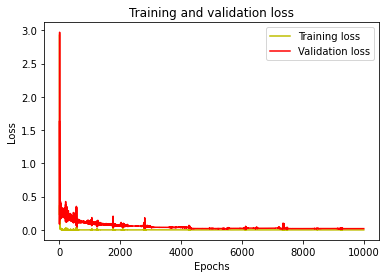

In [51]:
from matplotlib import pyplot as plt
#Plotting of the training and validation accuracy and loss at several epochs

loss= history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) +1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


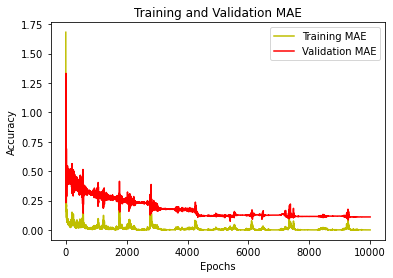

In [52]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [53]:
#predictions on the test data
predictions = model.predict(X_train_scaled[:41])
print("Real values are \t \n ")
print( y_train[:41], "\n Predicted values are: \n", predictions)

Real values are 	 
 
8     1.946
25    1.913
4     1.380
40    1.240
19    1.517
39    1.888
29    1.768
6     1.857
26    1.936
12    1.693
17    1.935
9     1.104
15    1.864
32    1.993
16    1.934
35    1.982
34    1.360
0     1.786
27    1.913
5     1.277
11    1.325
1     1.584
30    1.913
21    1.786
2     1.421
31    1.989
37    1.216
3     1.451
36    1.245
23    1.934
33    1.216
10    1.971
22    1.933
18    1.972
20    1.990
7     1.161
14    1.884
28    1.975
38    1.943
Name: CLASS, dtype: float64 
 Predicted values are: 
 [[1.9459615]
 [1.912997 ]
 [1.3799479]
 [1.2399817]
 [1.5169659]
 [1.8880048]
 [1.7679713]
 [1.856991 ]
 [1.9360123]
 [1.6929862]
 [1.9349623]
 [1.1038985]
 [1.8639894]
 [1.9929588]
 [1.9340007]
 [1.9819999]
 [1.3599446]
 [1.7859964]
 [1.9130242]
 [1.2769568]
 [1.3249733]
 [1.5839956]
 [1.9129856]
 [1.7859879]
 [1.4210148]
 [1.9890203]
 [1.2159858]
 [1.4509666]
 [1.2450101]
 [1.9339962]
 [1.2159934]
 [1.9709594]
 [1.9329948]
 [1.9719667]
 [1.9899642]
 [